# External modules

In [1]:
library(tidyverse)
library("DataExplorer")
library(DescTools)
library(Hmisc)
library("scatterplot3d")
library(plotly)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘Hmisc’


The following objects are masked from ‘package:DescTools’:

    %nin%, Label, Mean, Quantile


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are 

In [2]:
options(repr.plot.width=19, repr.plot.height=12)

# Data 

In [3]:
path <- ".."

In [4]:
source <- "./06_experimentation_2/final_dataset.csv"

In [5]:
data <- xfun::in_dir(dir = path, expr = read.csv(file = source, sep = ","))

In [6]:
str(data)

'data.frame':	21452 obs. of  59 variables:
 $ timestamp             : int  316278166 316311548 316378139 316411240 316444763 316477898 316511375 316544922 316612187 316644571 ...
 $ latitude              : num  48.8 48.8 48.8 48.8 48.8 ...
 $ longitude             : num  2.47 2.47 2.47 2.47 2.47 ...
 $ velocity_latitude     : num  -1.22e-11 -1.56e-11 -1.12e-11 -1.09e-11 -1.39e-11 ...
 $ velocity_longitude    : num  6.17e-11 8.17e-11 6.14e-11 6.17e-11 8.12e-11 ...
 $ velocity              : num  6.29e-11 8.32e-11 6.24e-11 6.27e-11 8.24e-11 ...
 $ lateral_error         : num  -0.169 -0.139 -0.17 -0.178 -0.176 ...
 $ longitudinal_error    : num  -0.446 -0.452 -0.443 -0.438 -0.439 ...
 $ haversine_error       : num  0.476 0.473 0.474 0.472 0.472 ...
 $ latitude_error        : num  -3.56e-06 -3.59e-06 -3.58e-06 -3.42e-06 -3.55e-06 ...
 $ longitude_error       : num  -3.20e-06 -3.47e-06 -3.10e-06 -3.83e-06 -3.10e-06 ...
 $ heading_error         : num  0.304 0.235 0.273 0.14 0.305 ...
 $ late

# Summary

In [7]:
introduce(data)

rows,columns,discrete_columns,continuous_columns,all_missing_columns,total_missing_values,complete_rows,total_observations,memory_usage
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
21452,59,0,59,0,0,21452,1265668,6620752


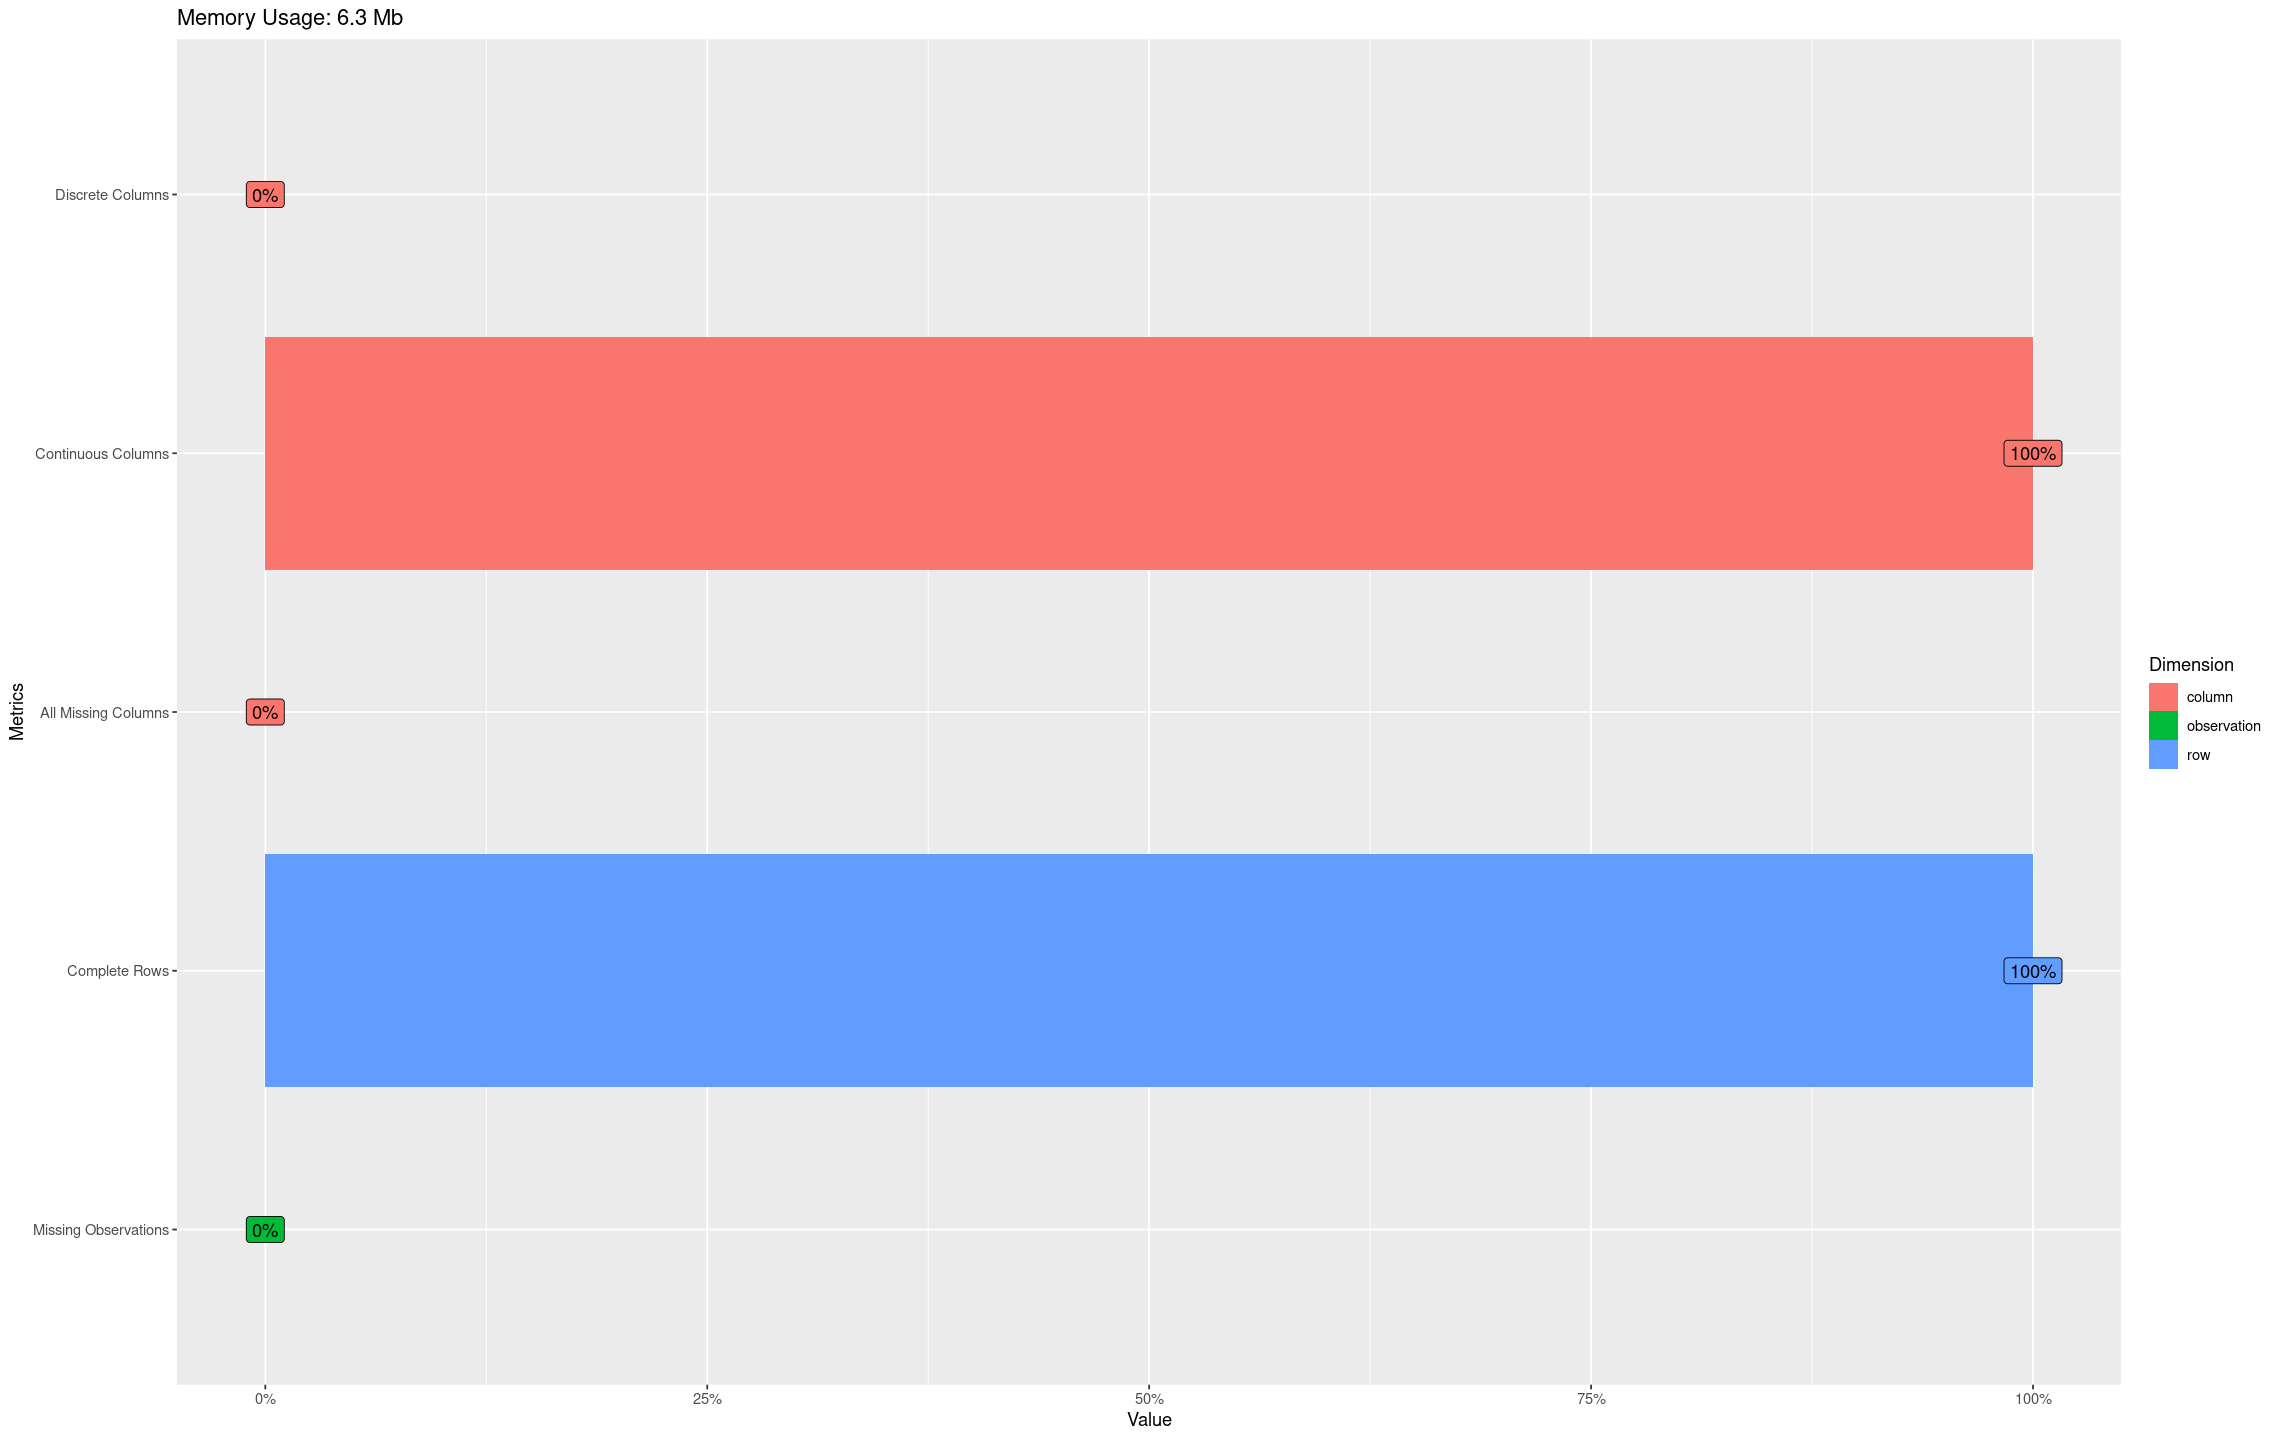

In [8]:
plot_intro(data)

In [9]:
describe(data)

Warning message in min(diff(uxinside)):
“no non-missing arguments to min; returning Inf”
Warning message in spikecomp(x, method = "grid", lumptails = lumptails, normalize = FALSE, :
“possible logic error 1 in spikecomp”
Warning message in spikecomp(x, method = "grid", lumptails = lumptails, normalize = FALSE, :
“program logic error 2 in spikecomp”
Warning message in xrange[freq != 0] <- xrnz:
“number of items to replace is not a multiple of replacement length”
Warning message in spikecomp(x, method = "grid", lumptails = lumptails, normalize = FALSE, :
“program logic error in spikecomp; lengths: 2 1”
Warning message in min(diff(uxinside)):
“no non-missing arguments to min; returning Inf”
Warning message in spikecomp(x, method = "grid", lumptails = lumptails, normalize = FALSE, :
“possible logic error 1 in spikecomp”
Warning message in spikecomp(x, method = "grid", lumptails = lumptails, normalize = FALSE, :
“program logic error 2 in spikecomp”
Warning message in xrange[freq != 0] <- xrn

data 

 59  Variables      21452  Observations
--------------------------------------------------------------------------------
timestamp 
        n   missing  distinct      Info      Mean       Gmd       .05       .10 
    21452         0     21452         1 736590117 279553851 3.604e+08 4.021e+08 
      .25       .50       .75       .90       .95 
5.274e+08 7.366e+08 9.435e+08 1.072e+09 1.119e+09 

lowest :  316278166  316311548  316378139  316411240  316444763
highest: 1164931803 1164965864 1164998647 1165032564 1165065843
--------------------------------------------------------------------------------
latitude 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   21452        0    19064        1    48.77 0.004353    48.77    48.77 
     .25      .50      .75      .90      .95 
   48.77    48.77    48.78    48.78    48.78 

lowest : 48.7666 48.7666 48.7666 48.7666 48.7666
highest: 48.778  48.778  48.778  48.778  48.778 
----------------------------------------

# Histogram

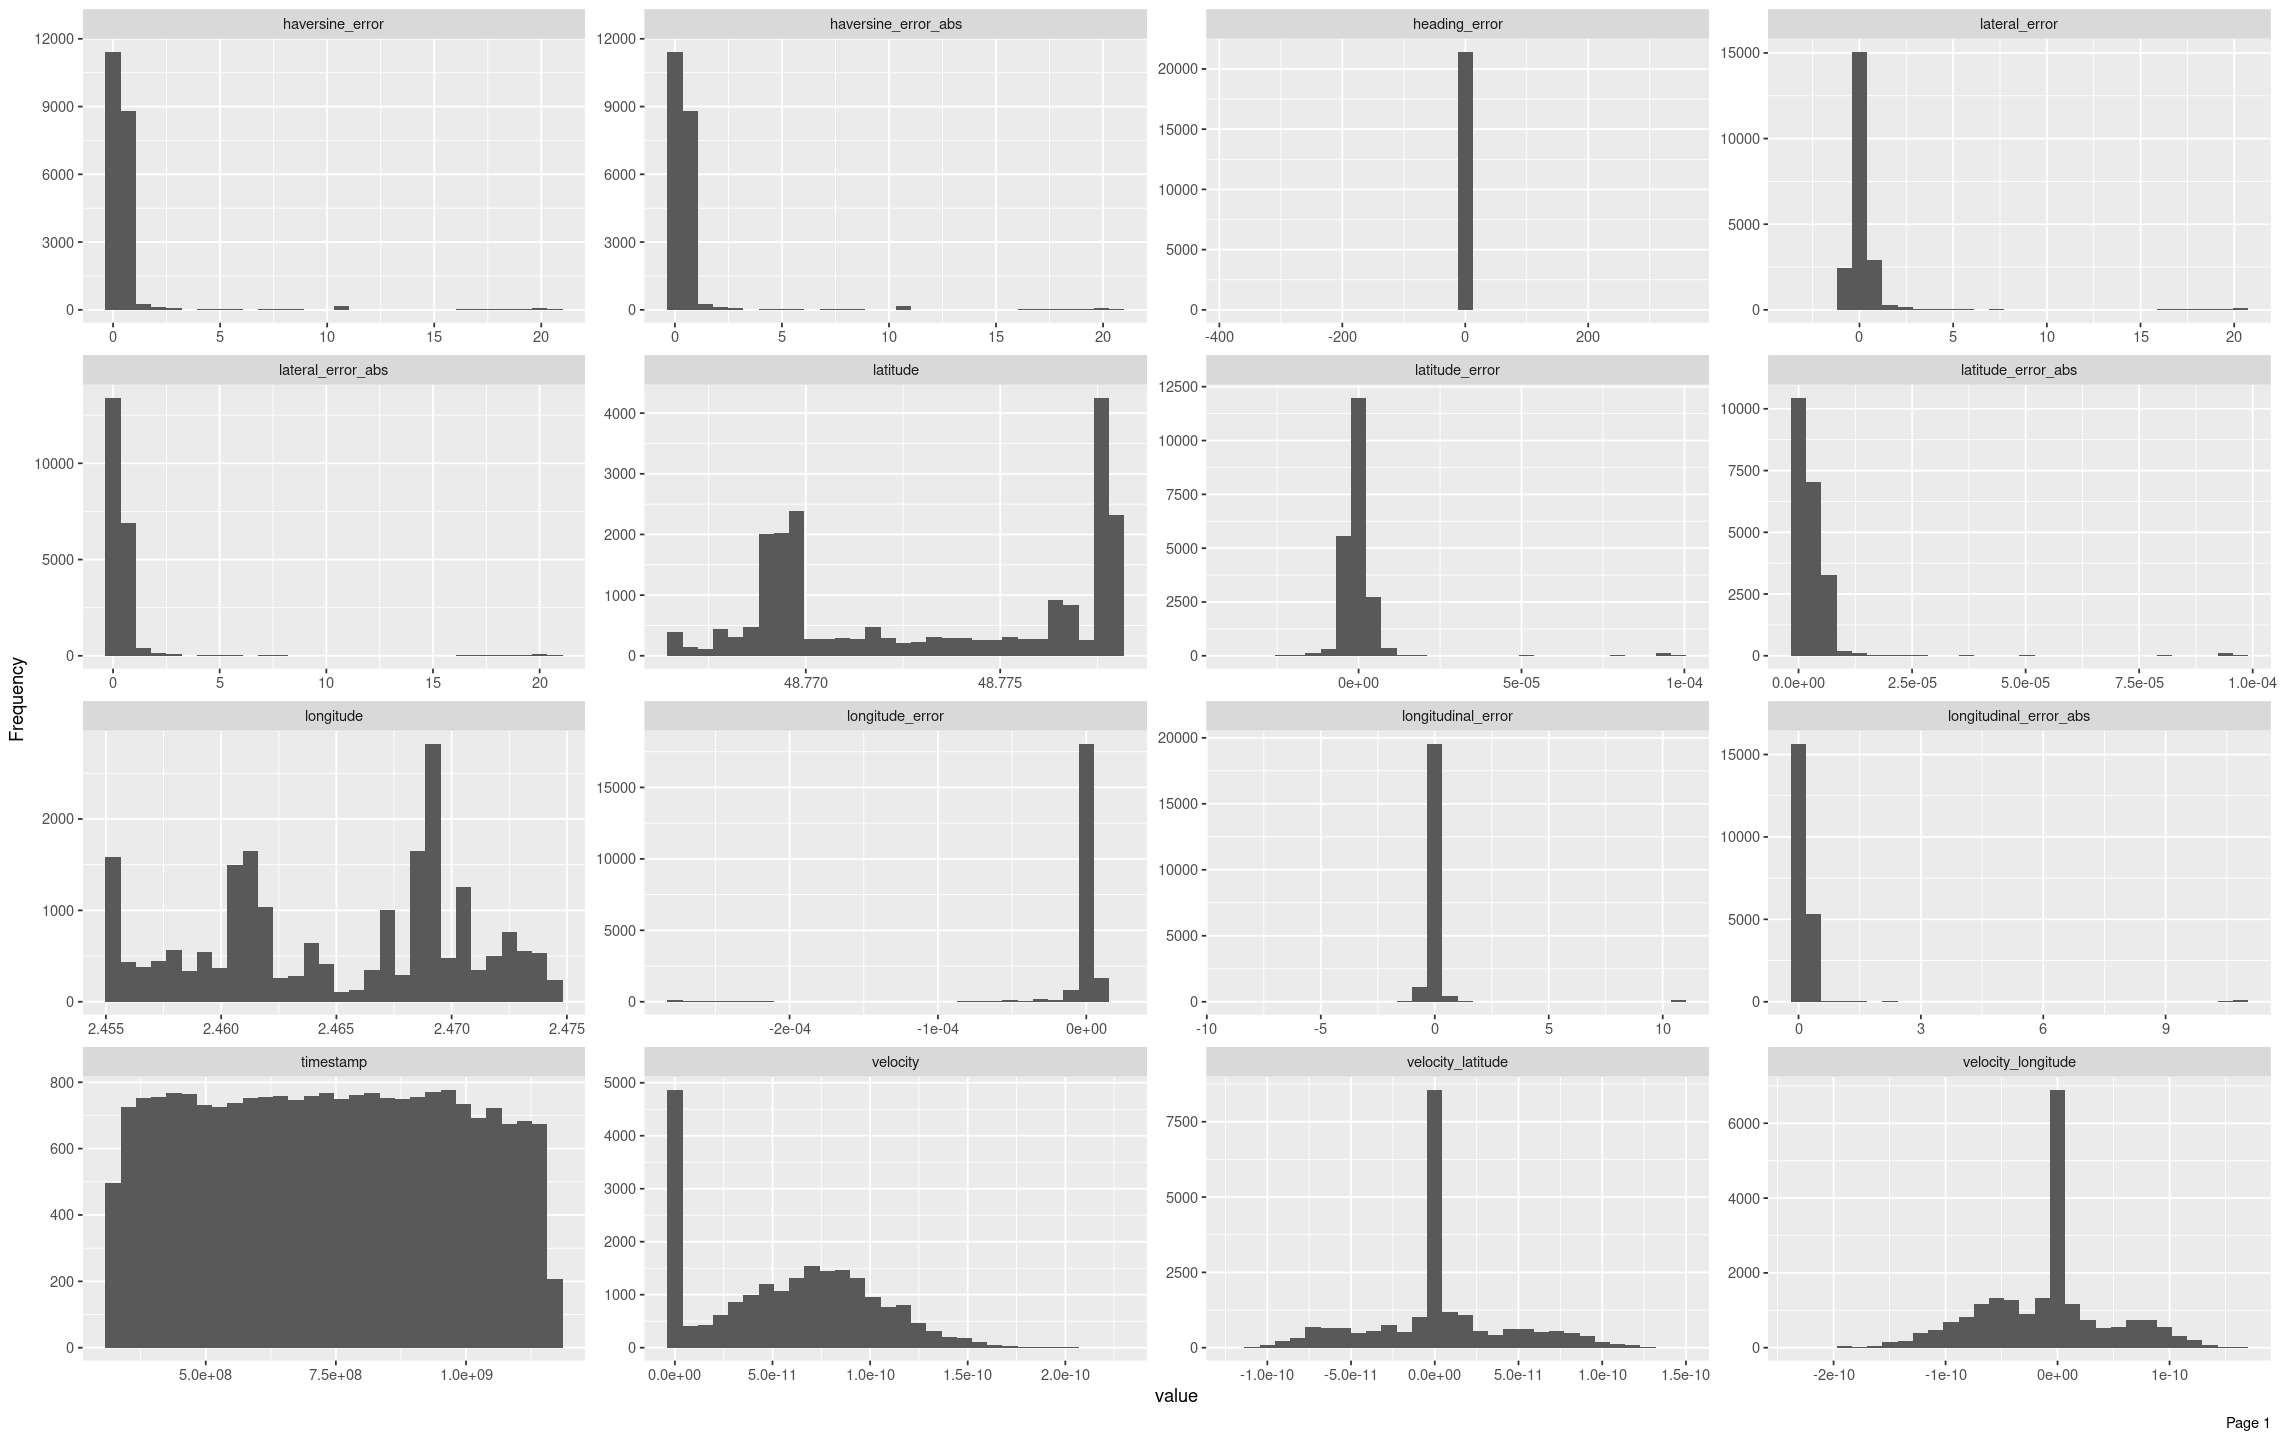

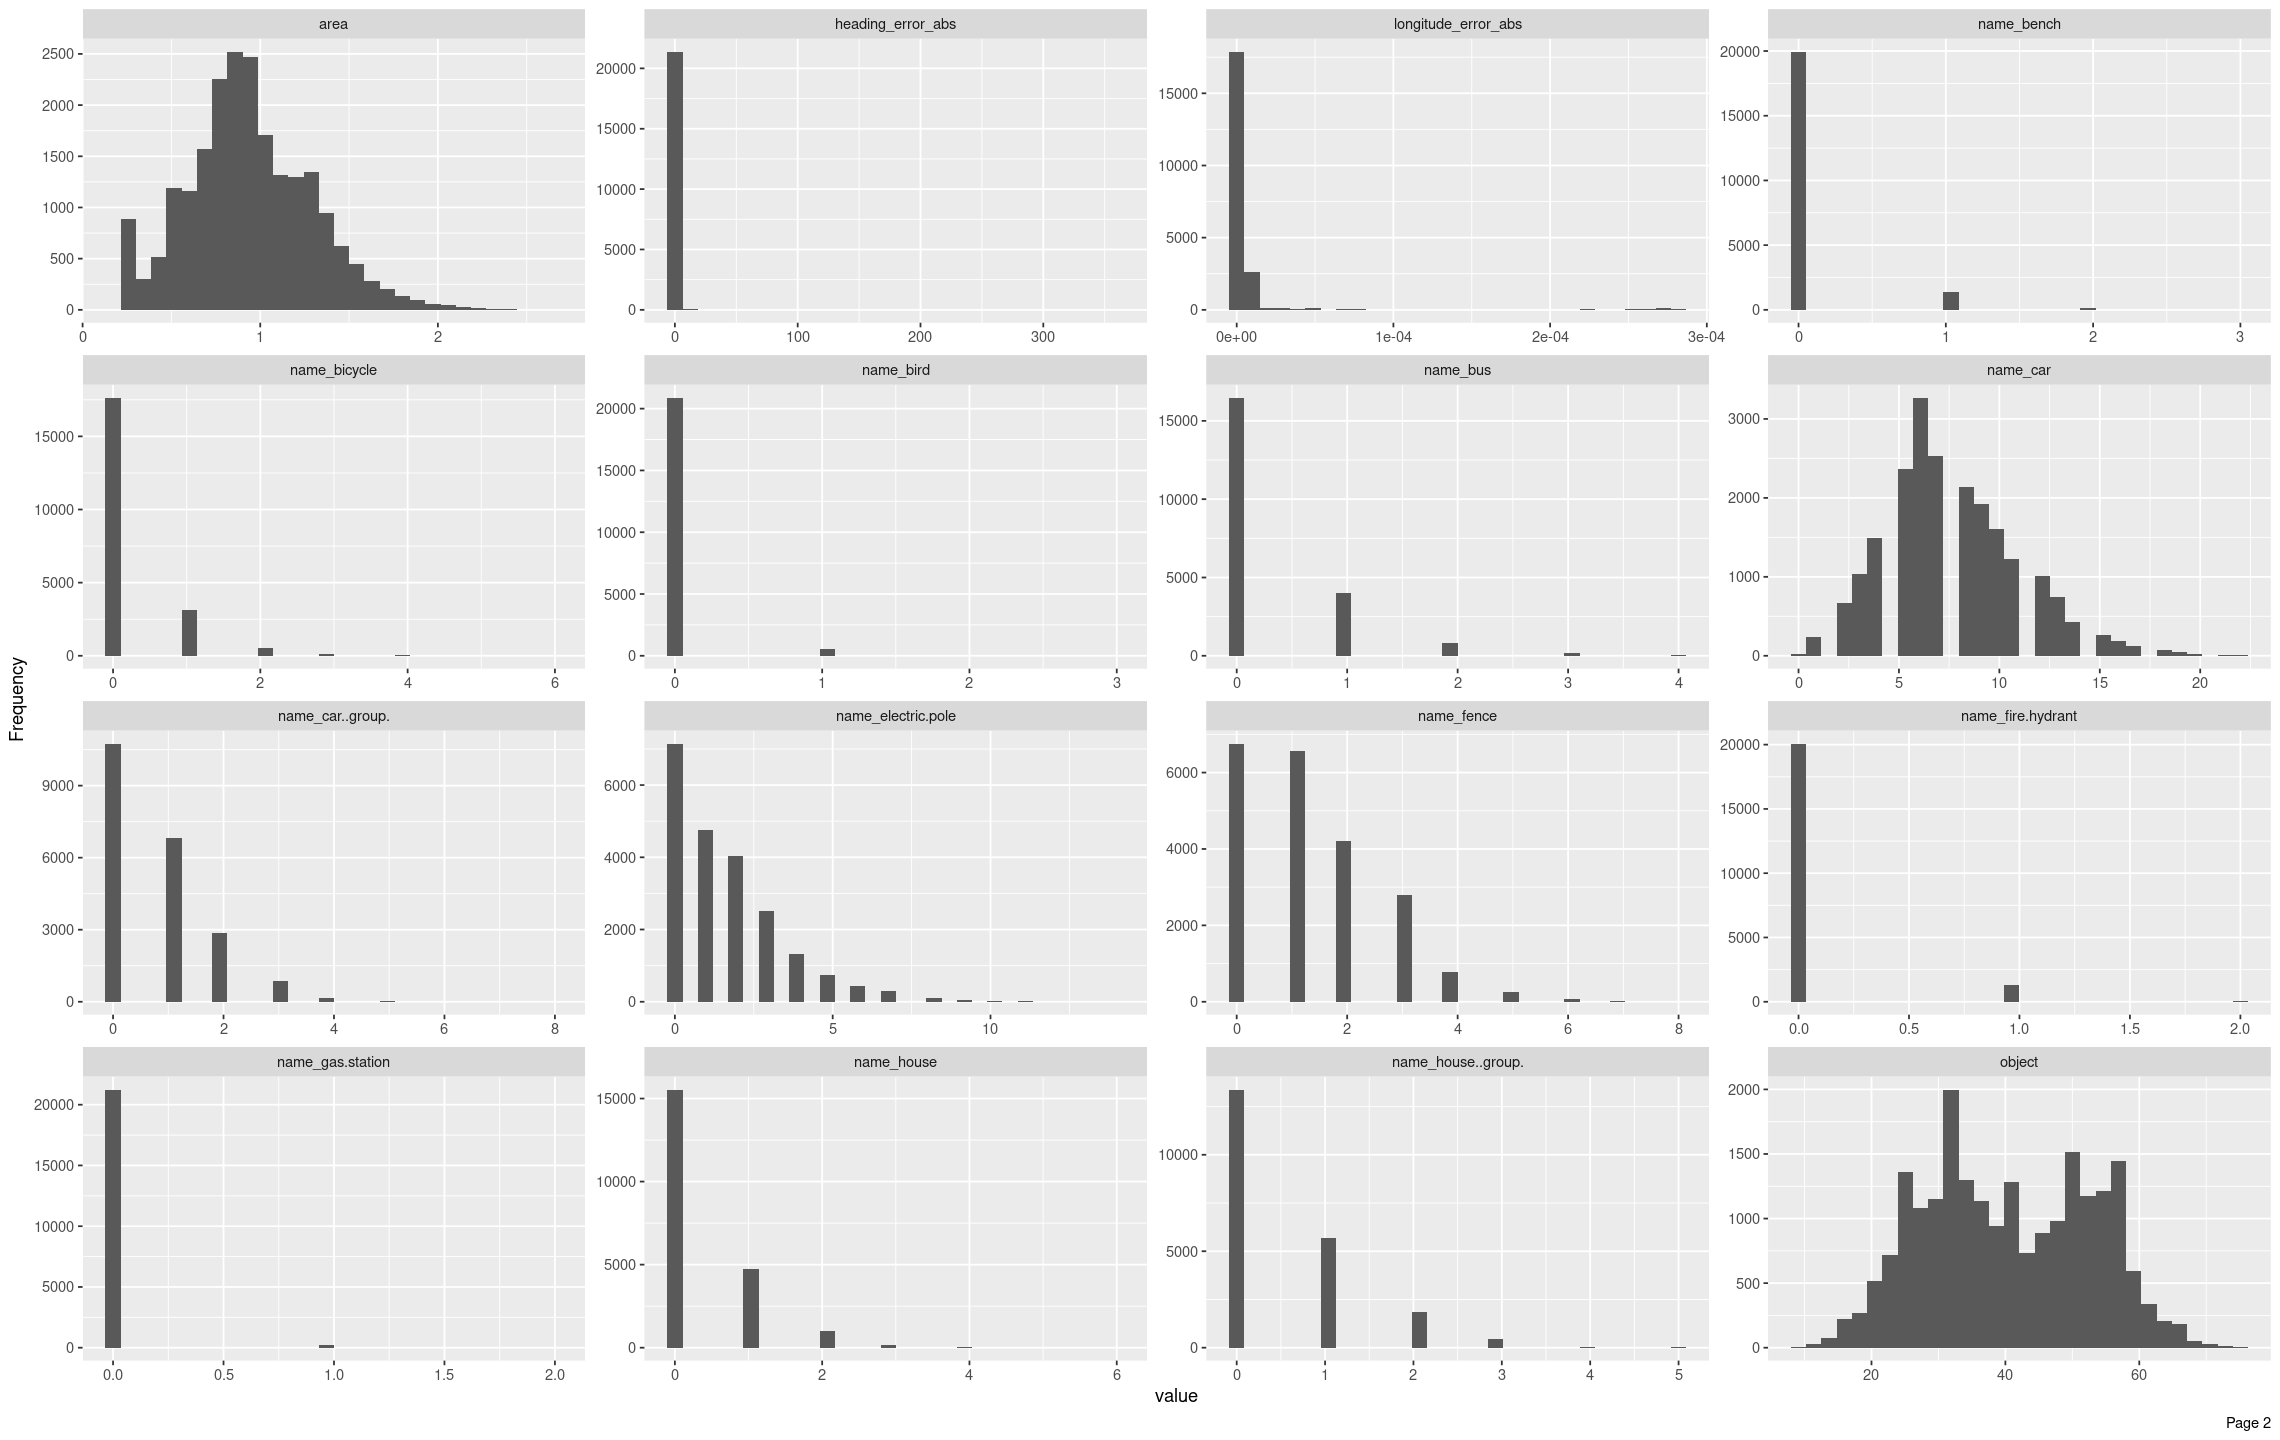

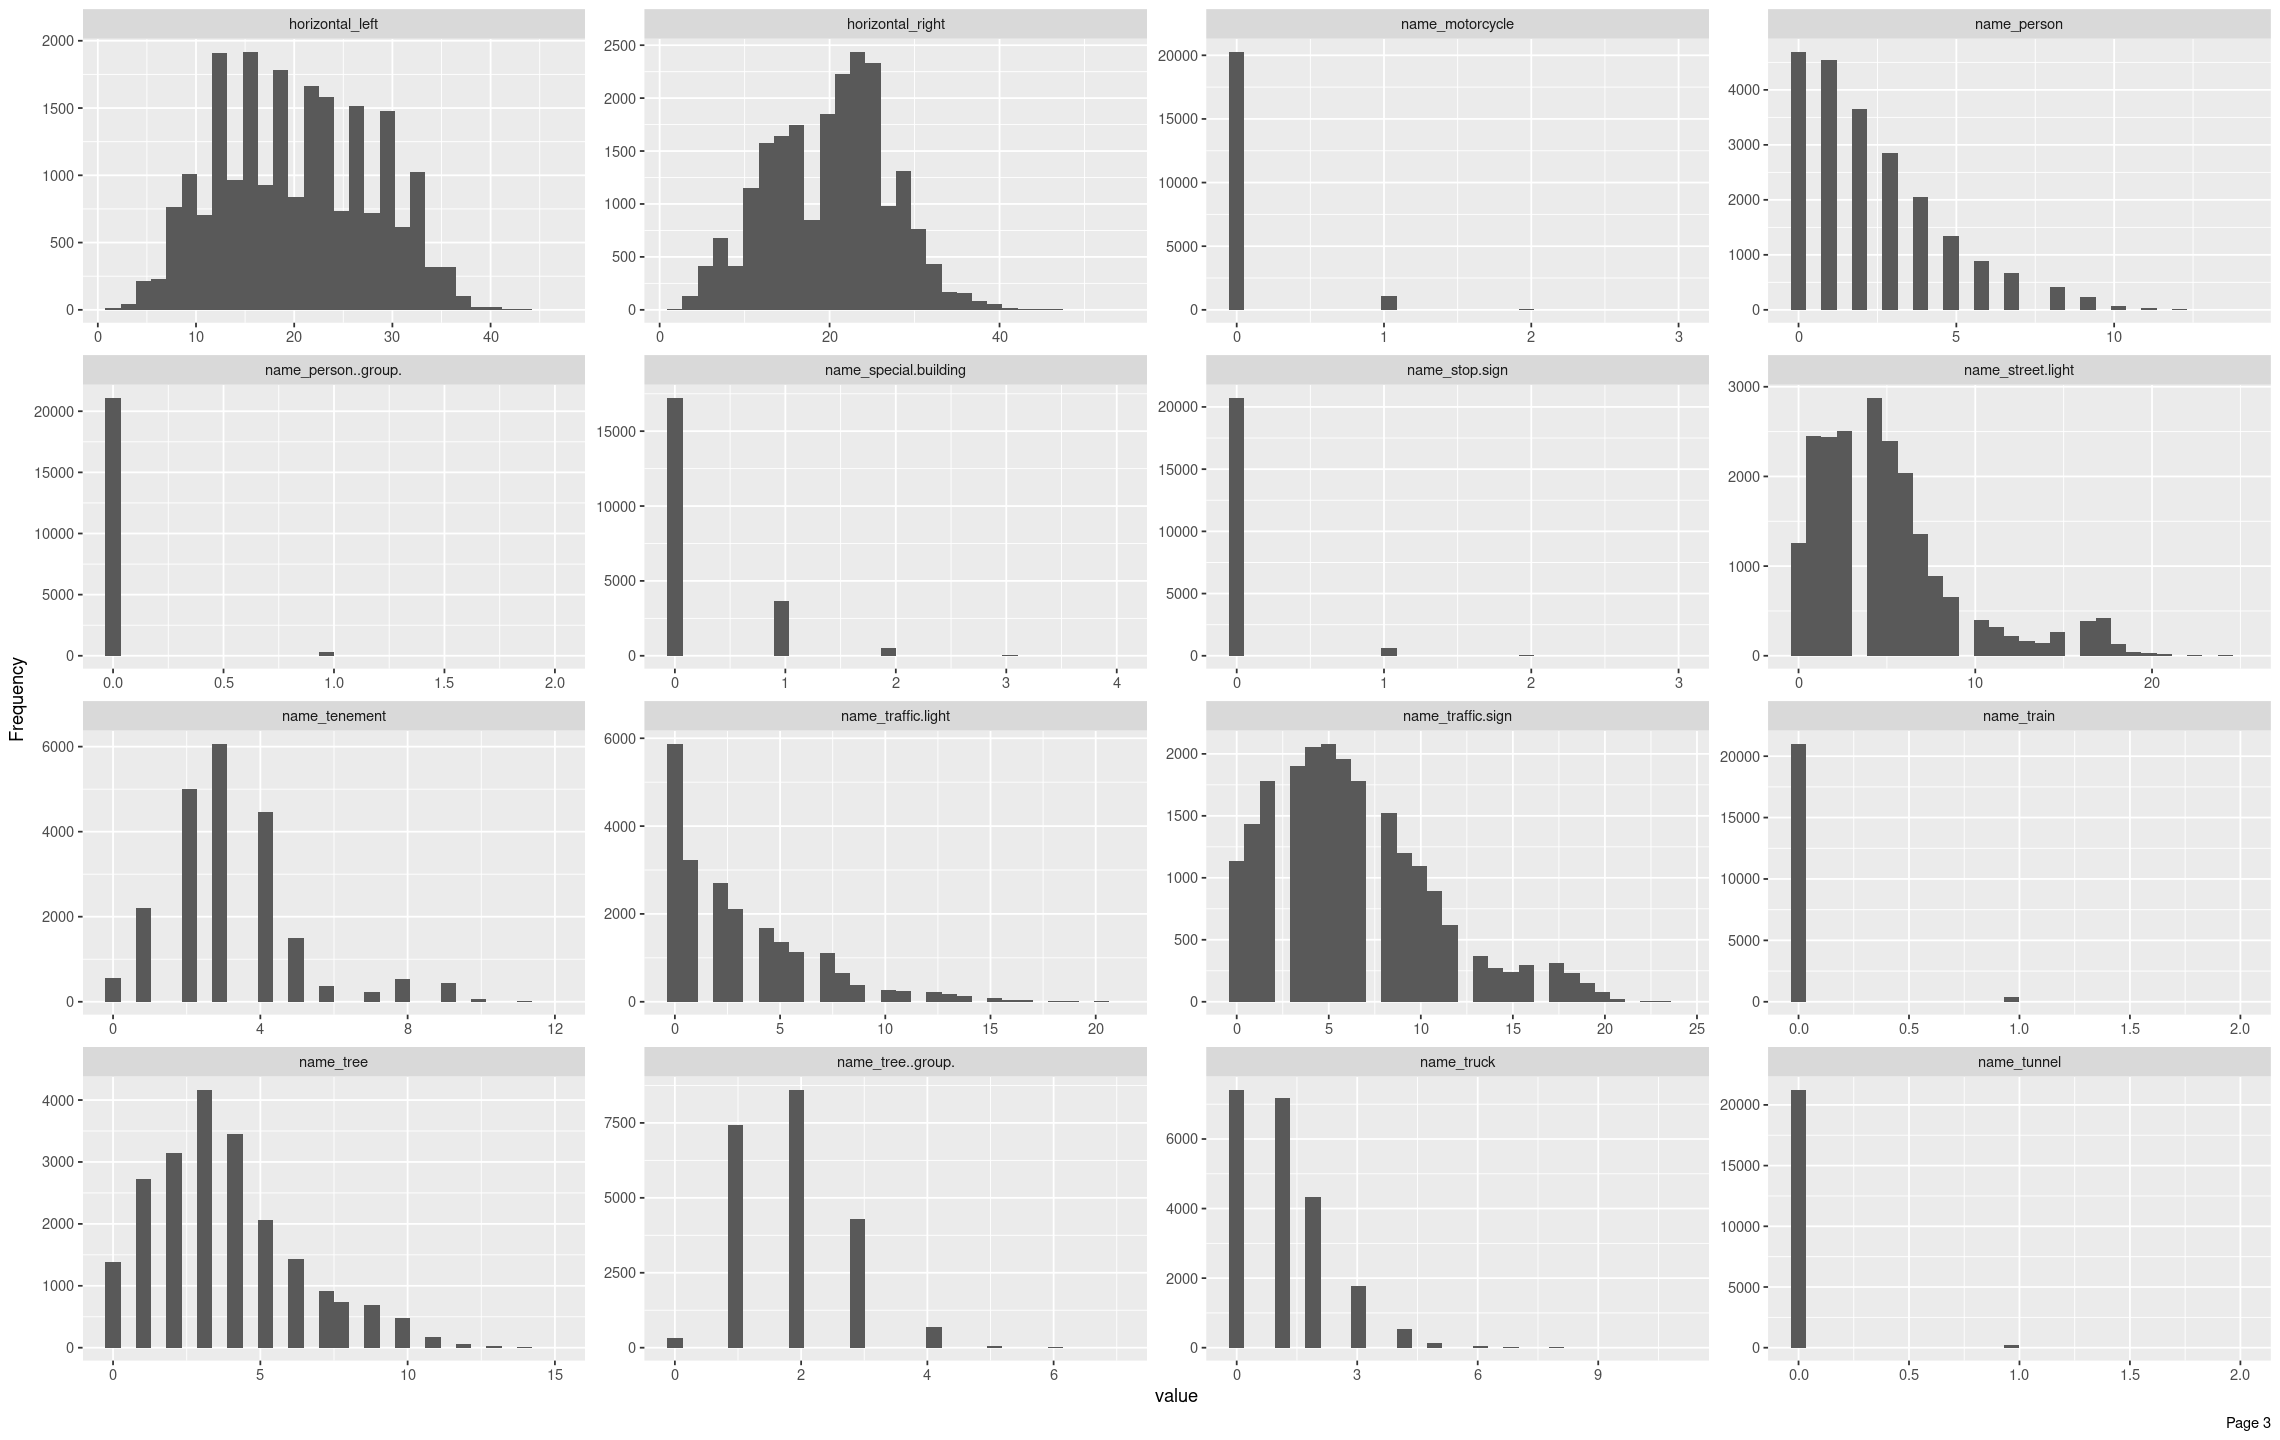

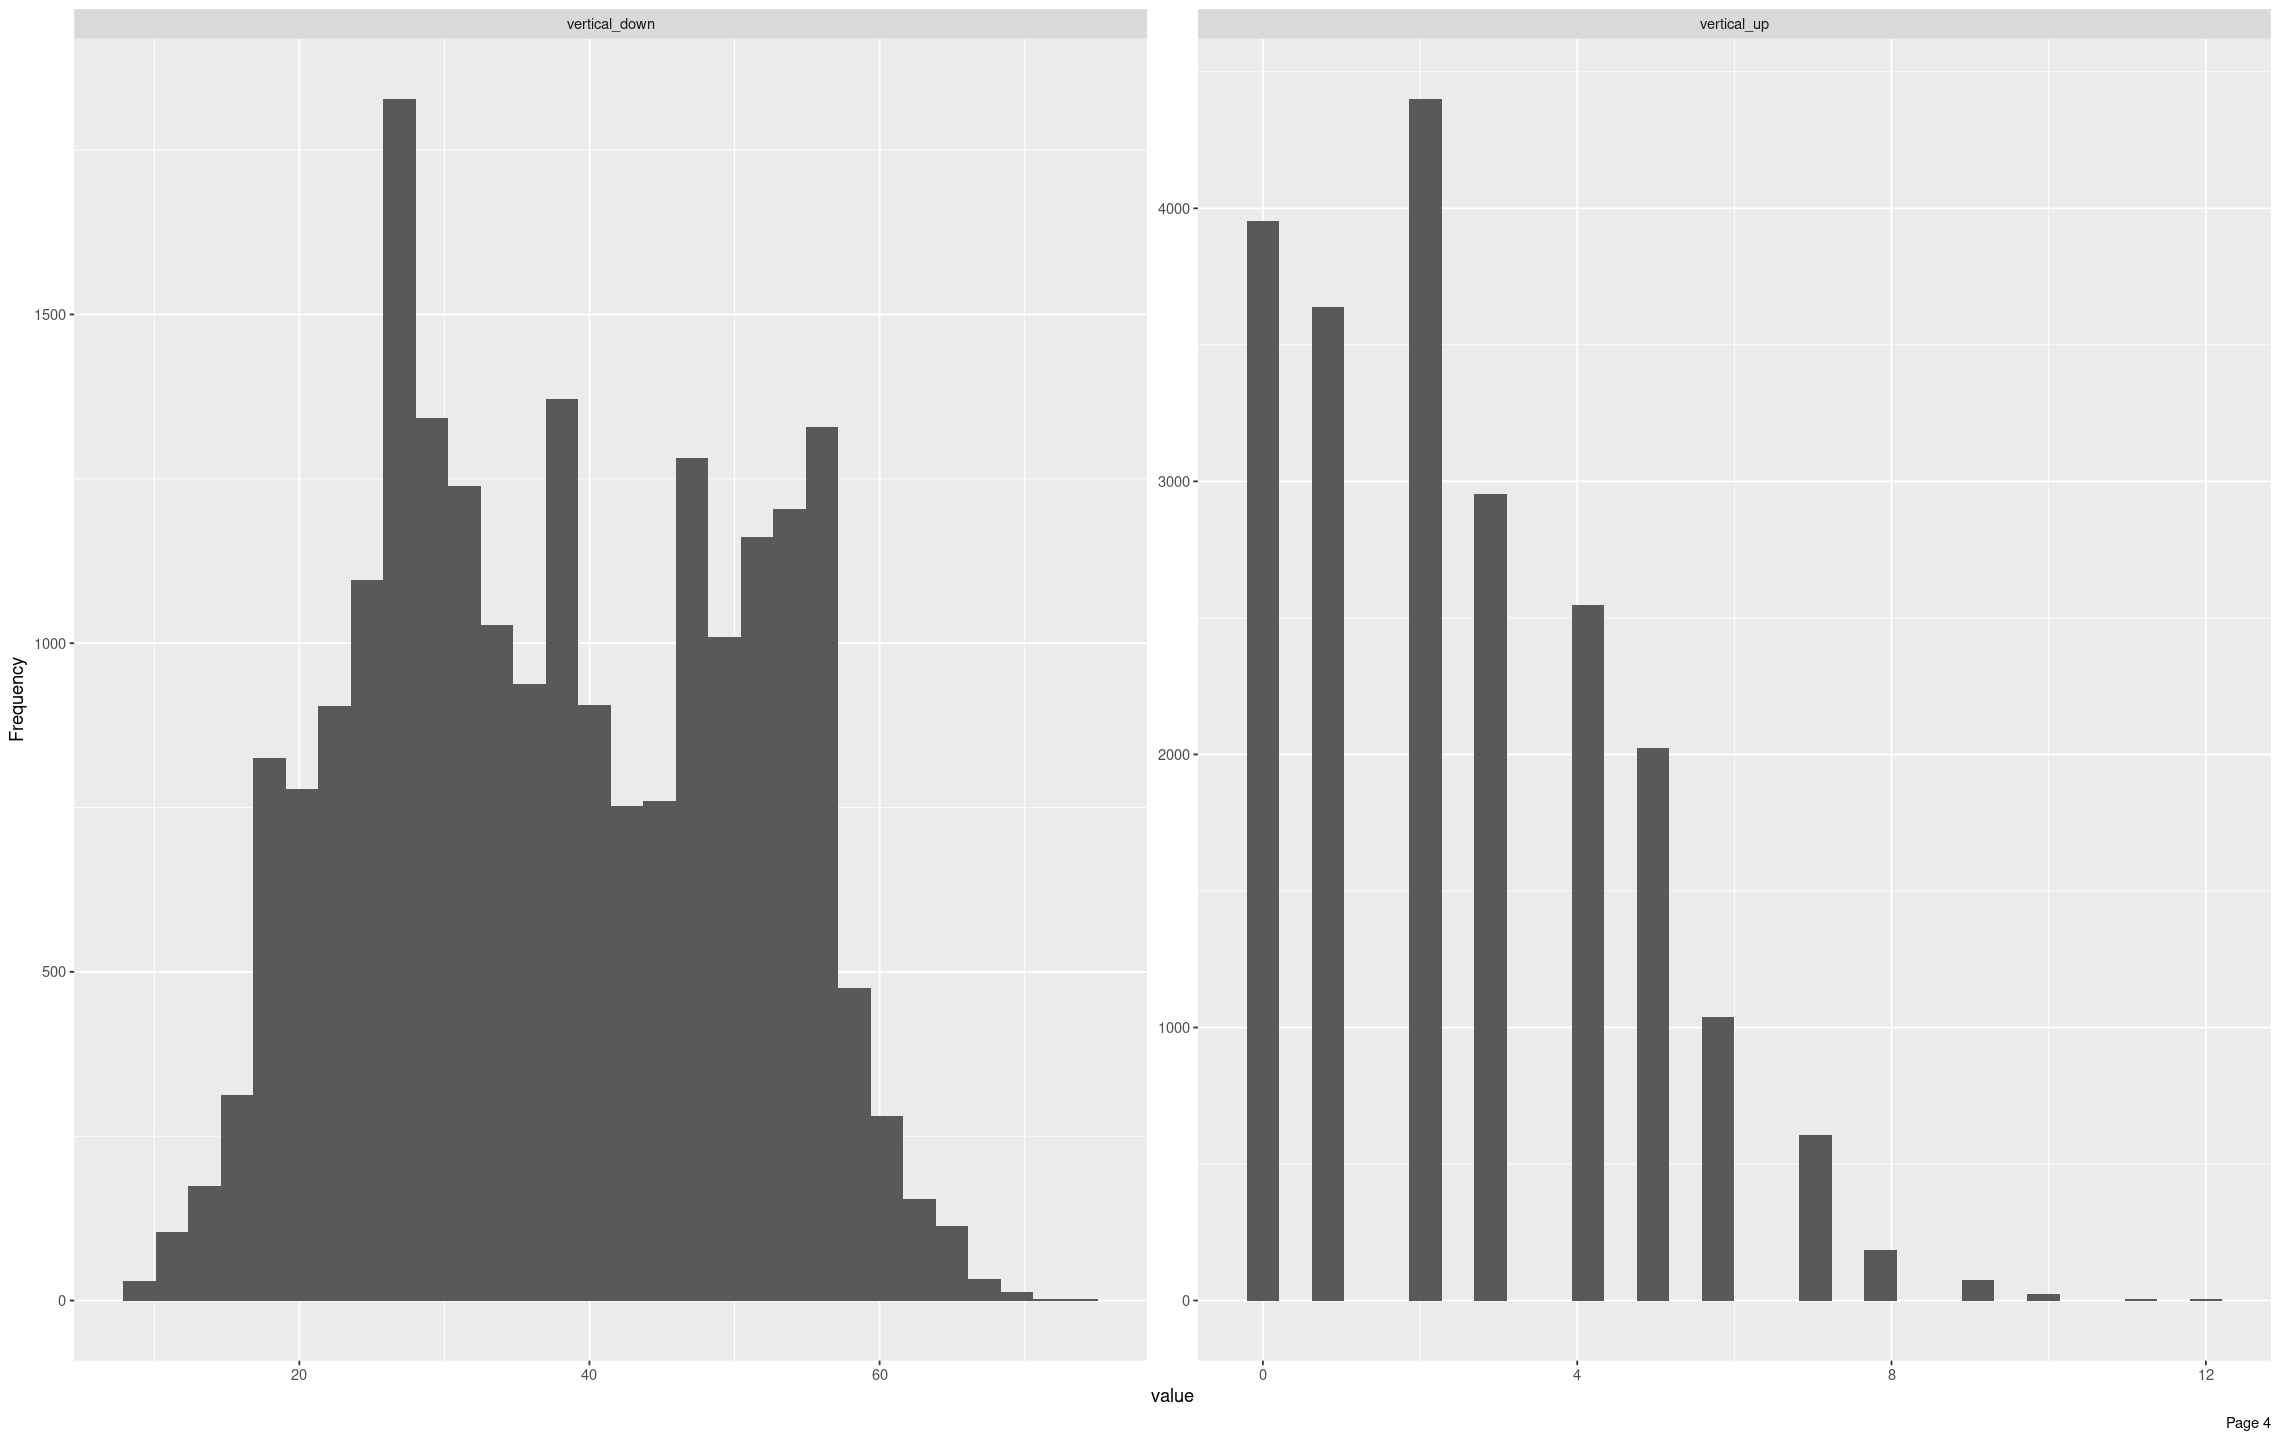

In [10]:
plot_histogram(data)

# Correlation

Warning message in cor(x = structure(list(timestamp = c(316278166L, 316311548L, :
“the standard deviation is zero”


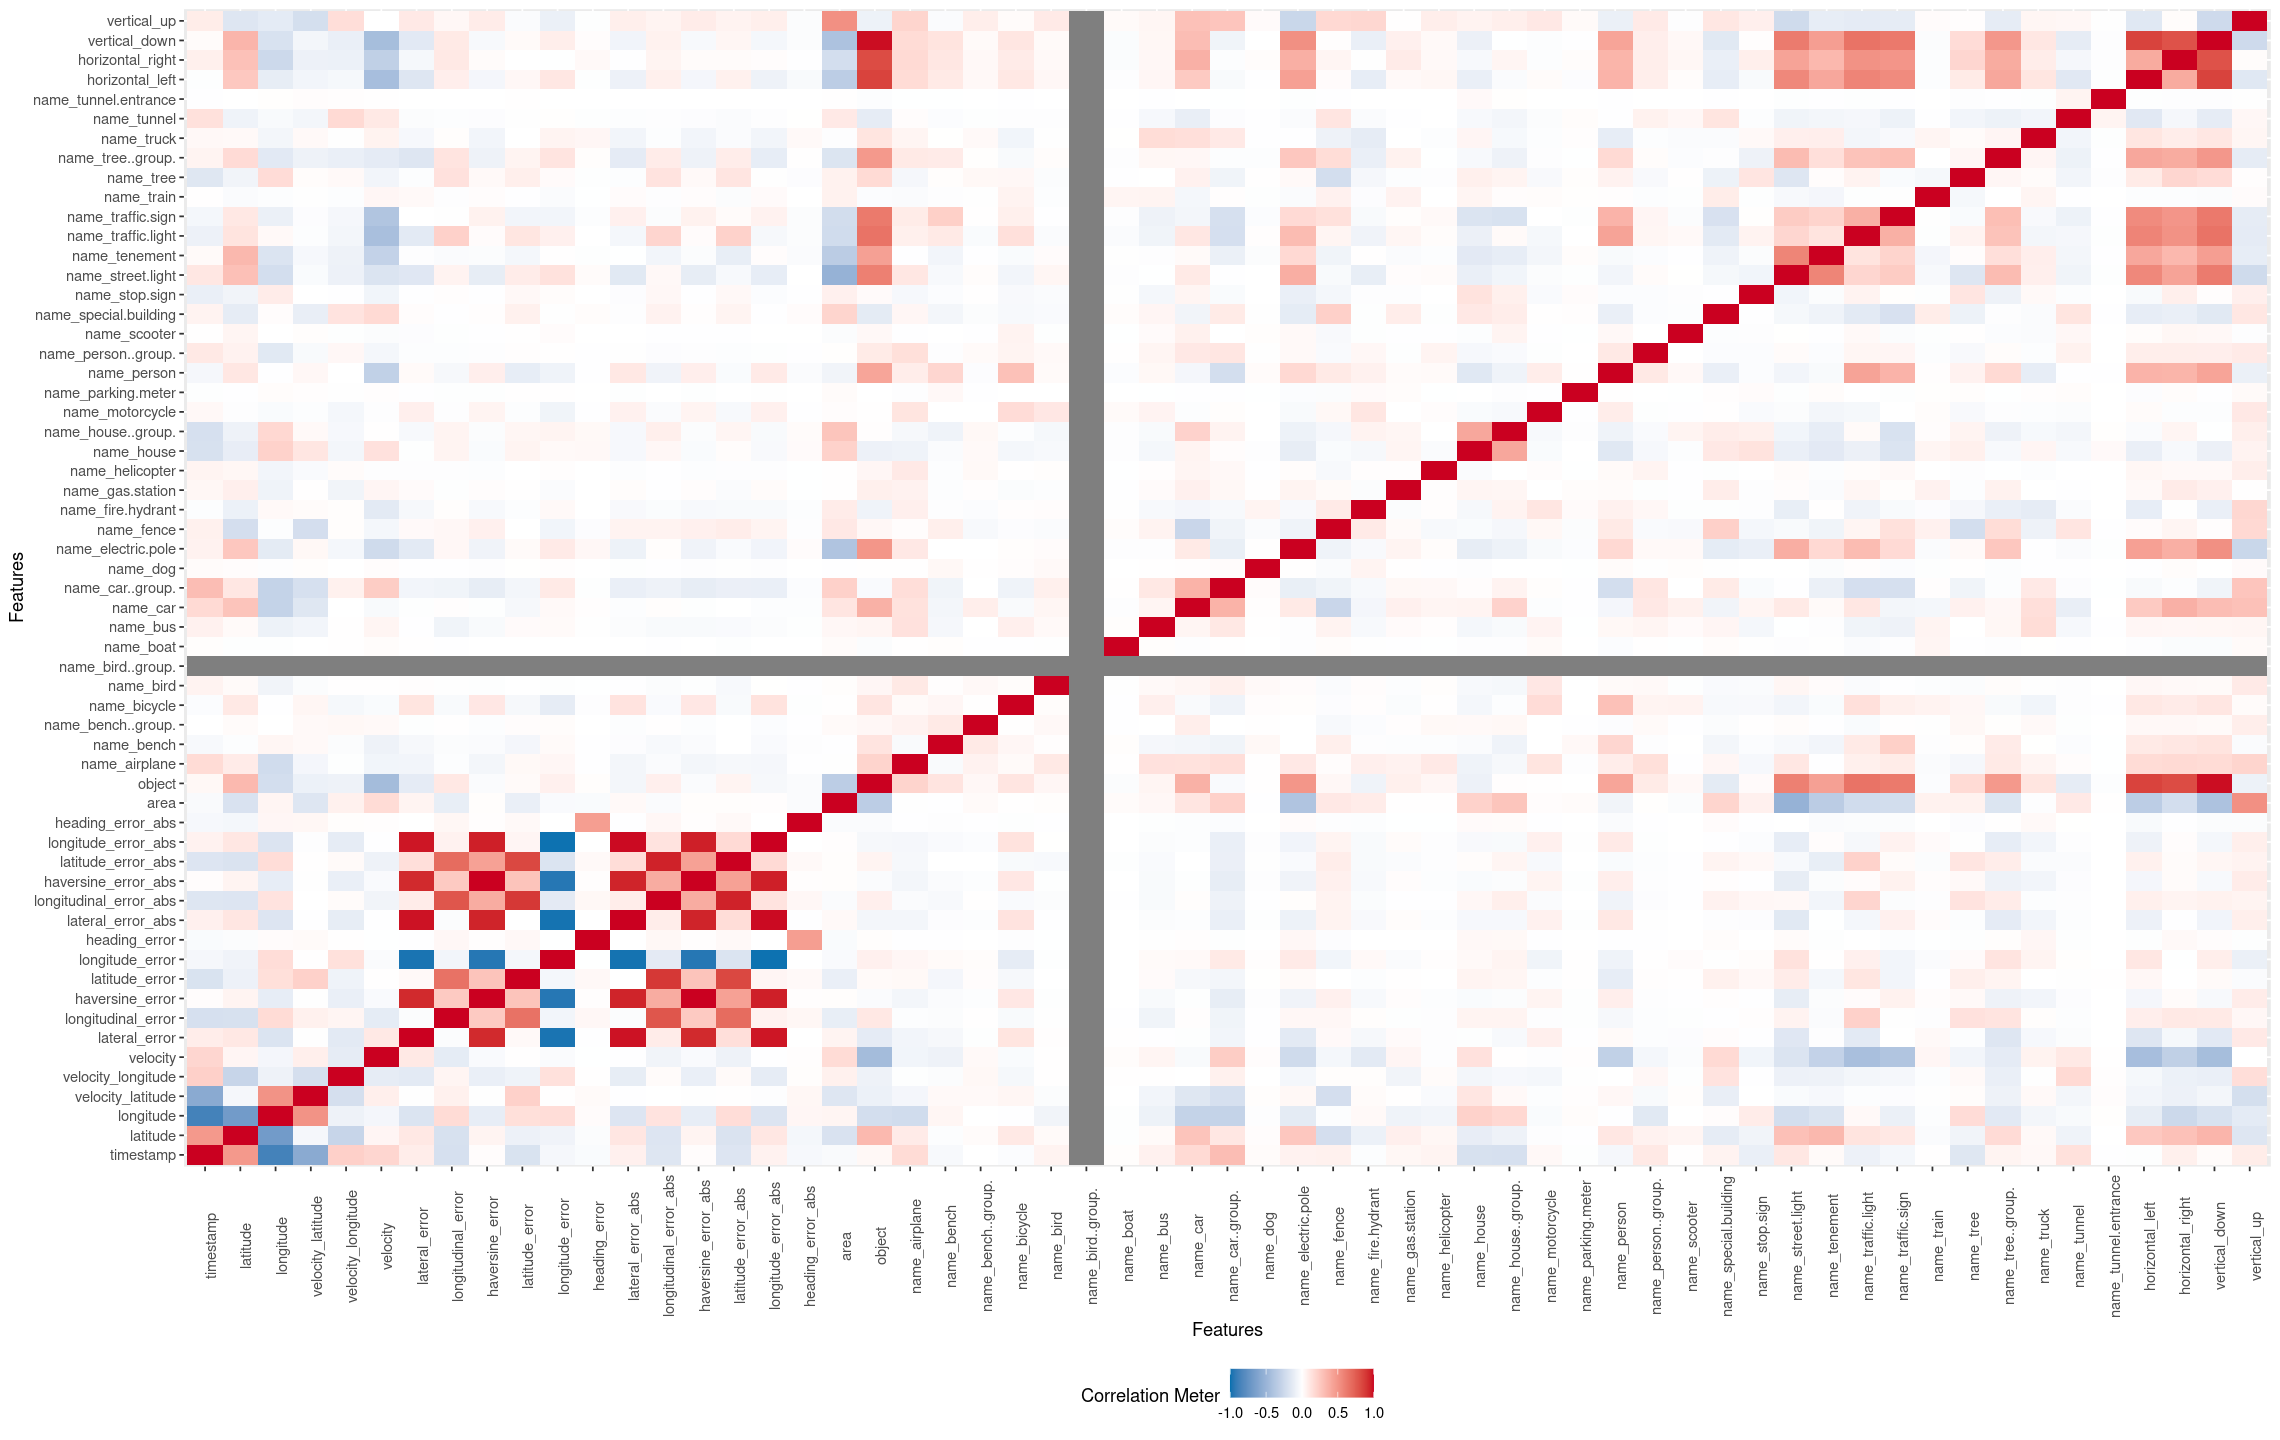

In [11]:
plot_correlation(data, cor_args = list("use" = "pairwise.complete.obs"), type="c")

# Box plot

## lateral_error

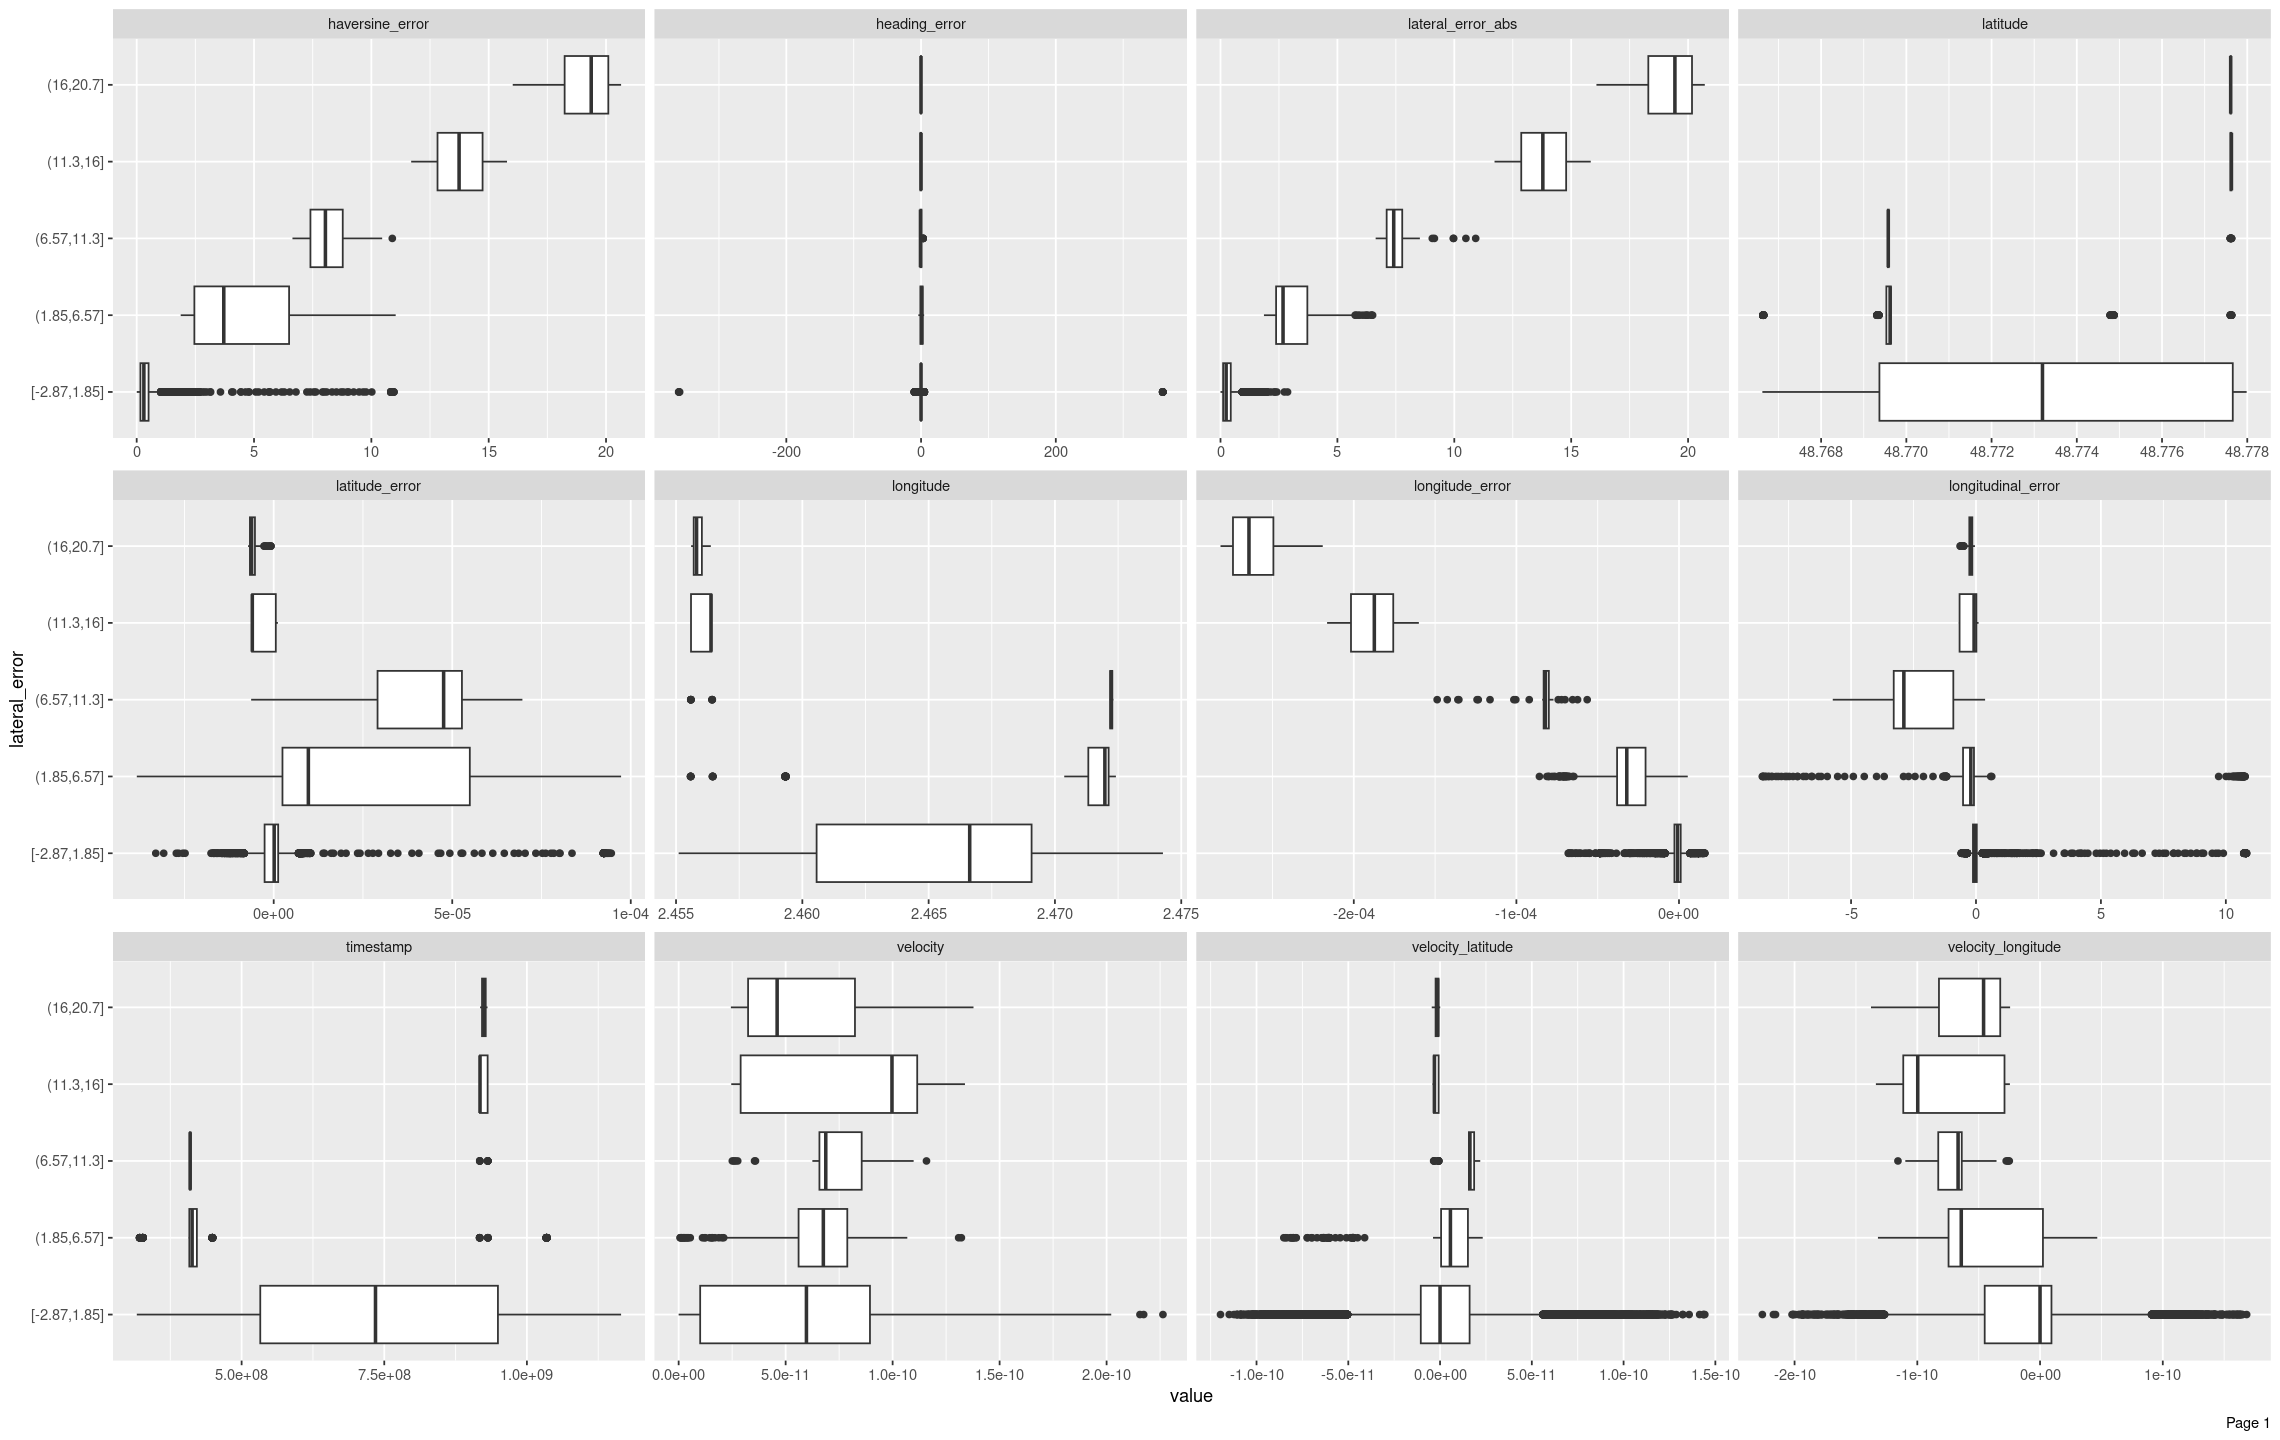

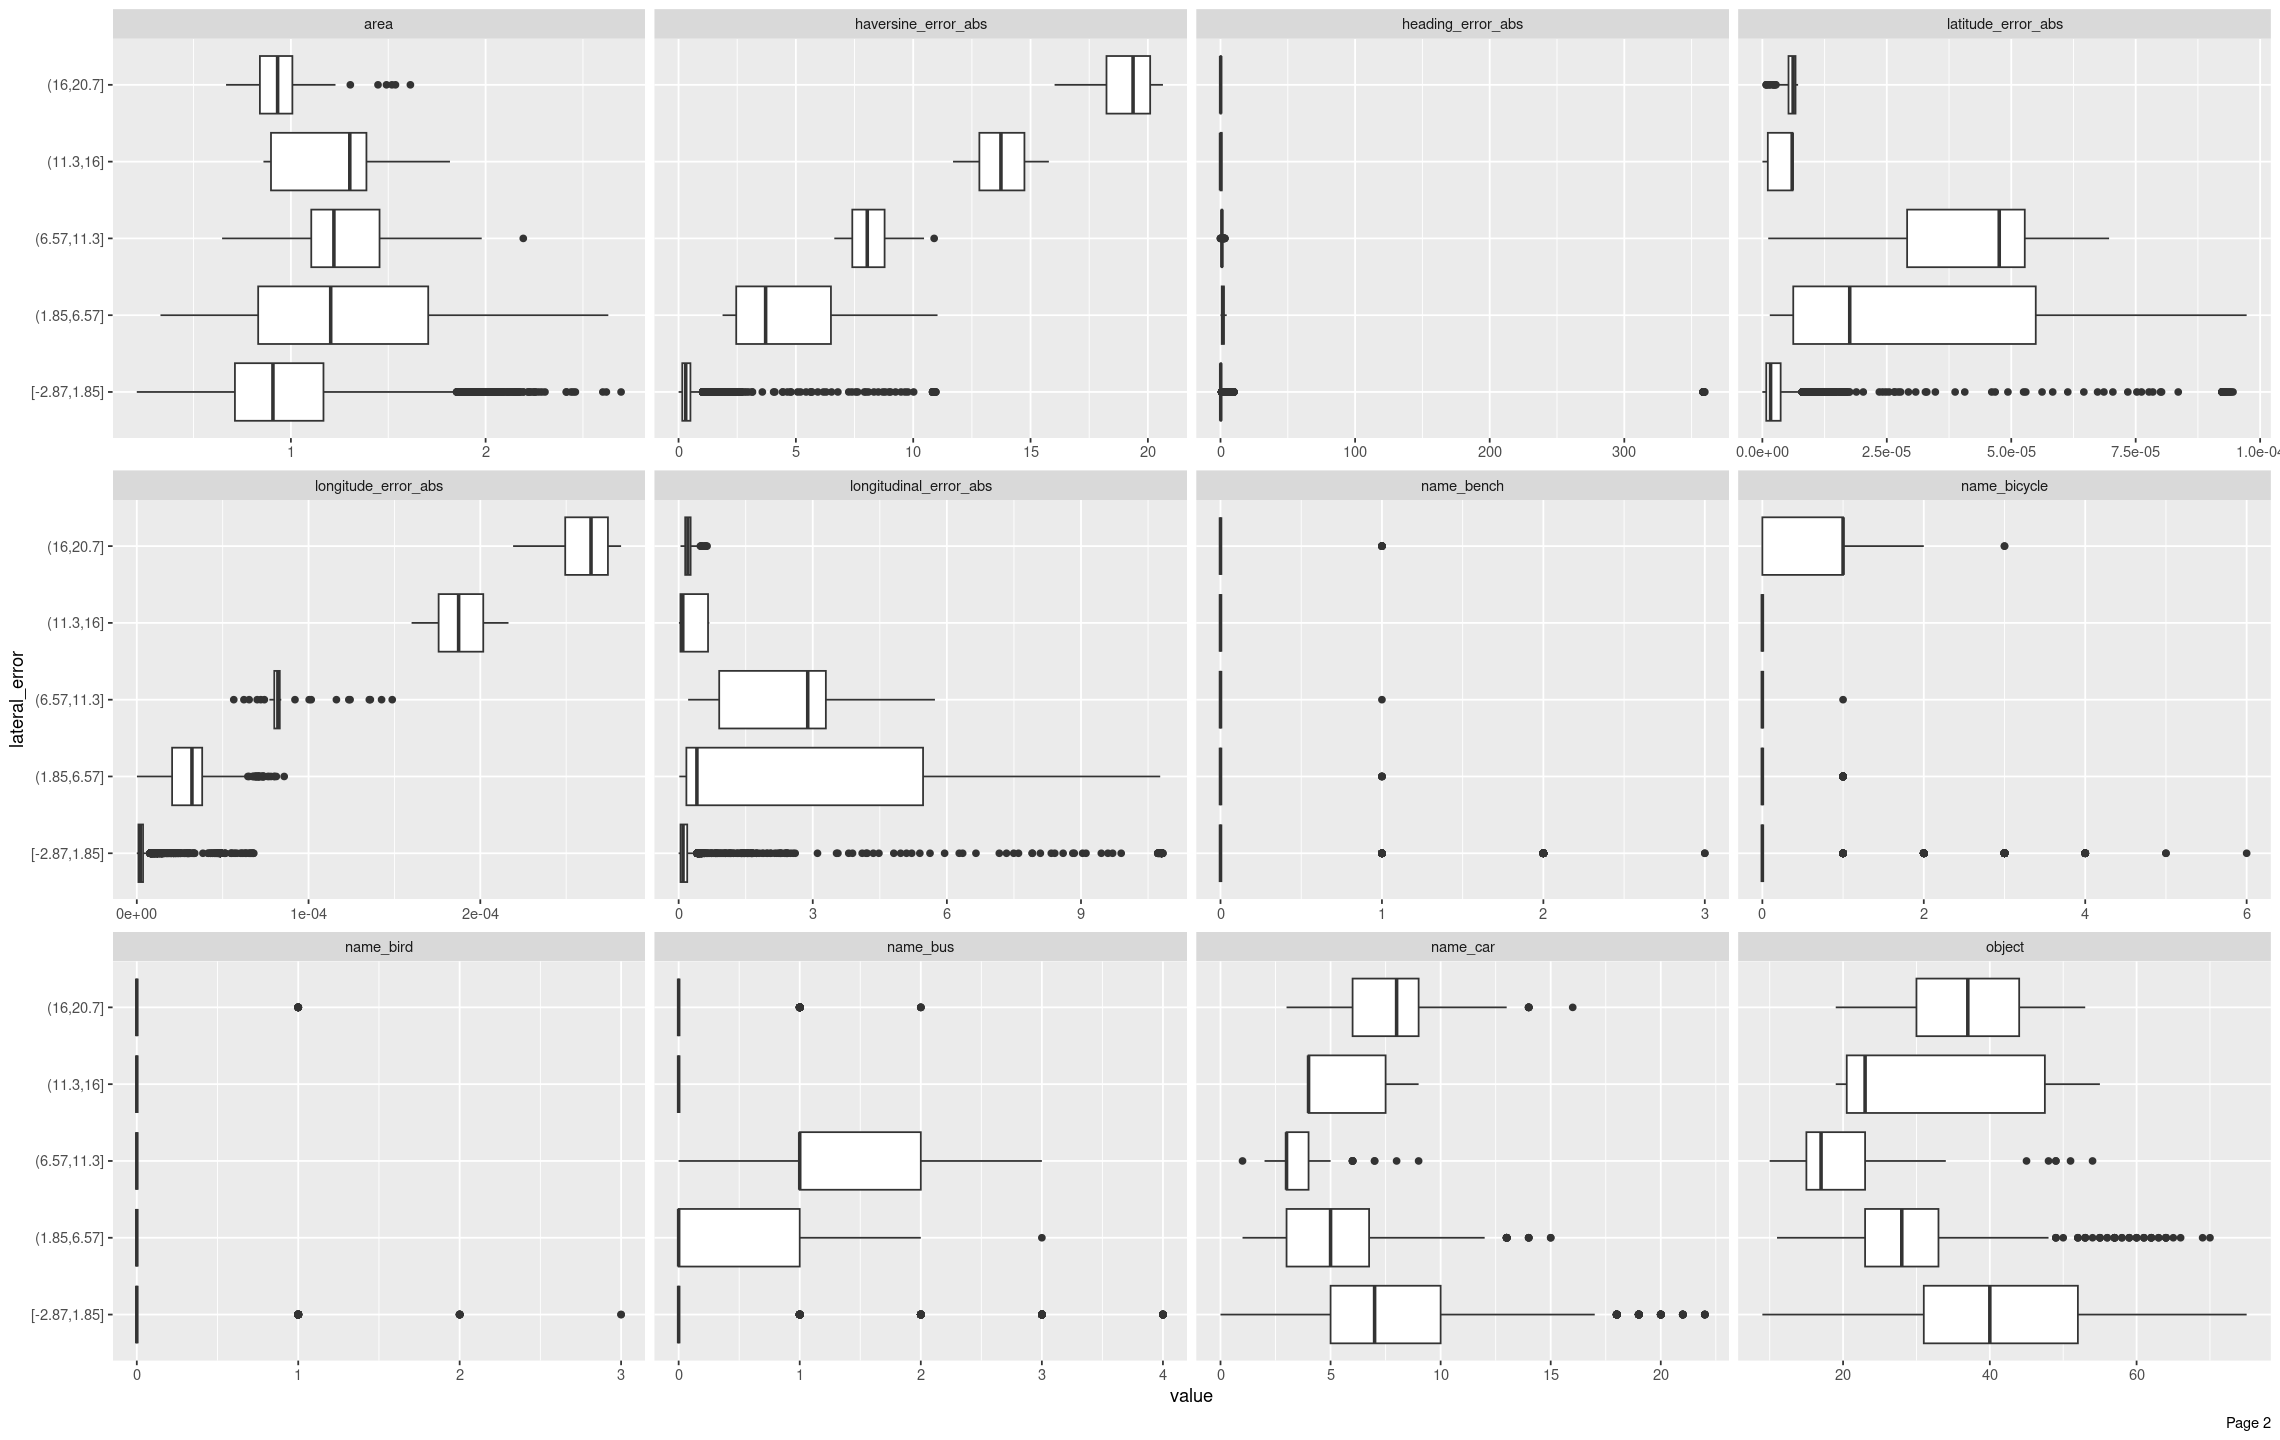

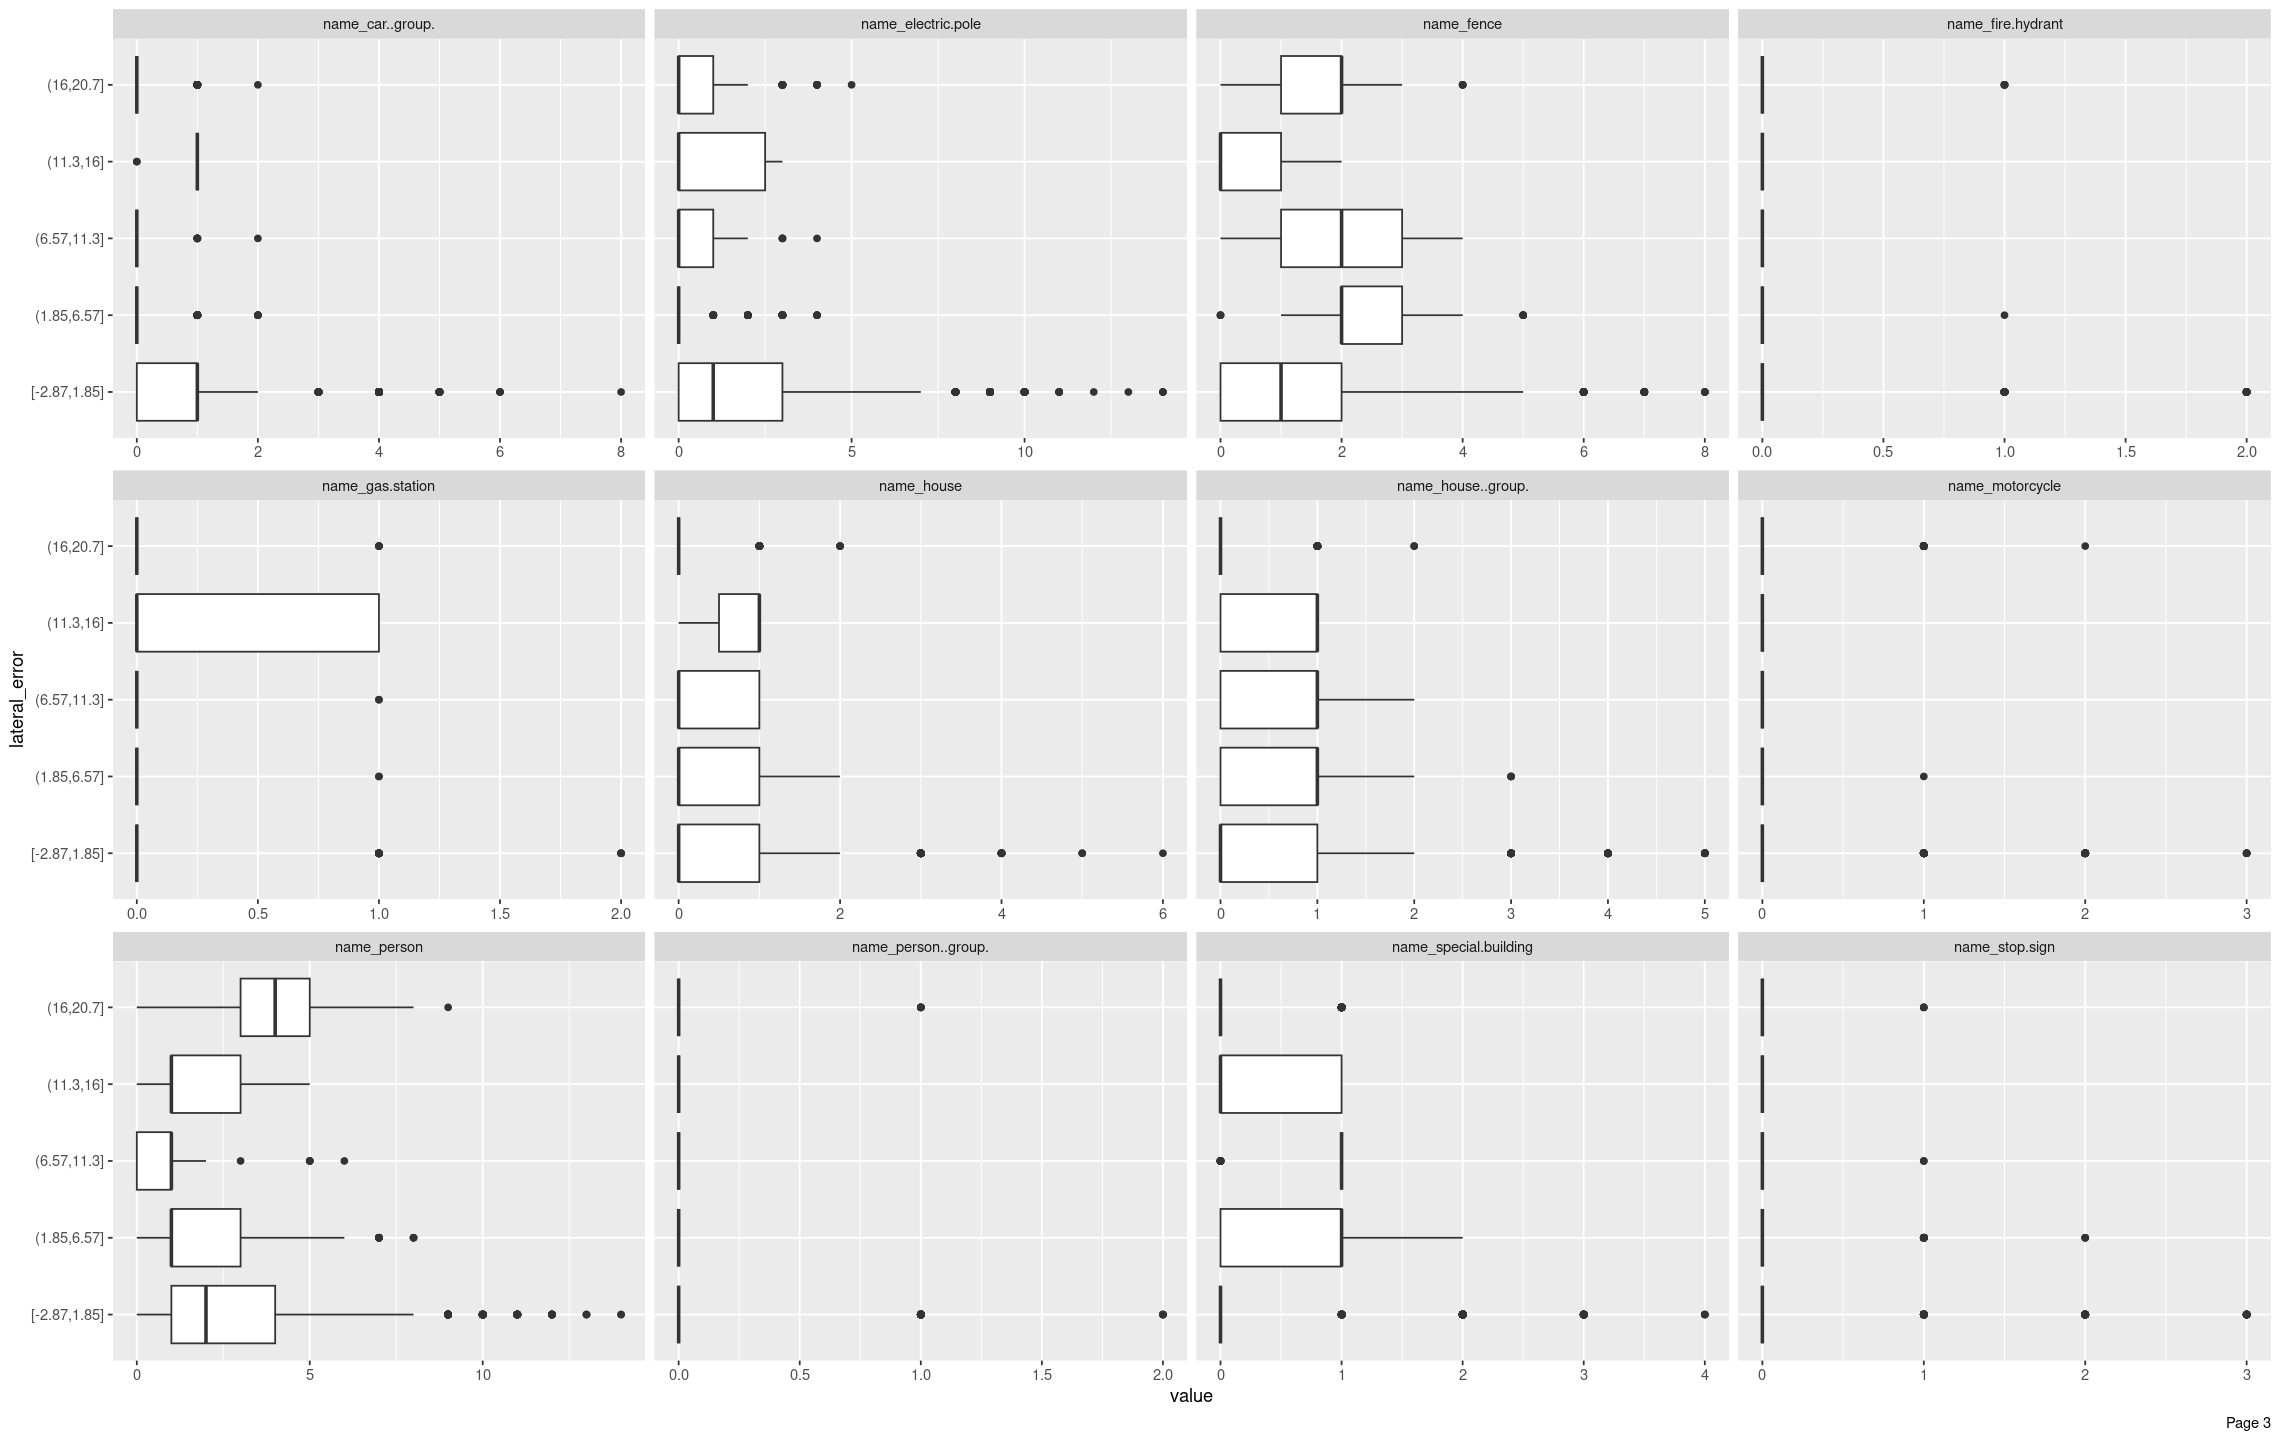

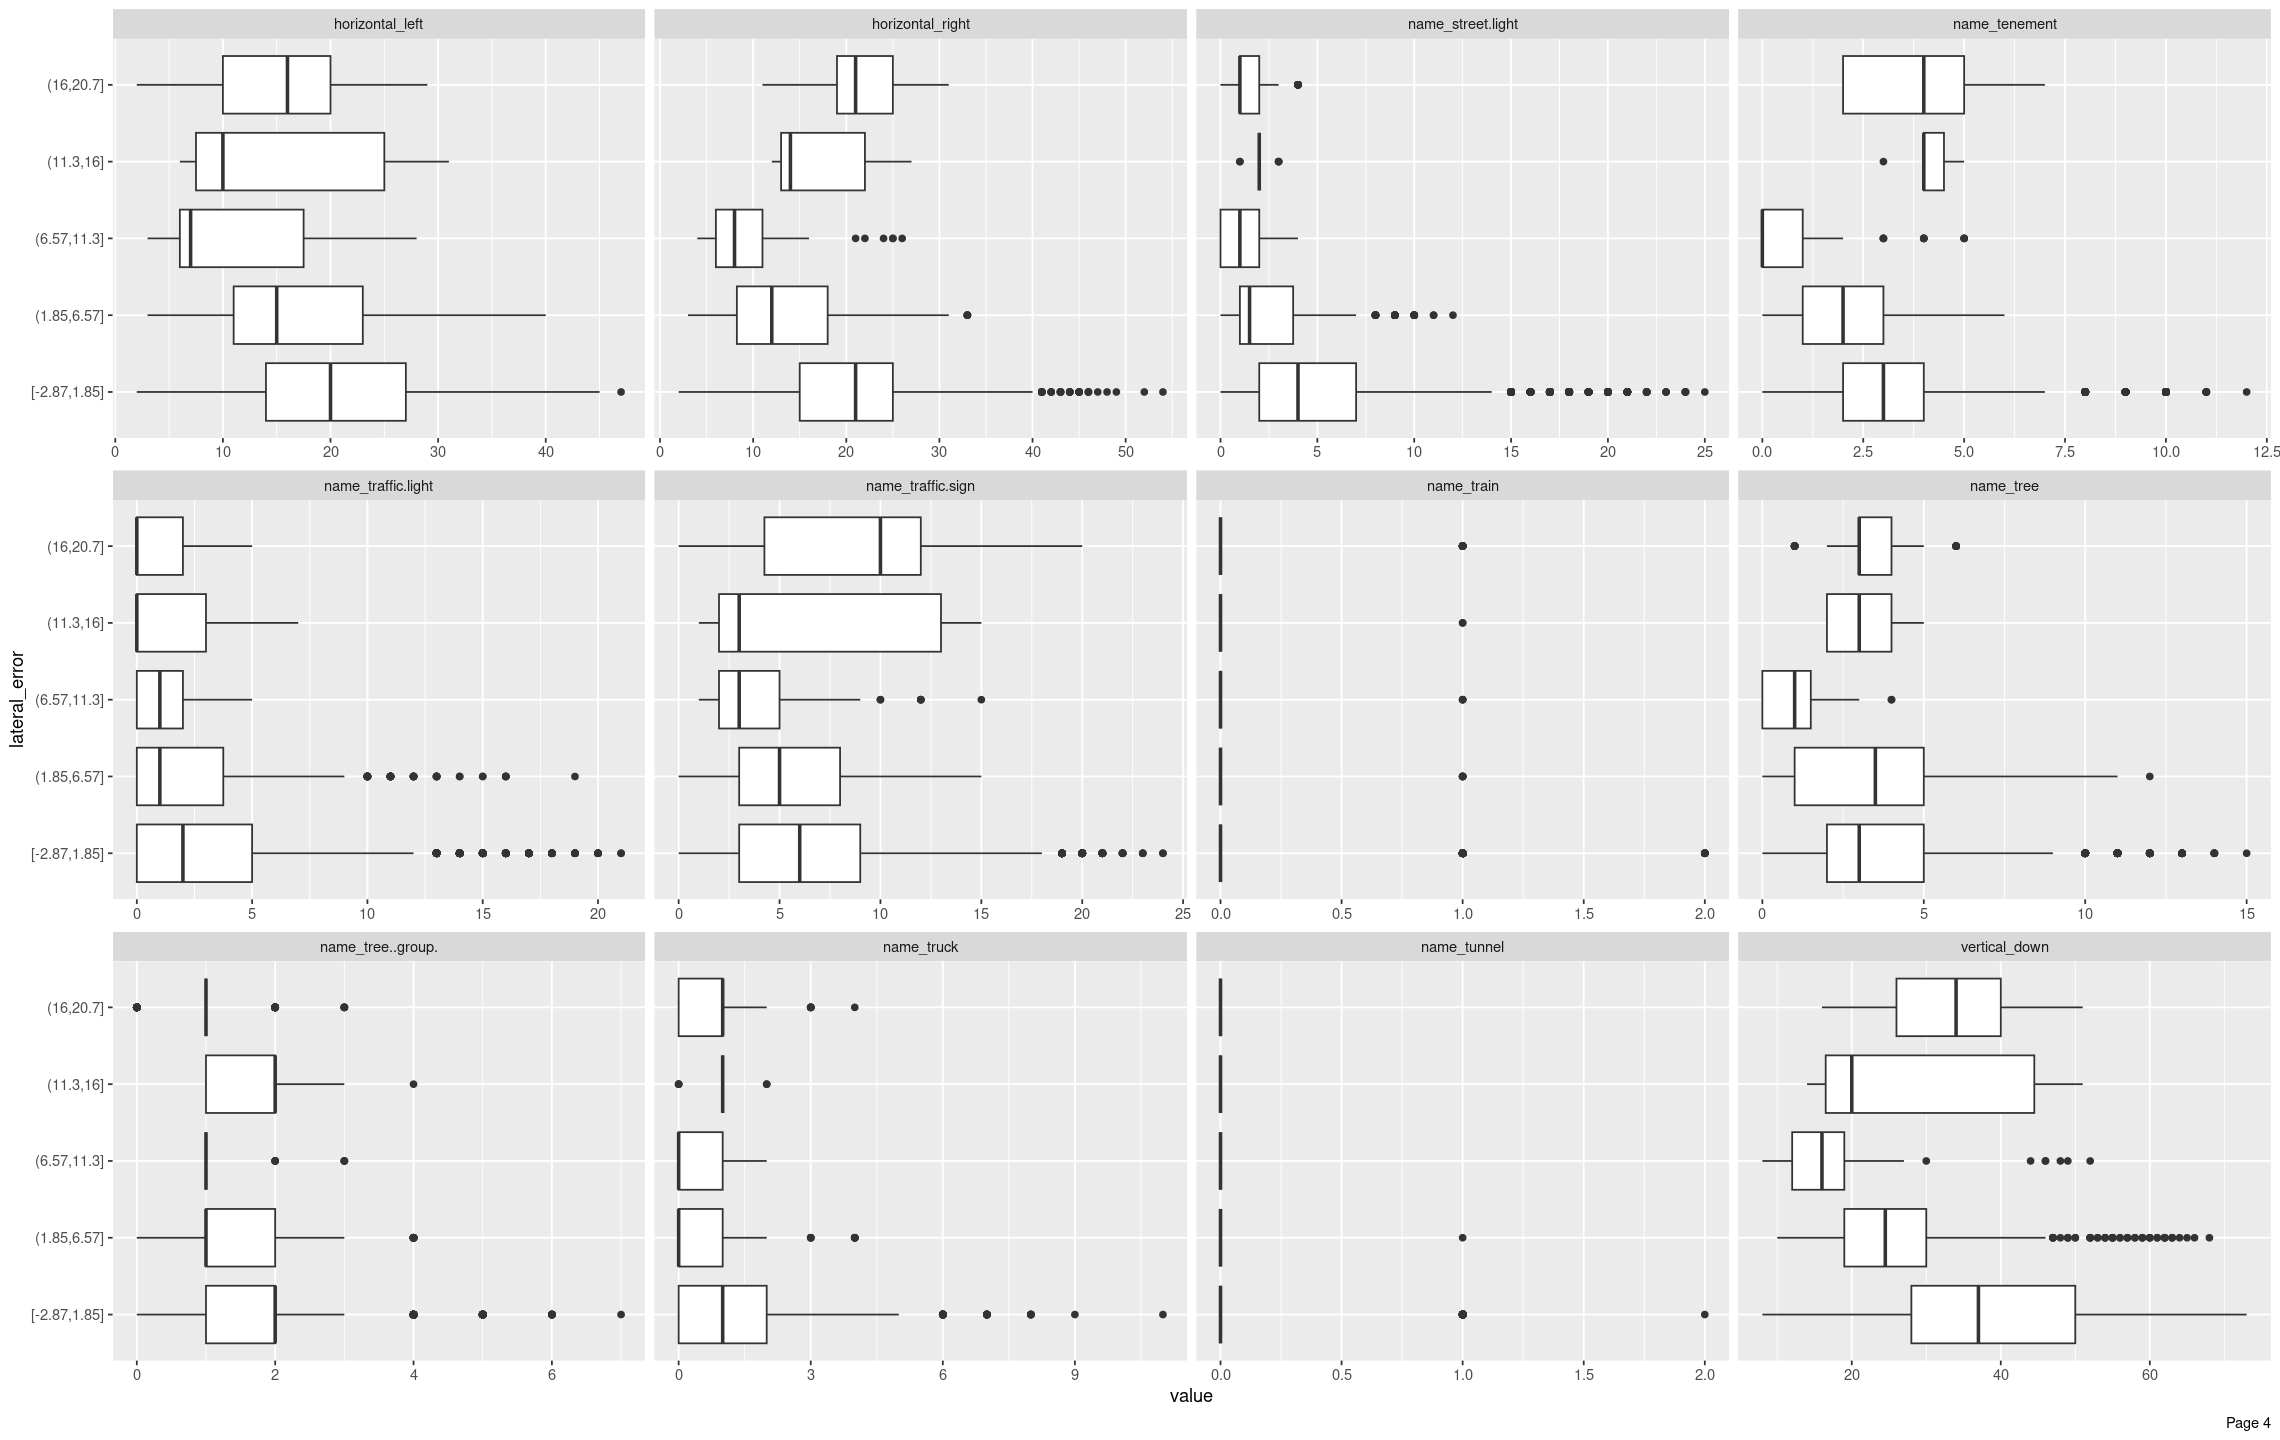

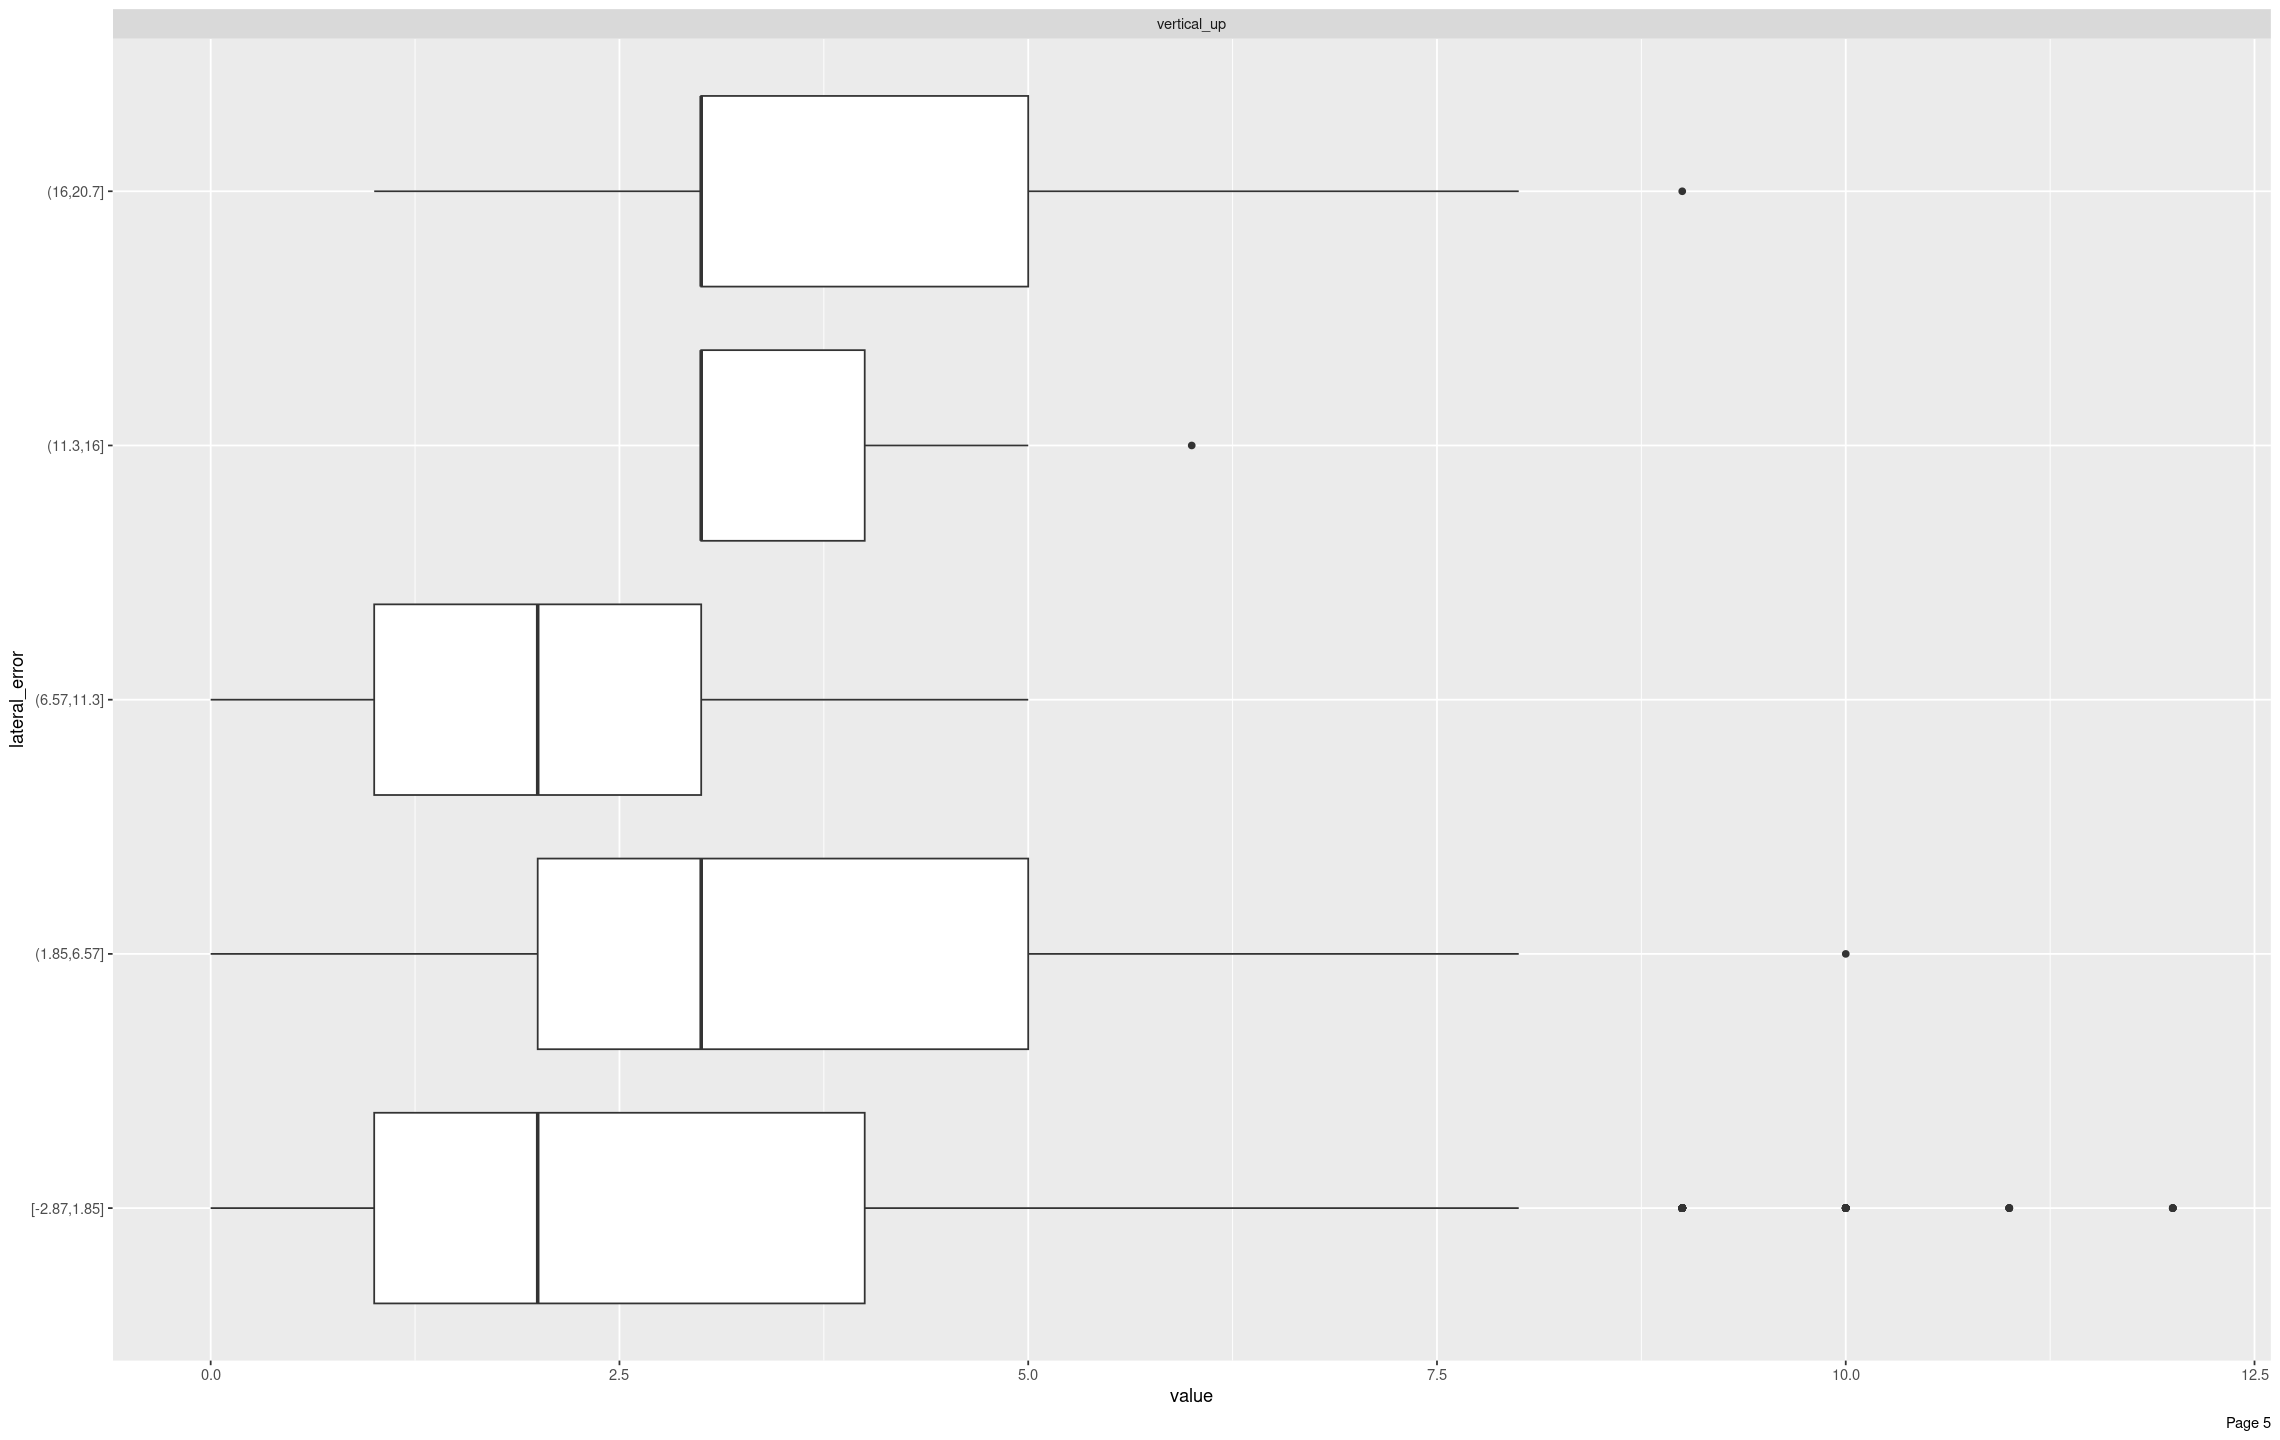

In [12]:
plot_boxplot(na.omit(data), by="lateral_error")

## longitudinal_error

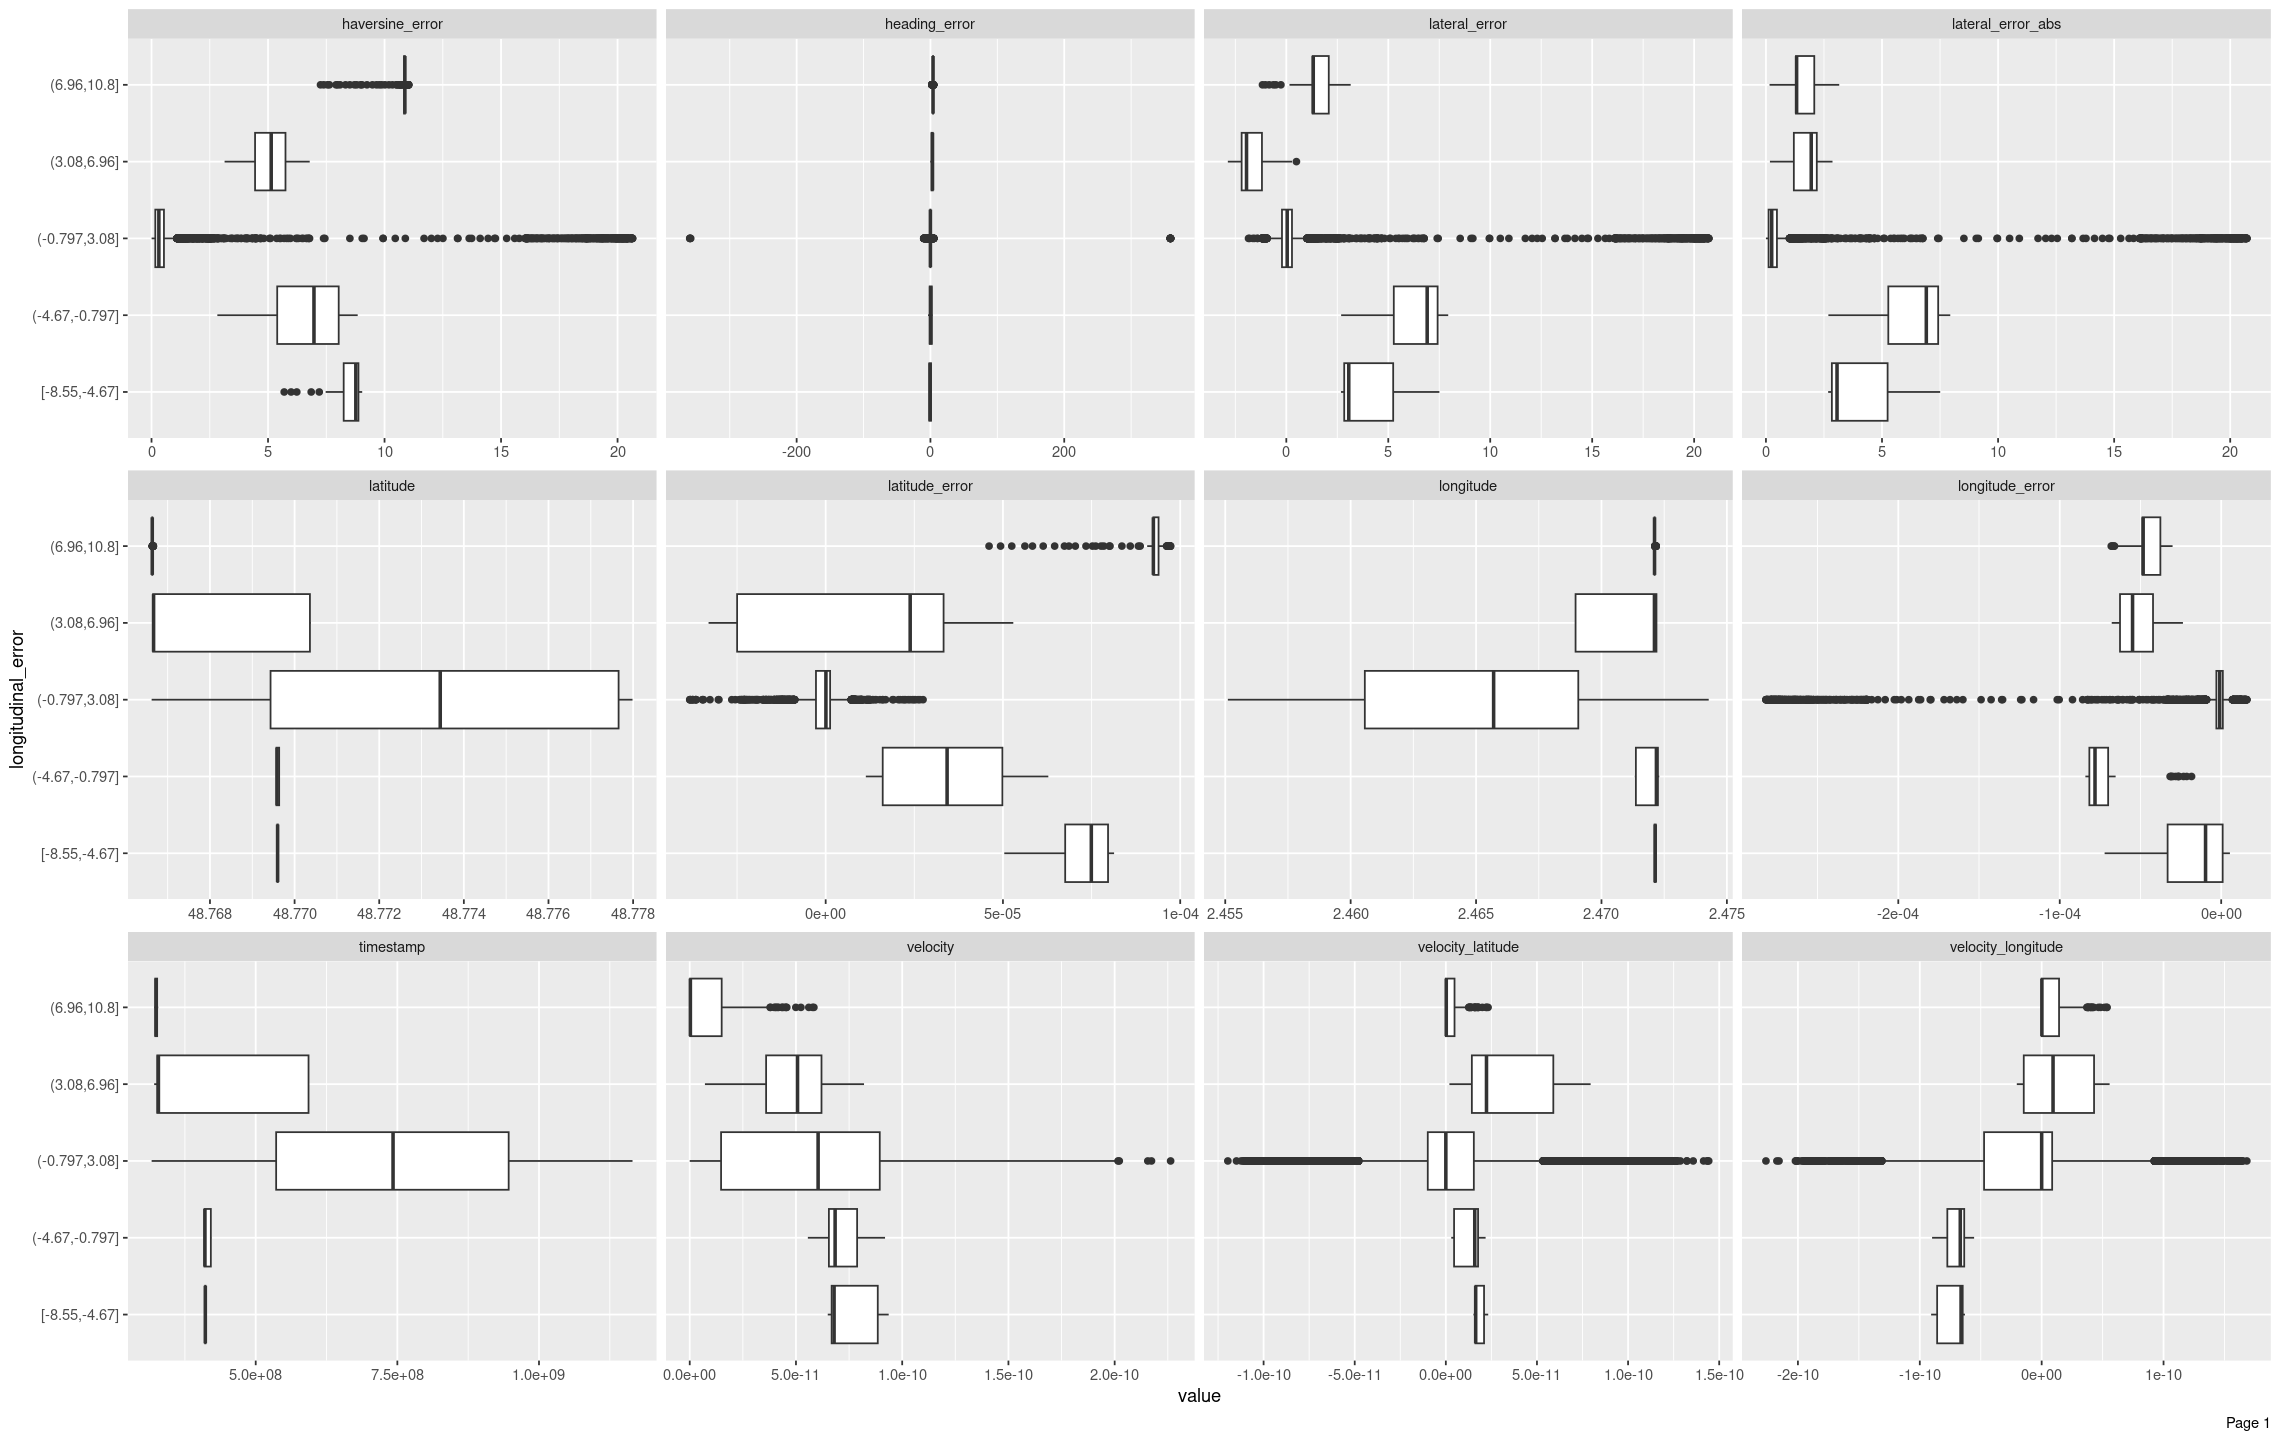

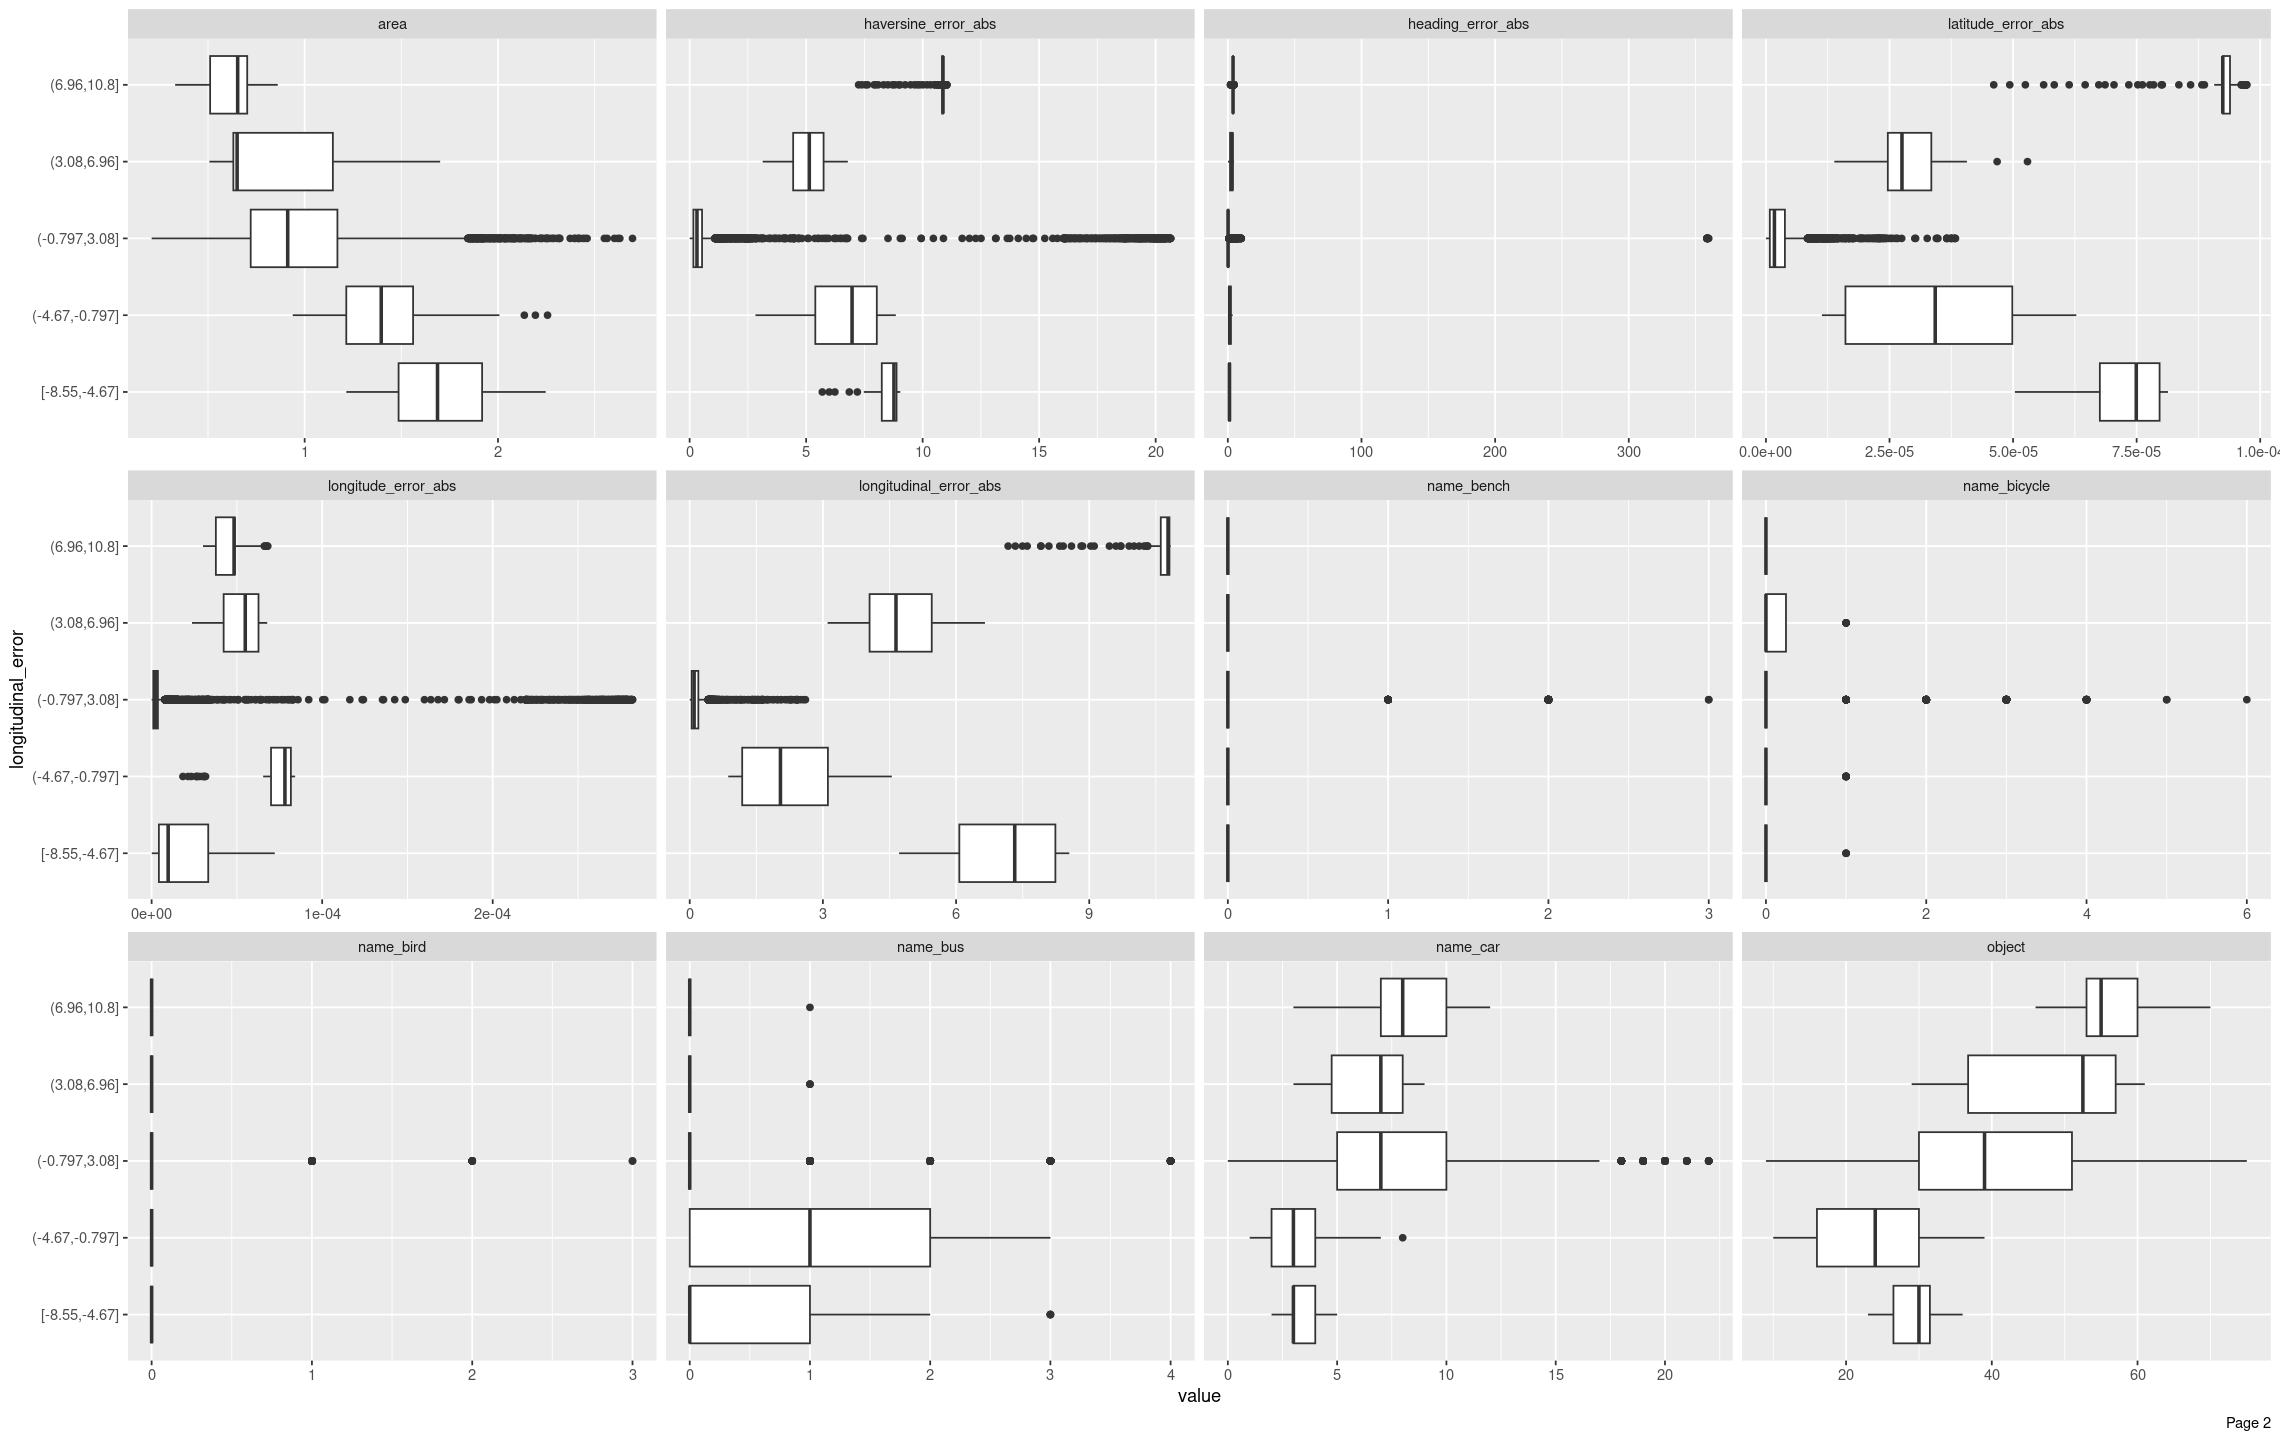

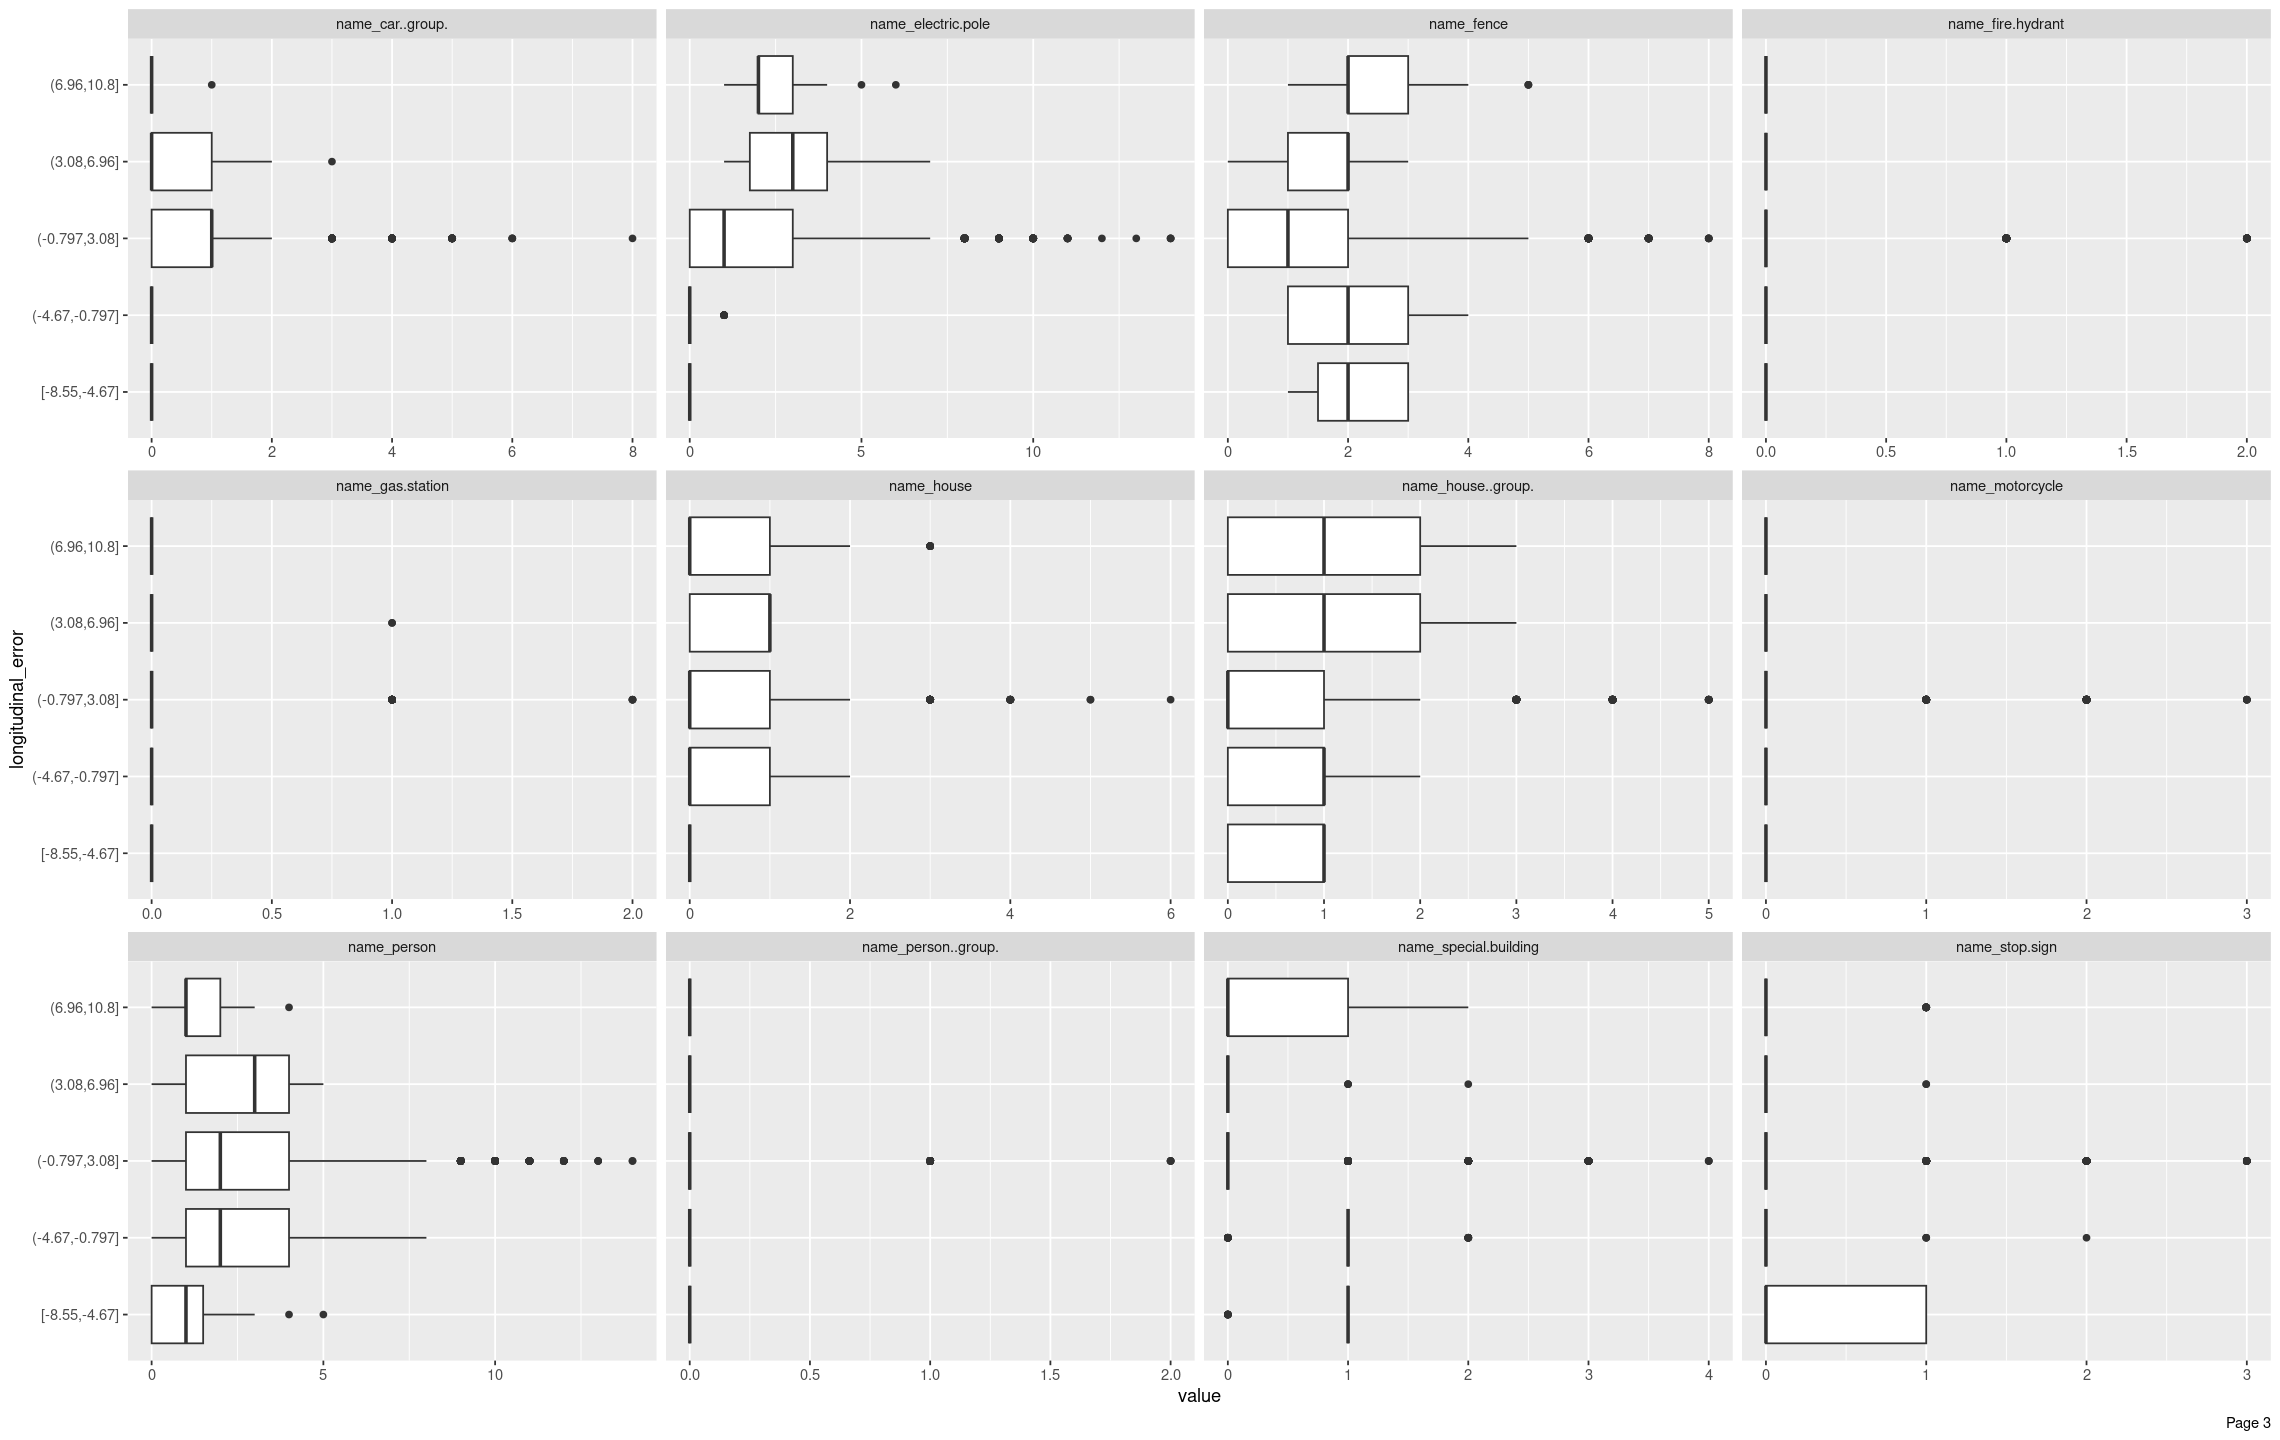

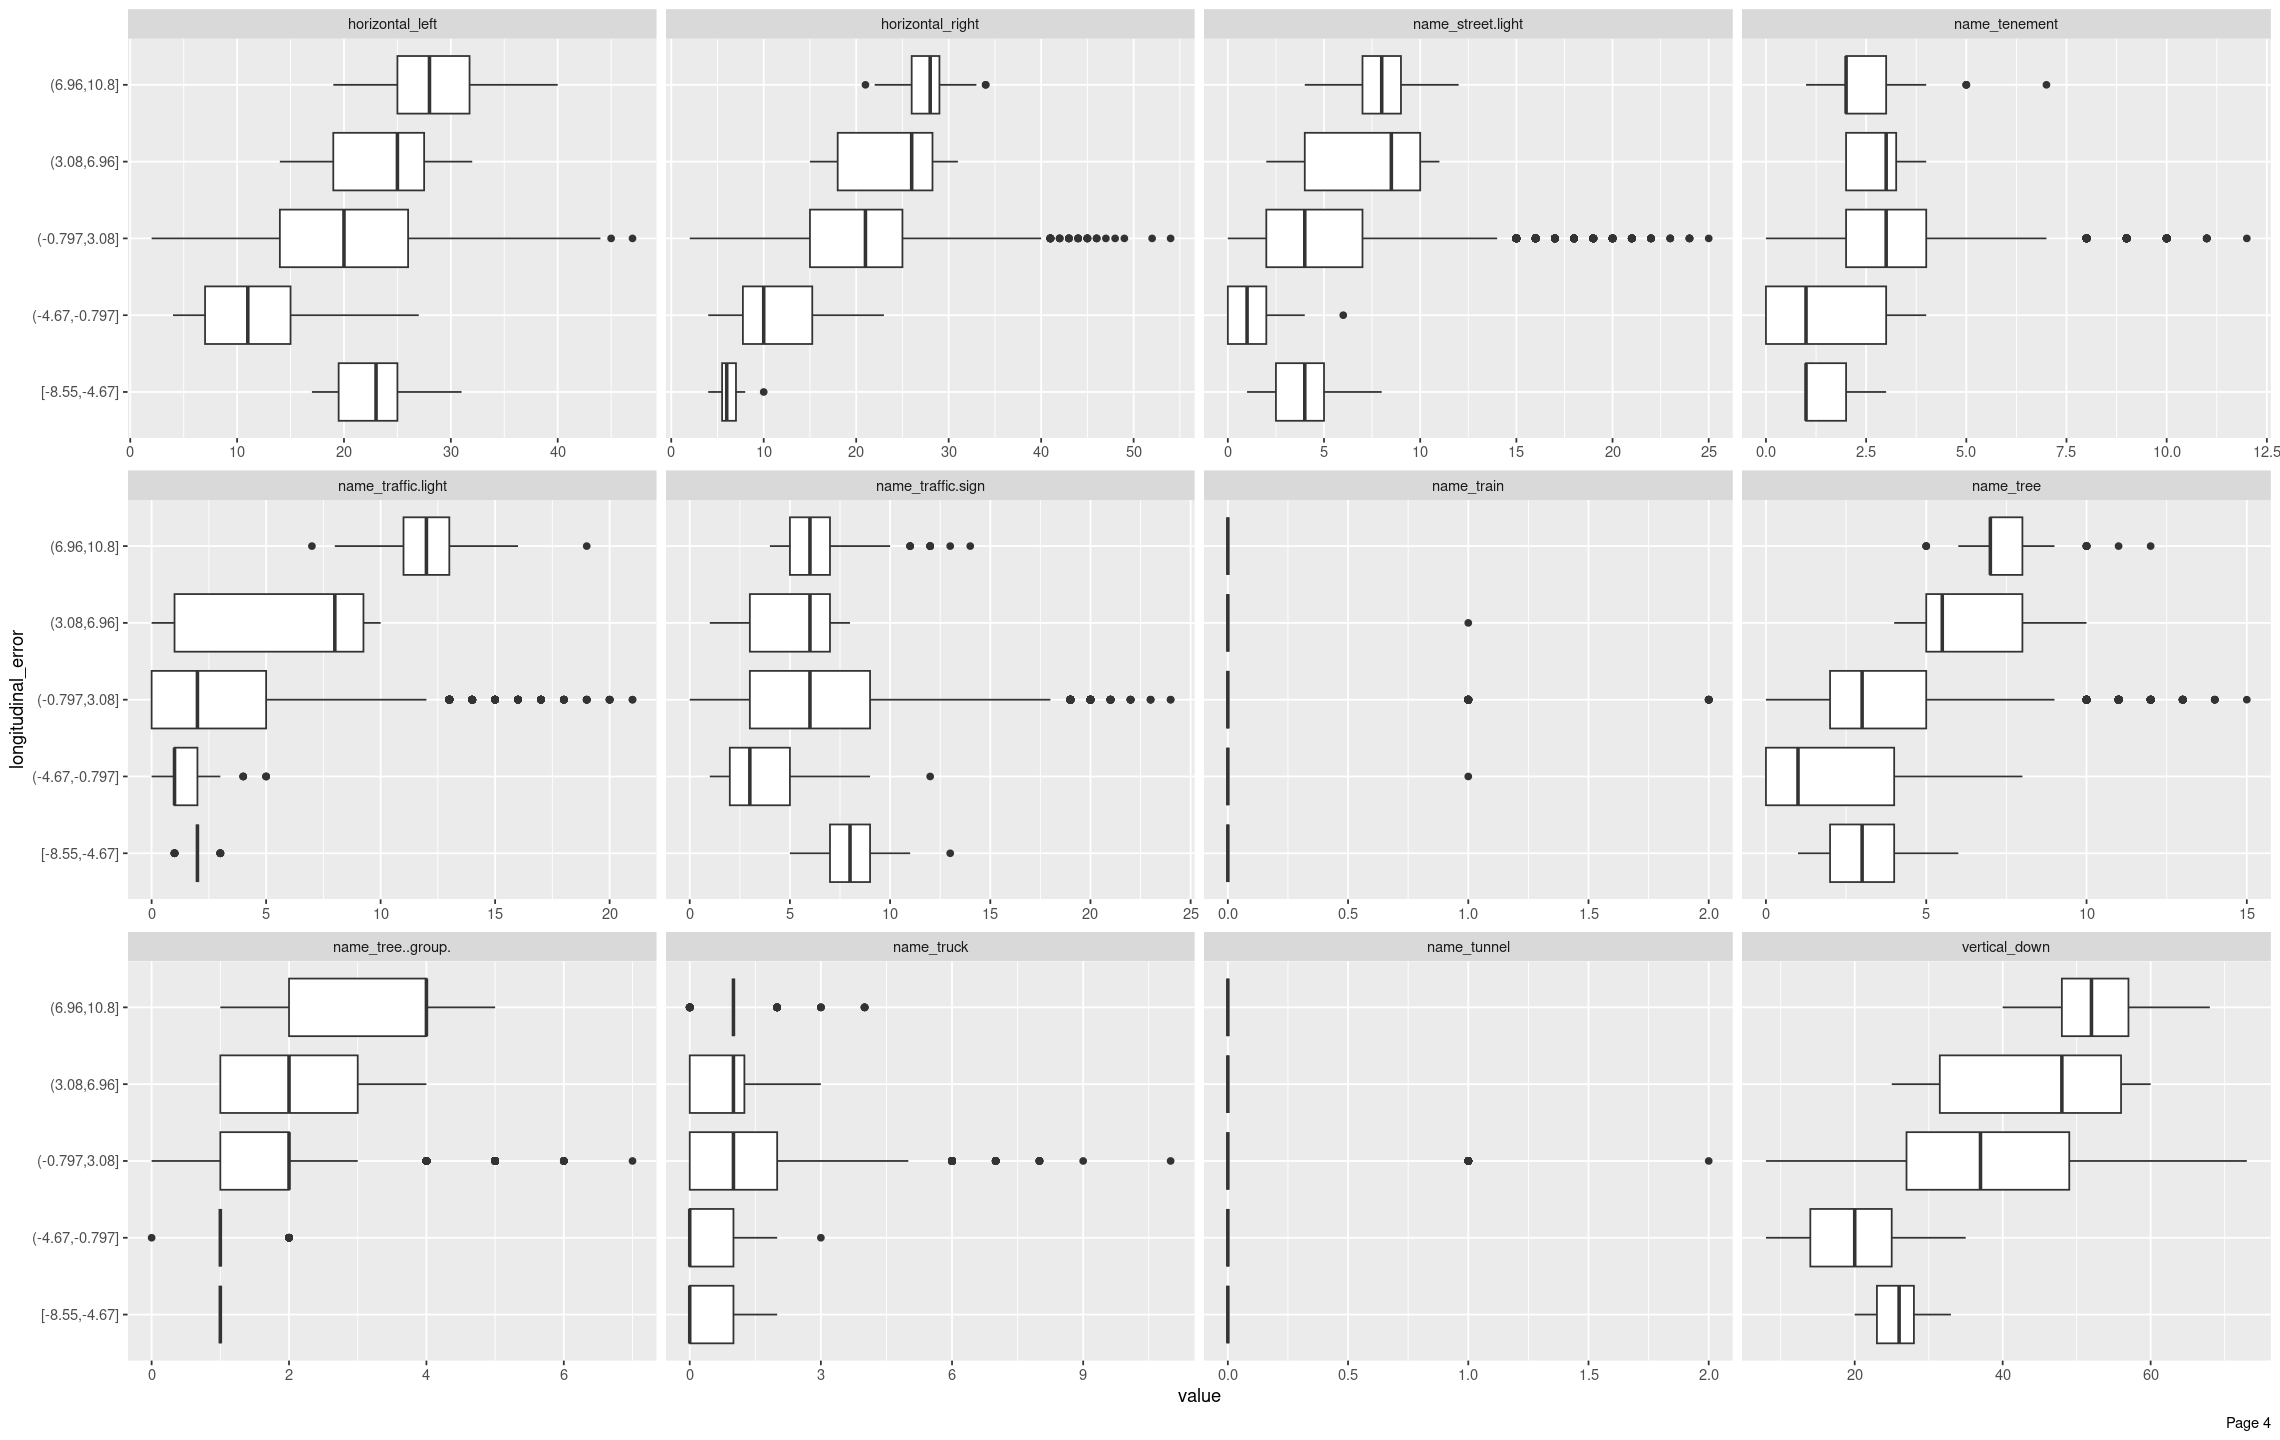

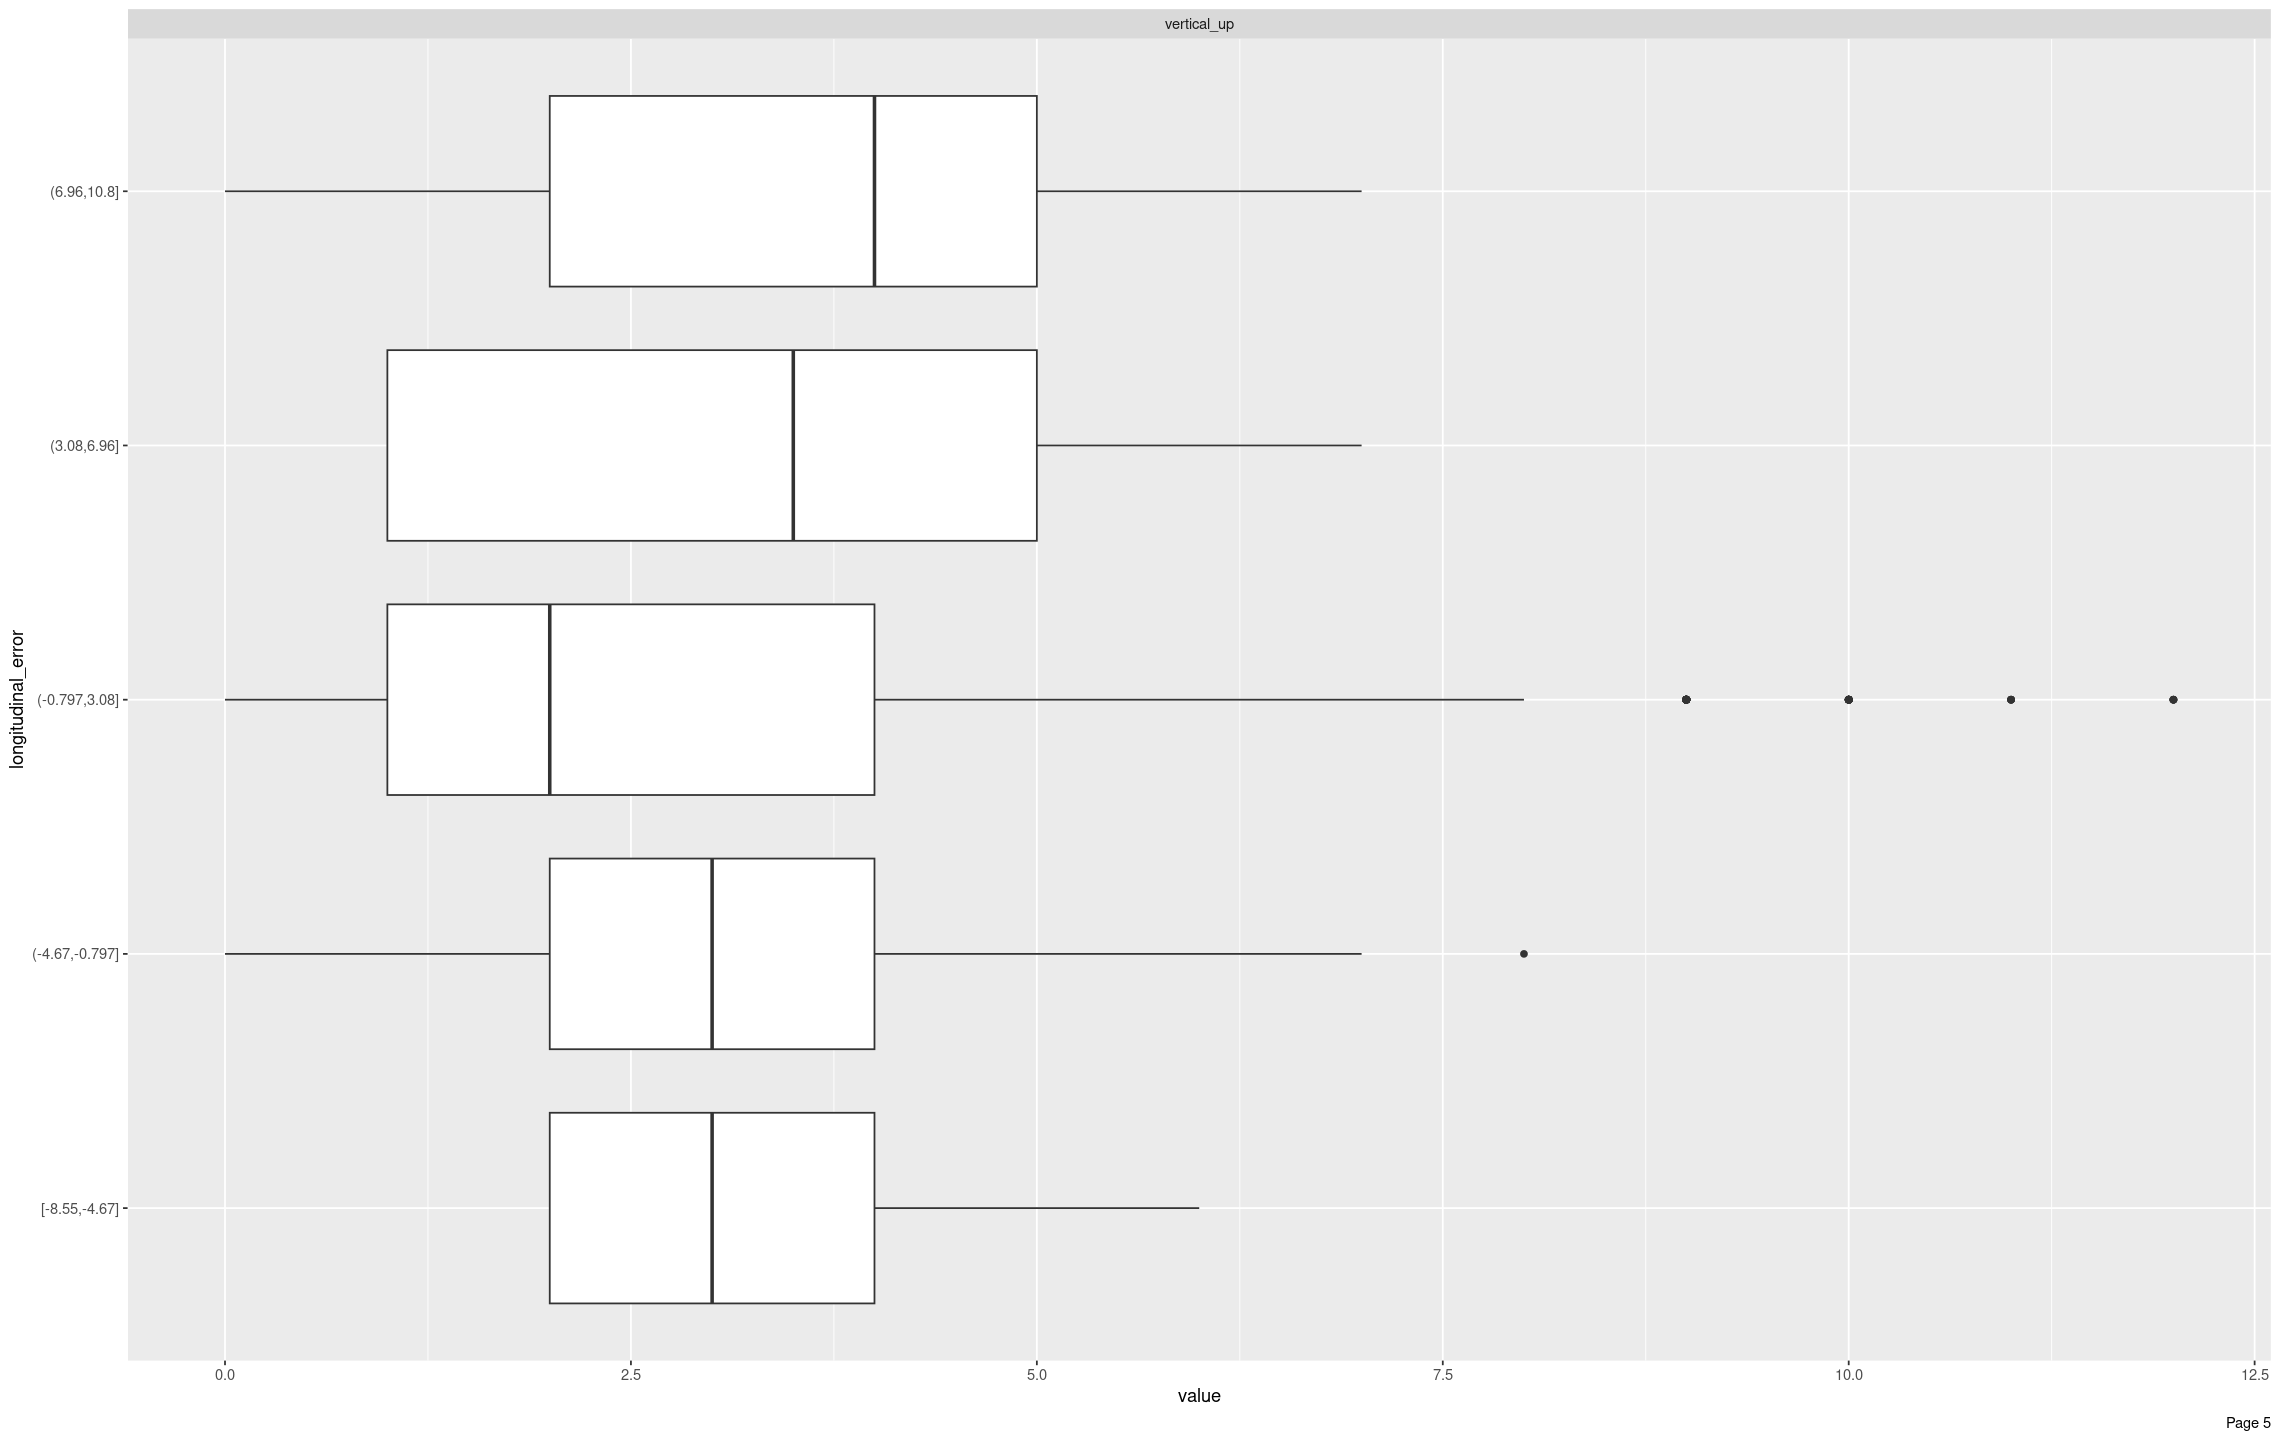

In [13]:
plot_boxplot(na.omit(data), by="longitudinal_error")

# Scatter plot 2D

## lateral_error

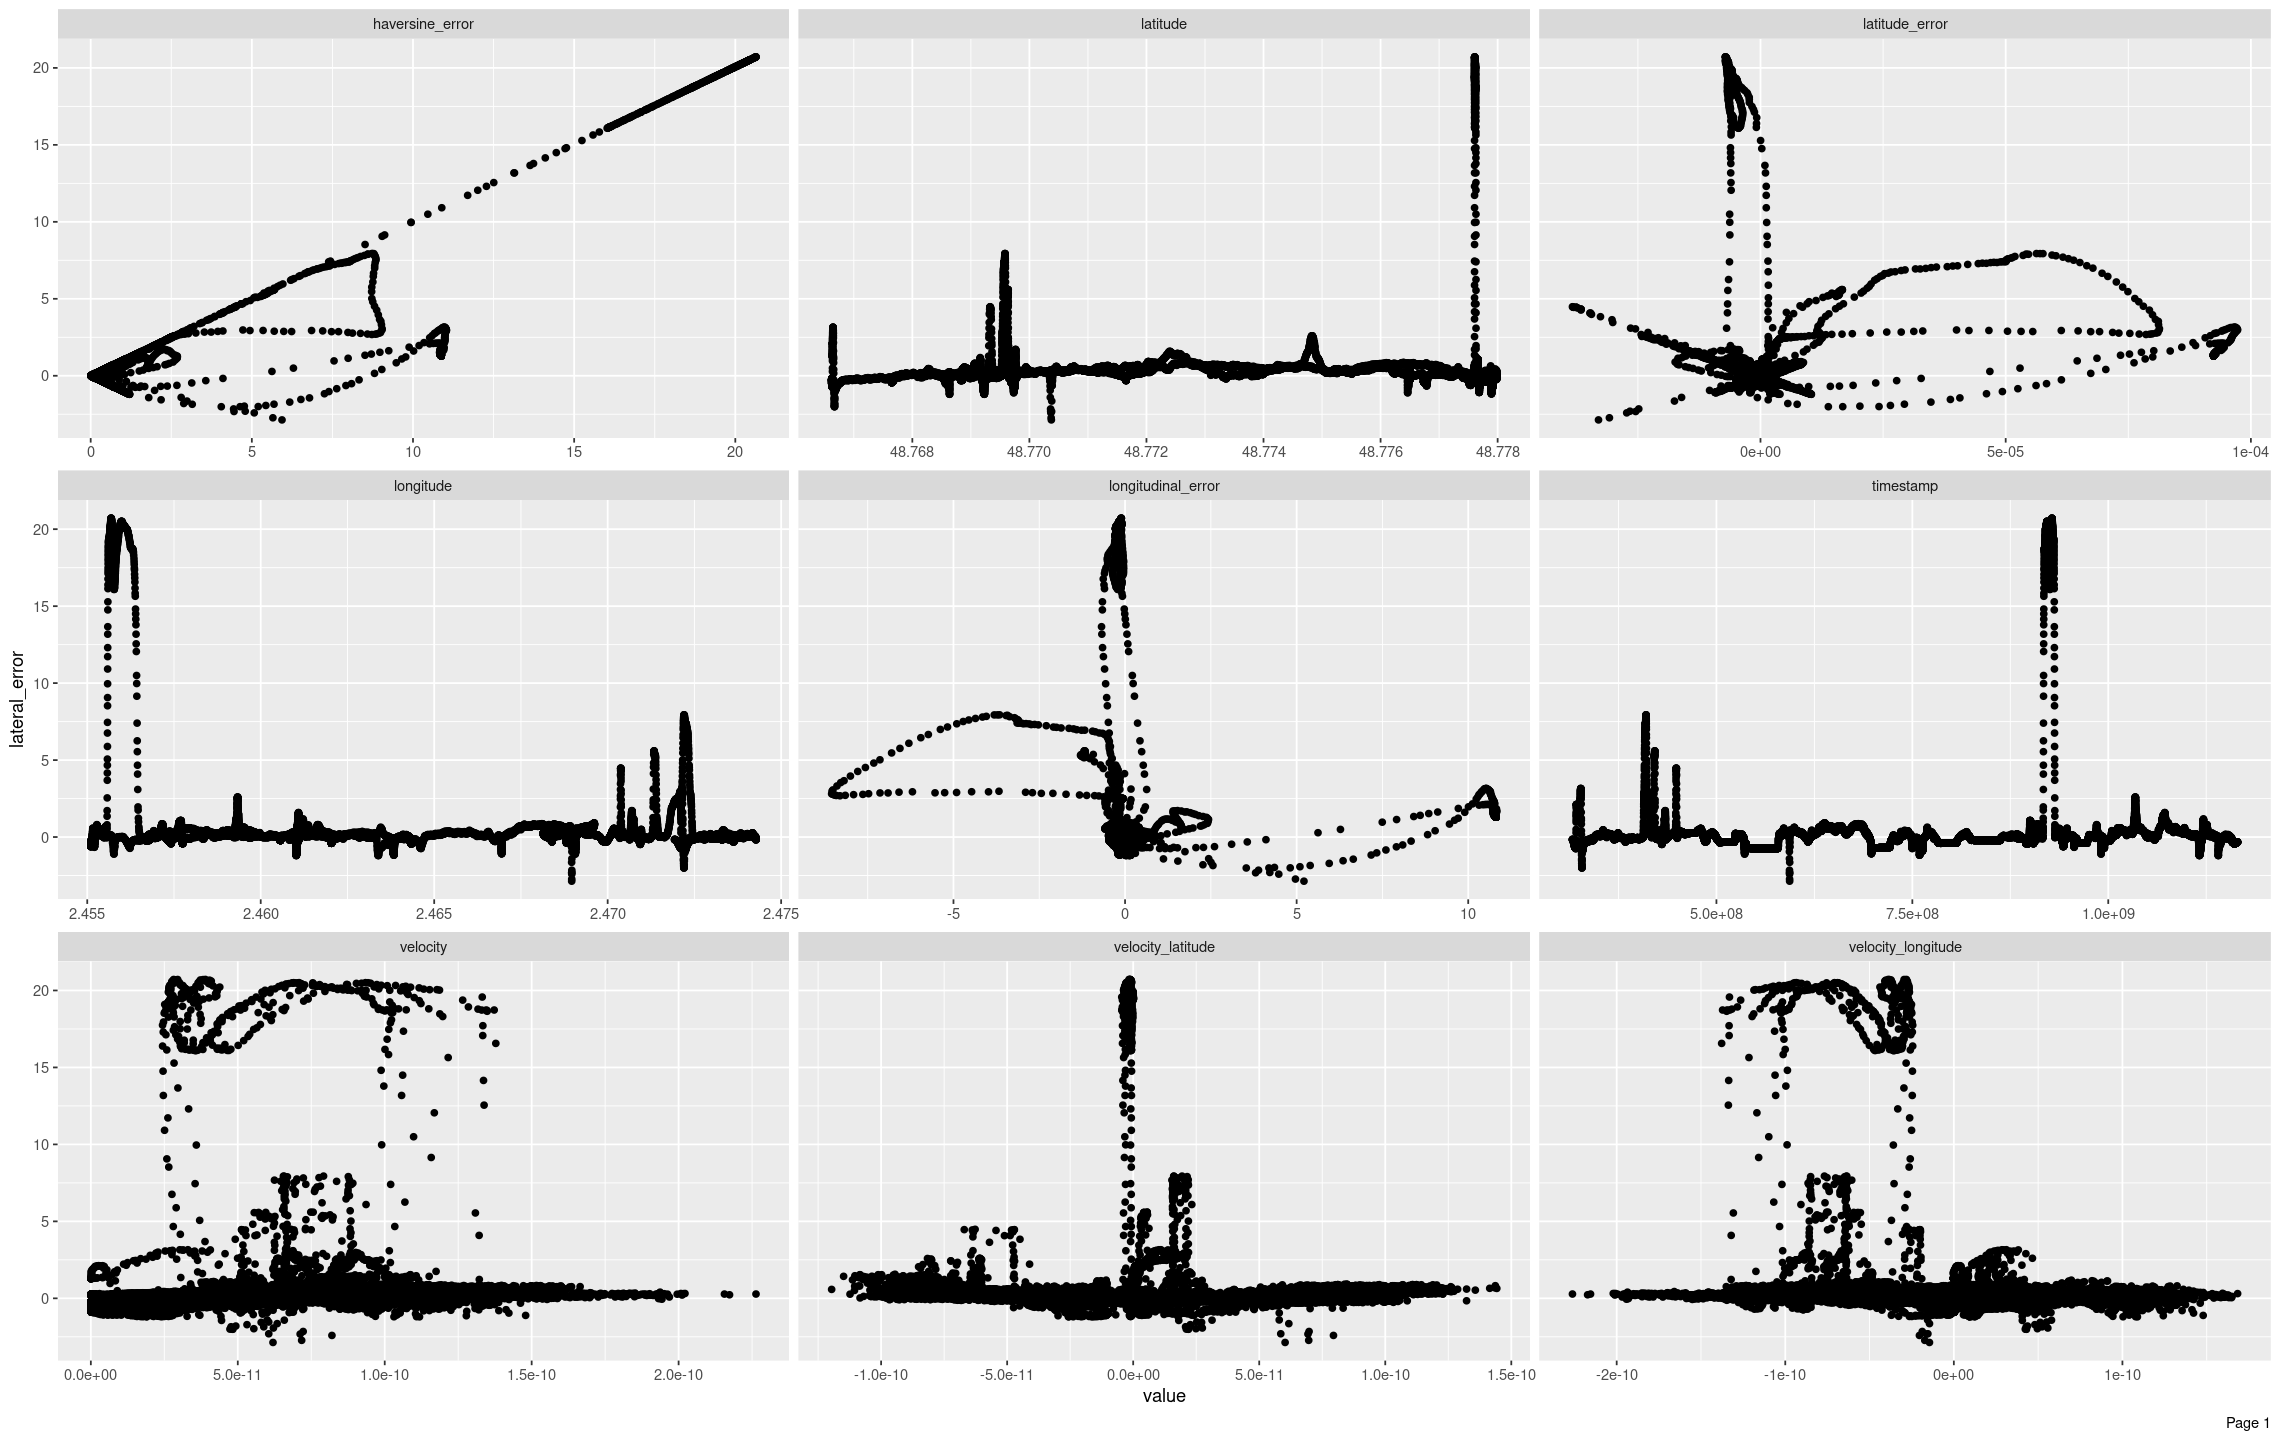

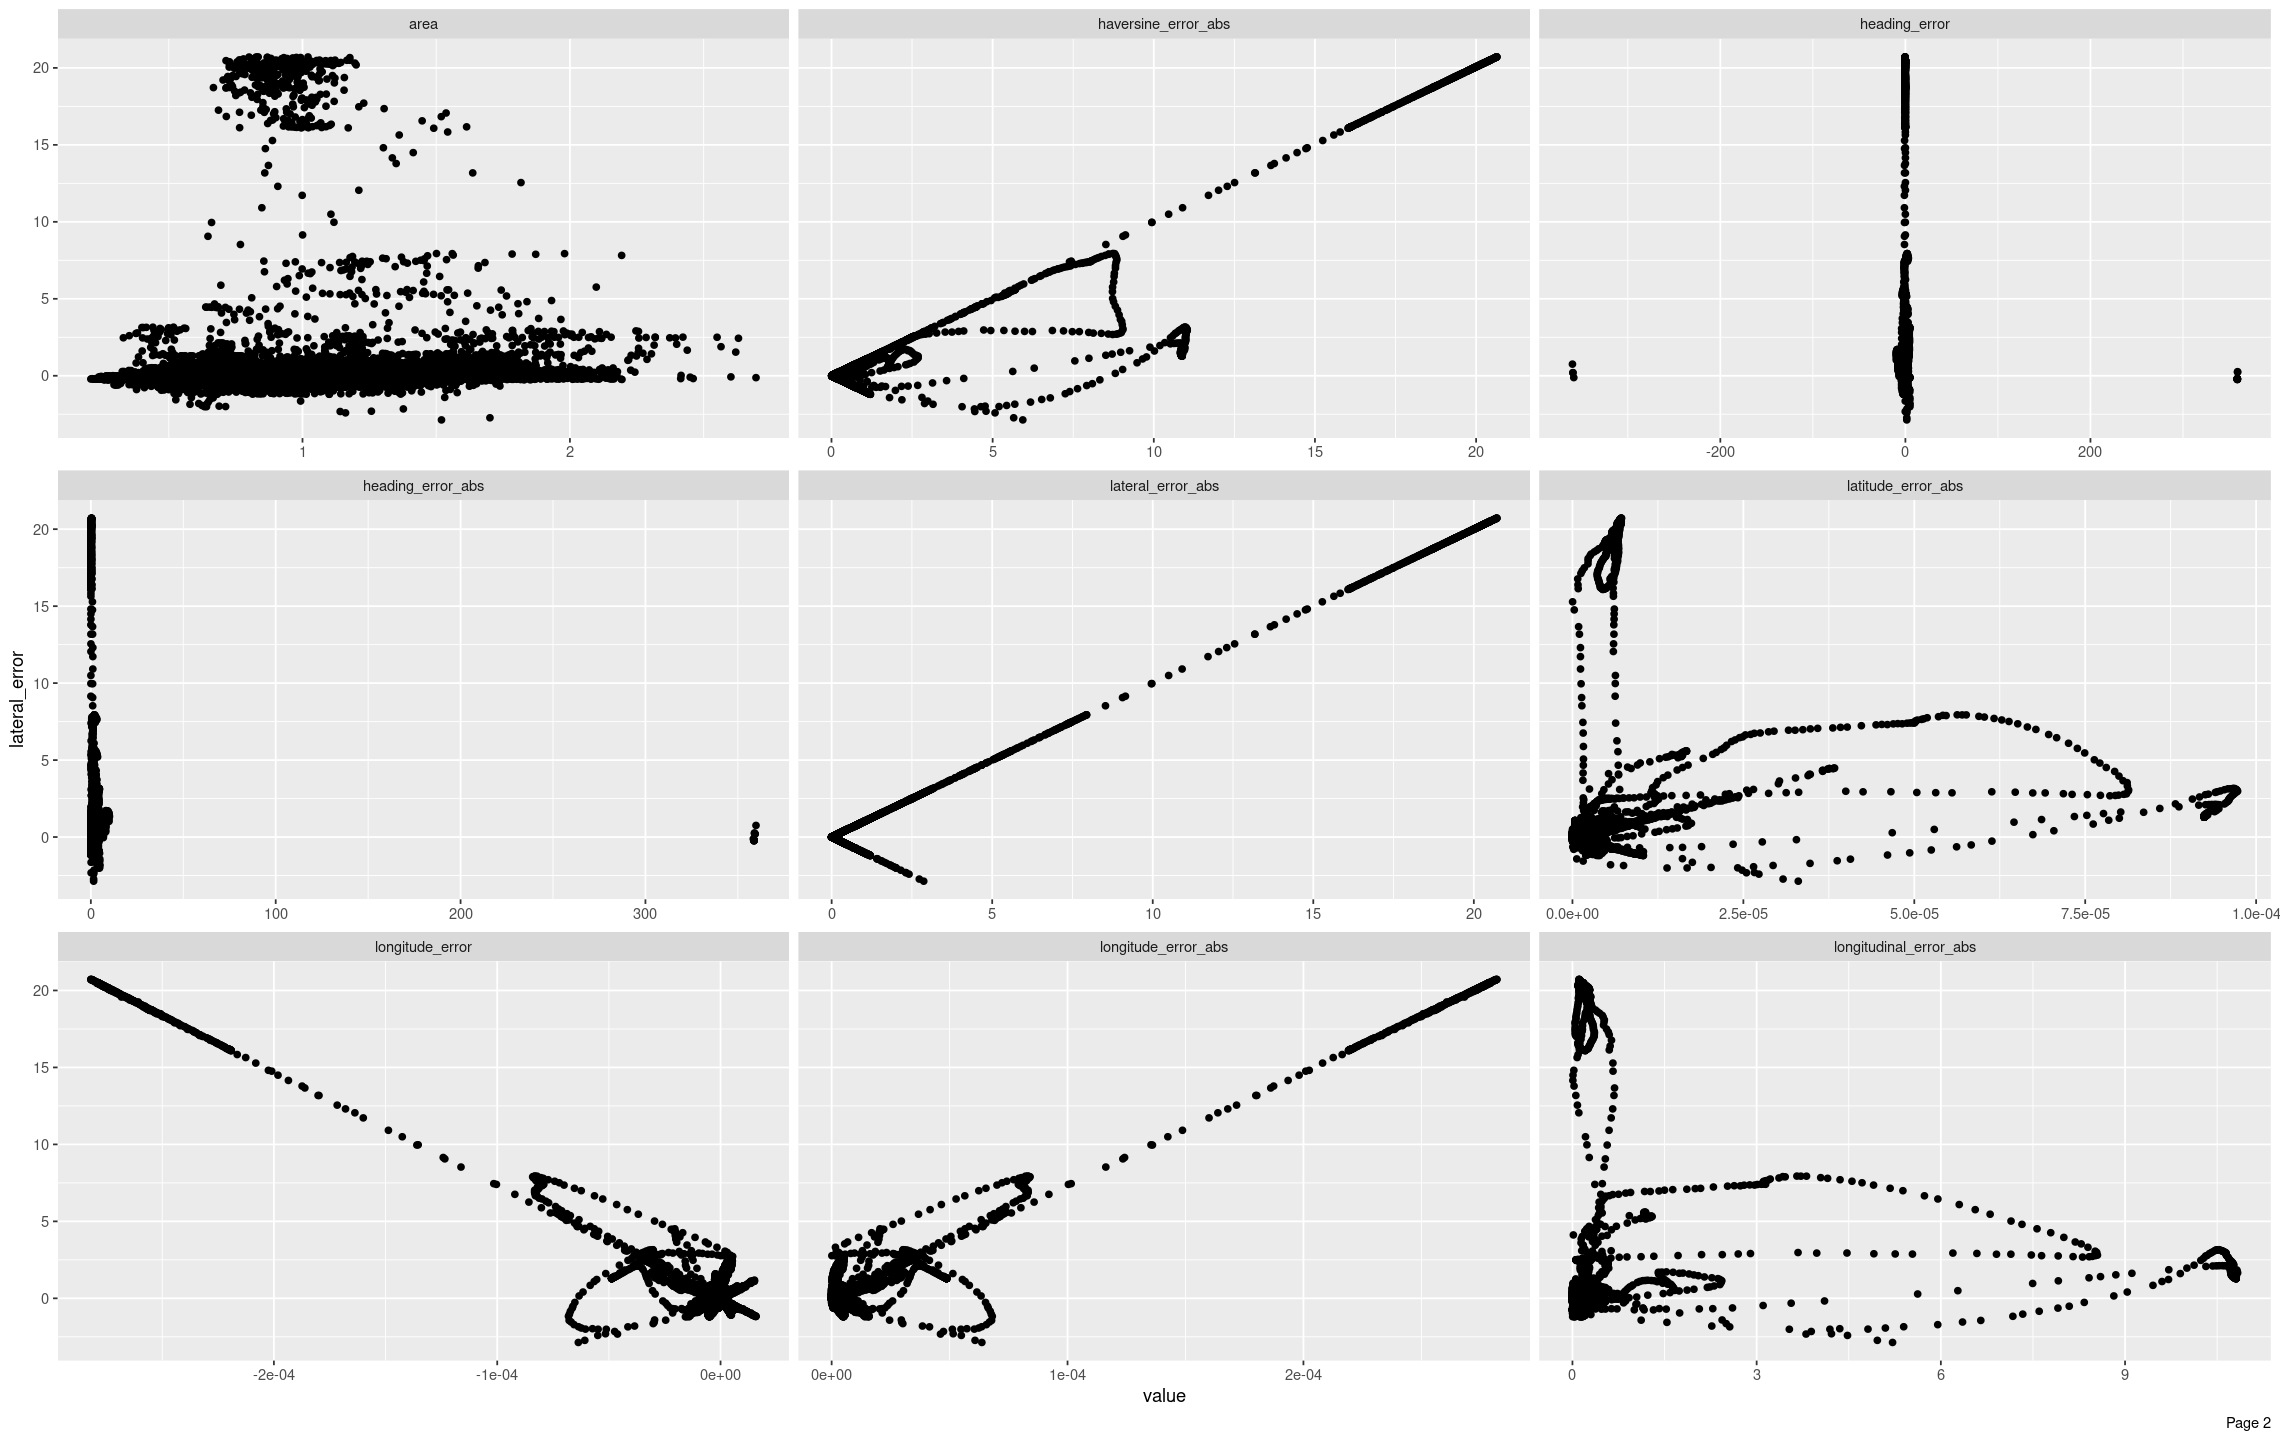

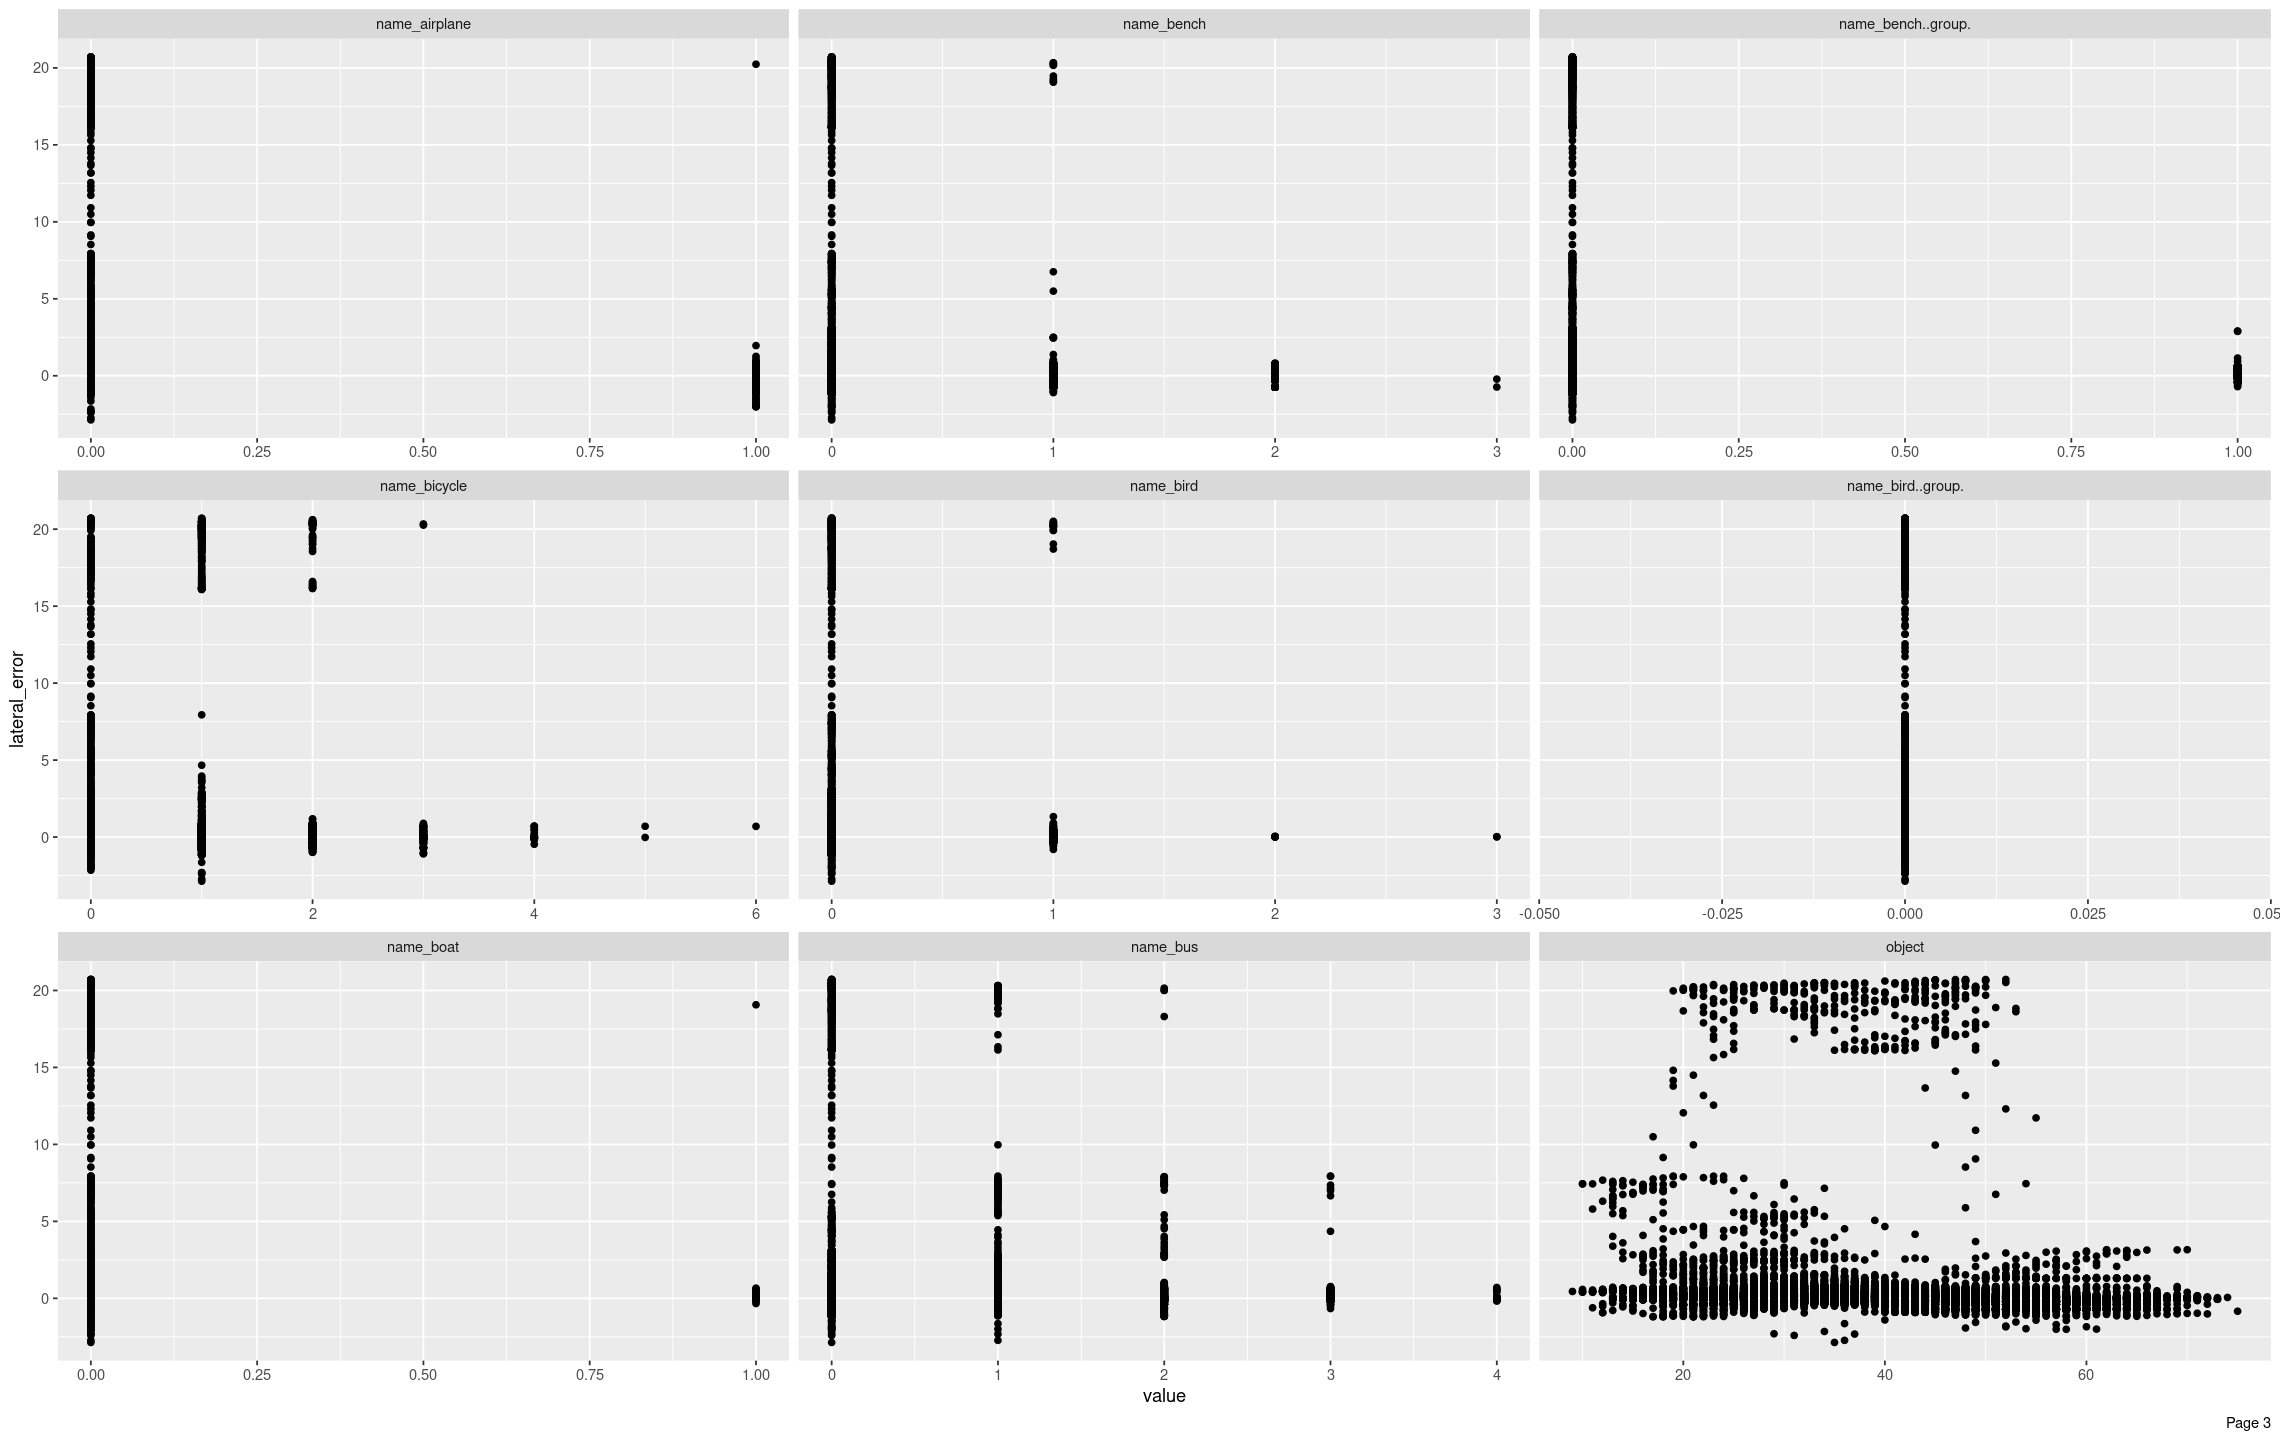

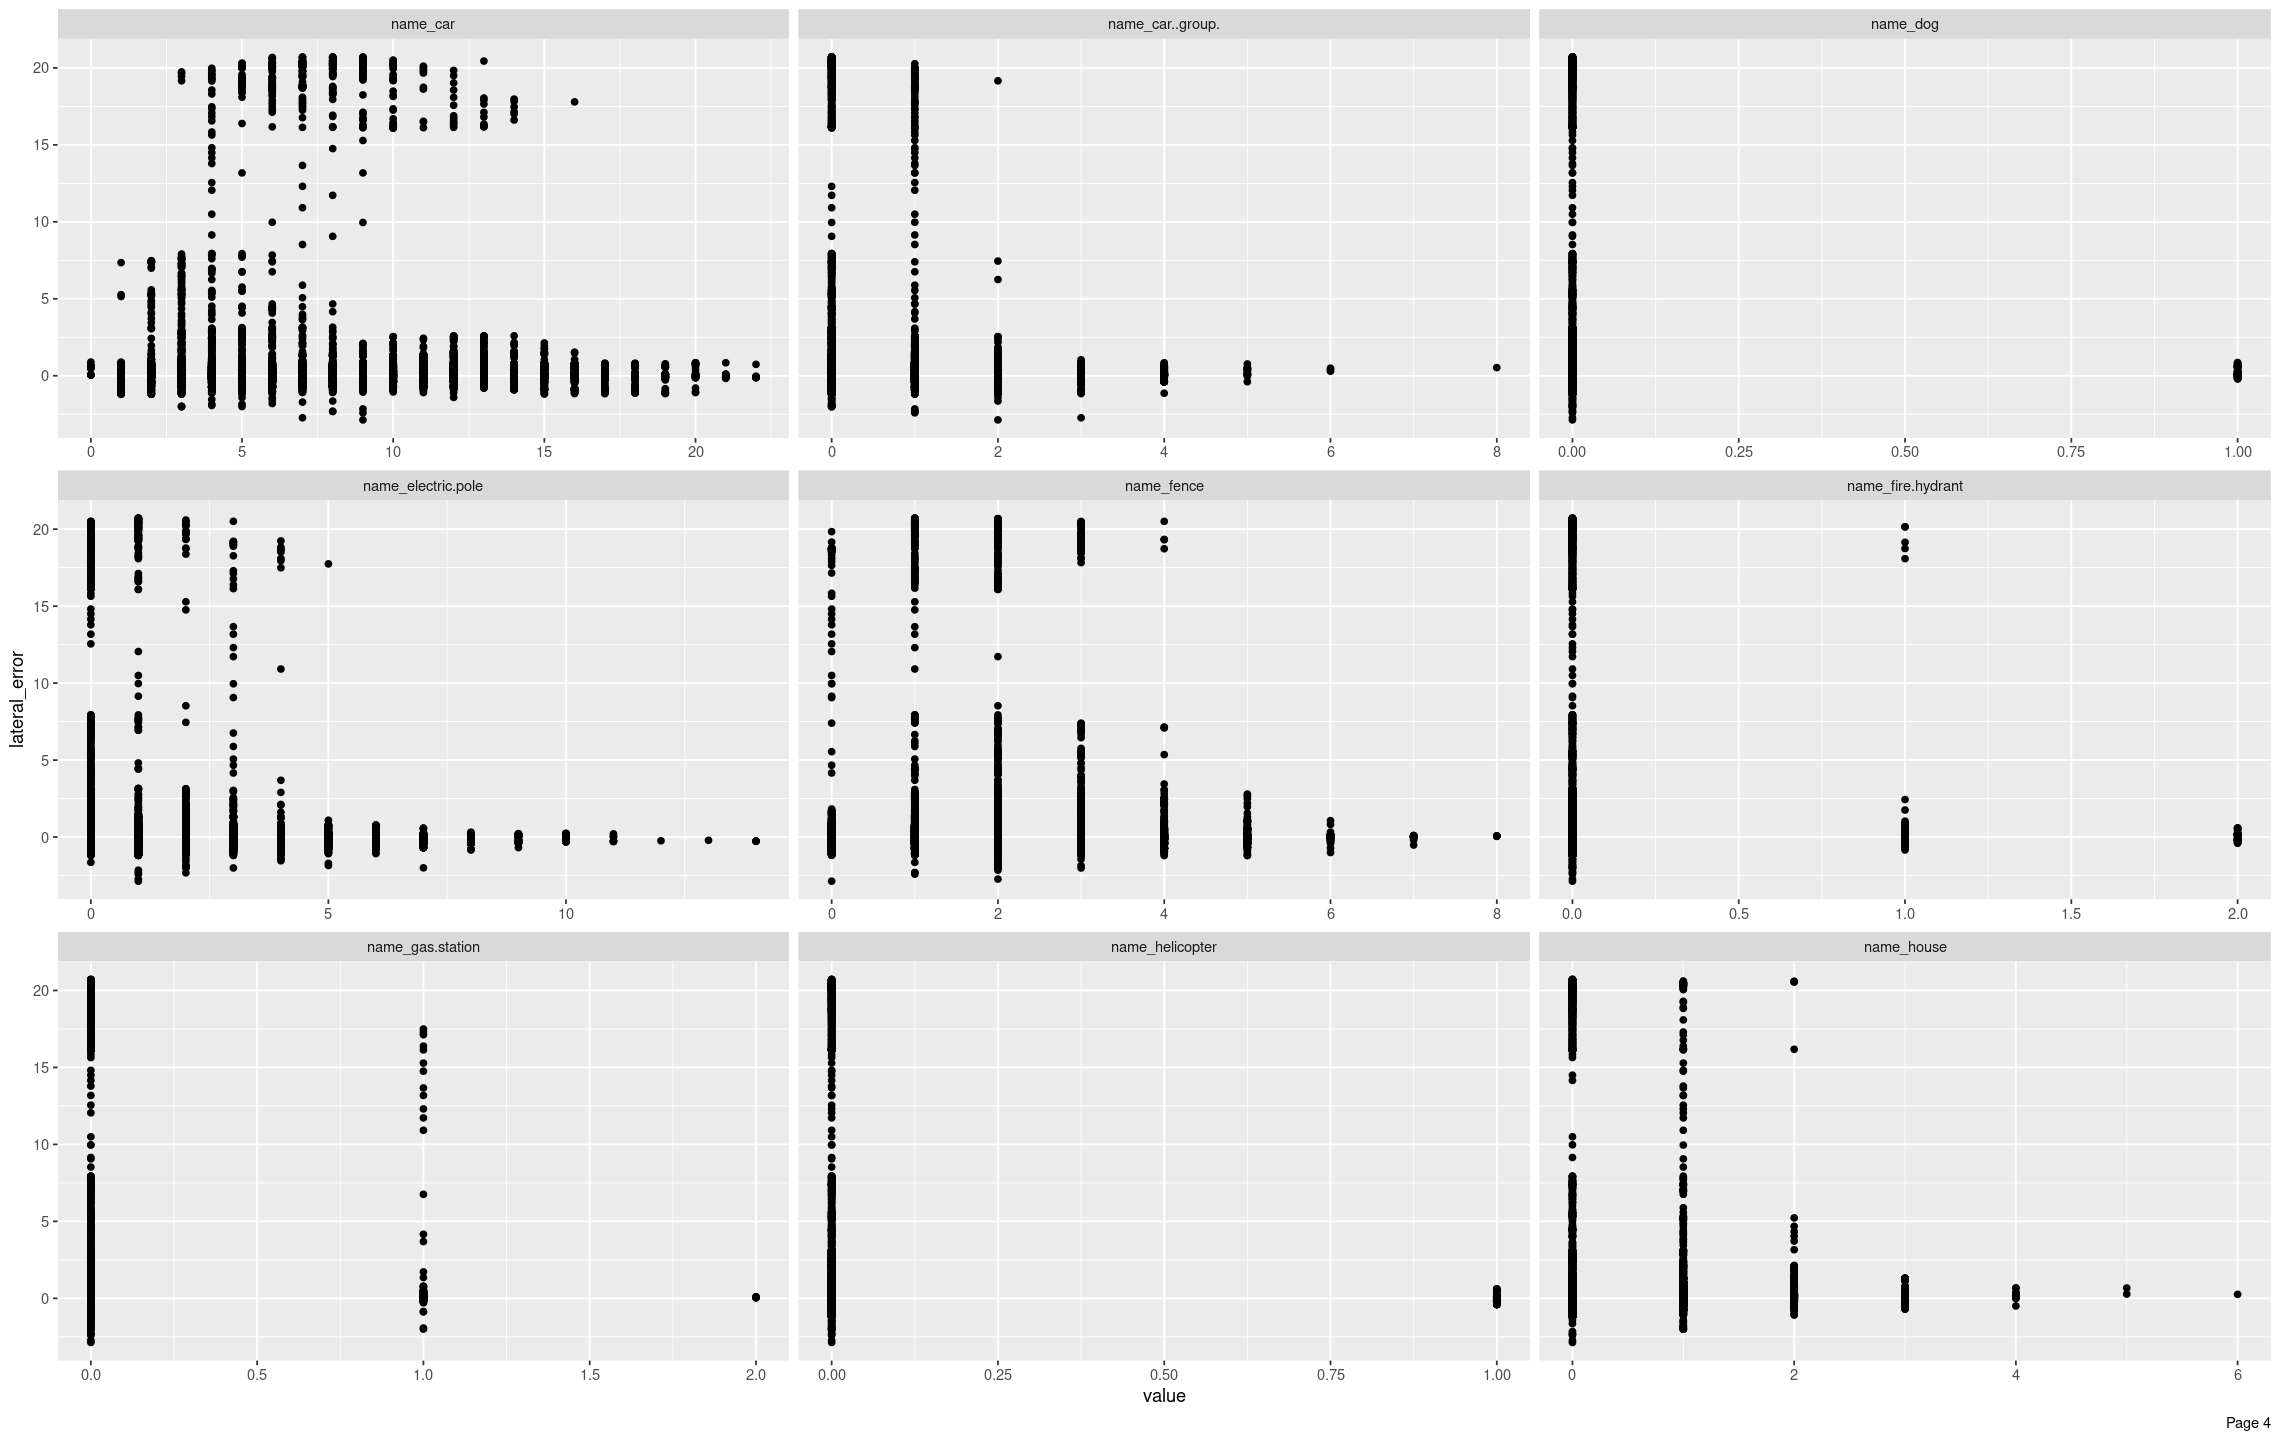

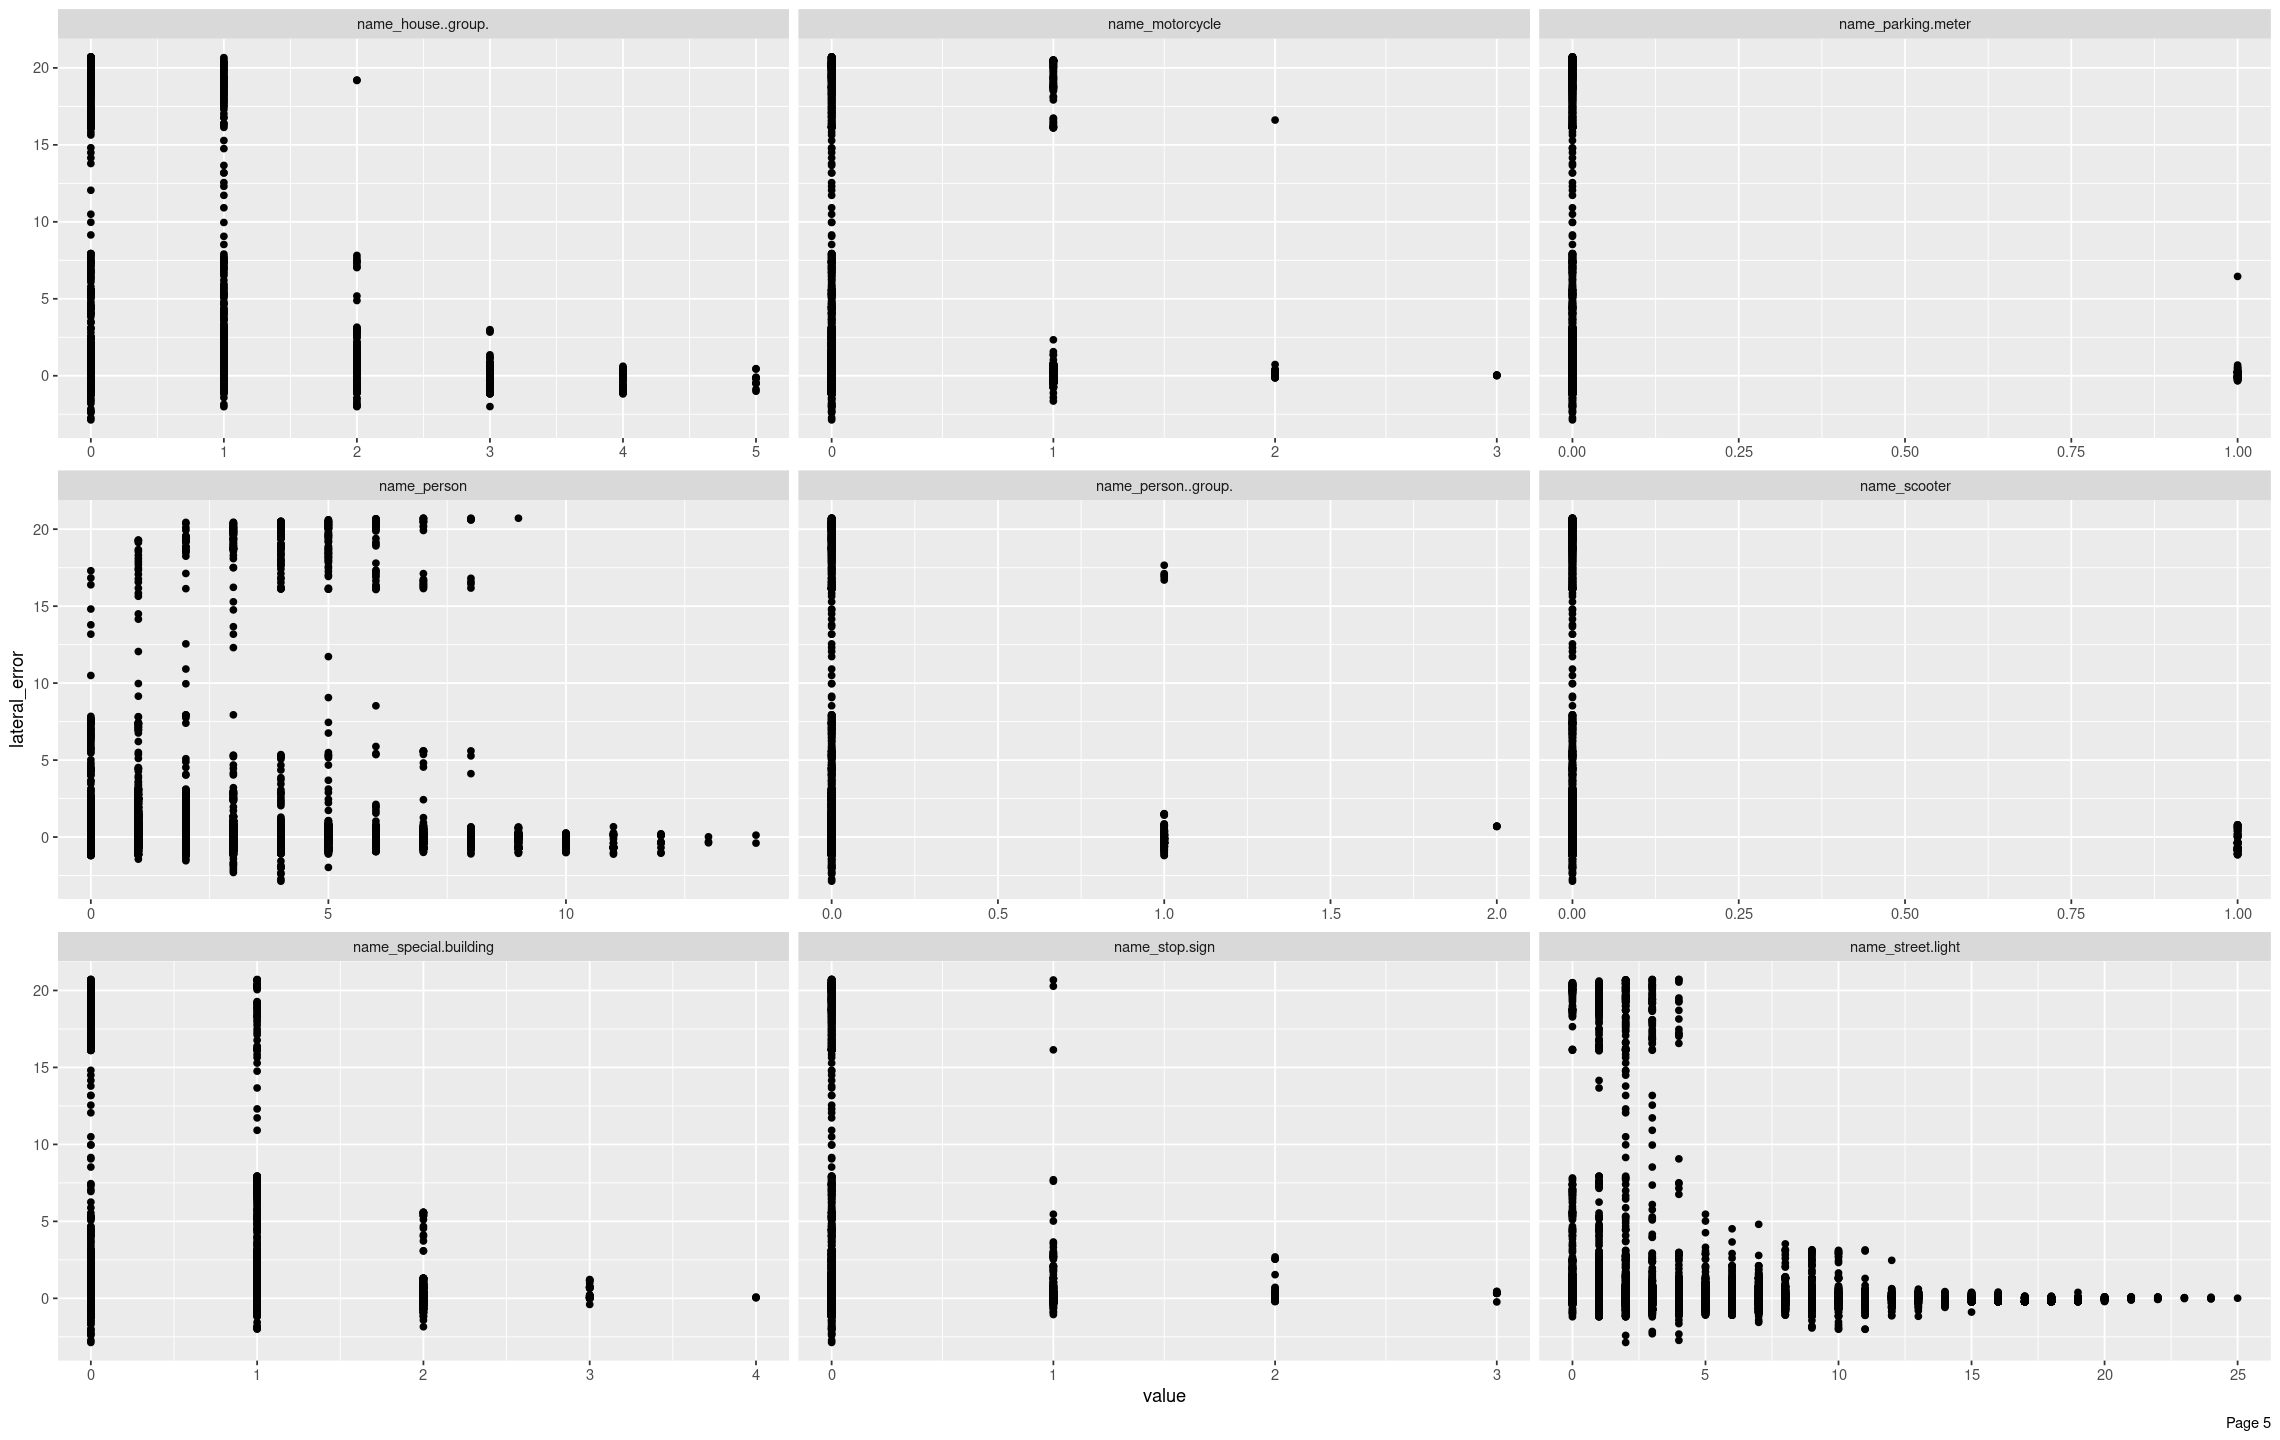

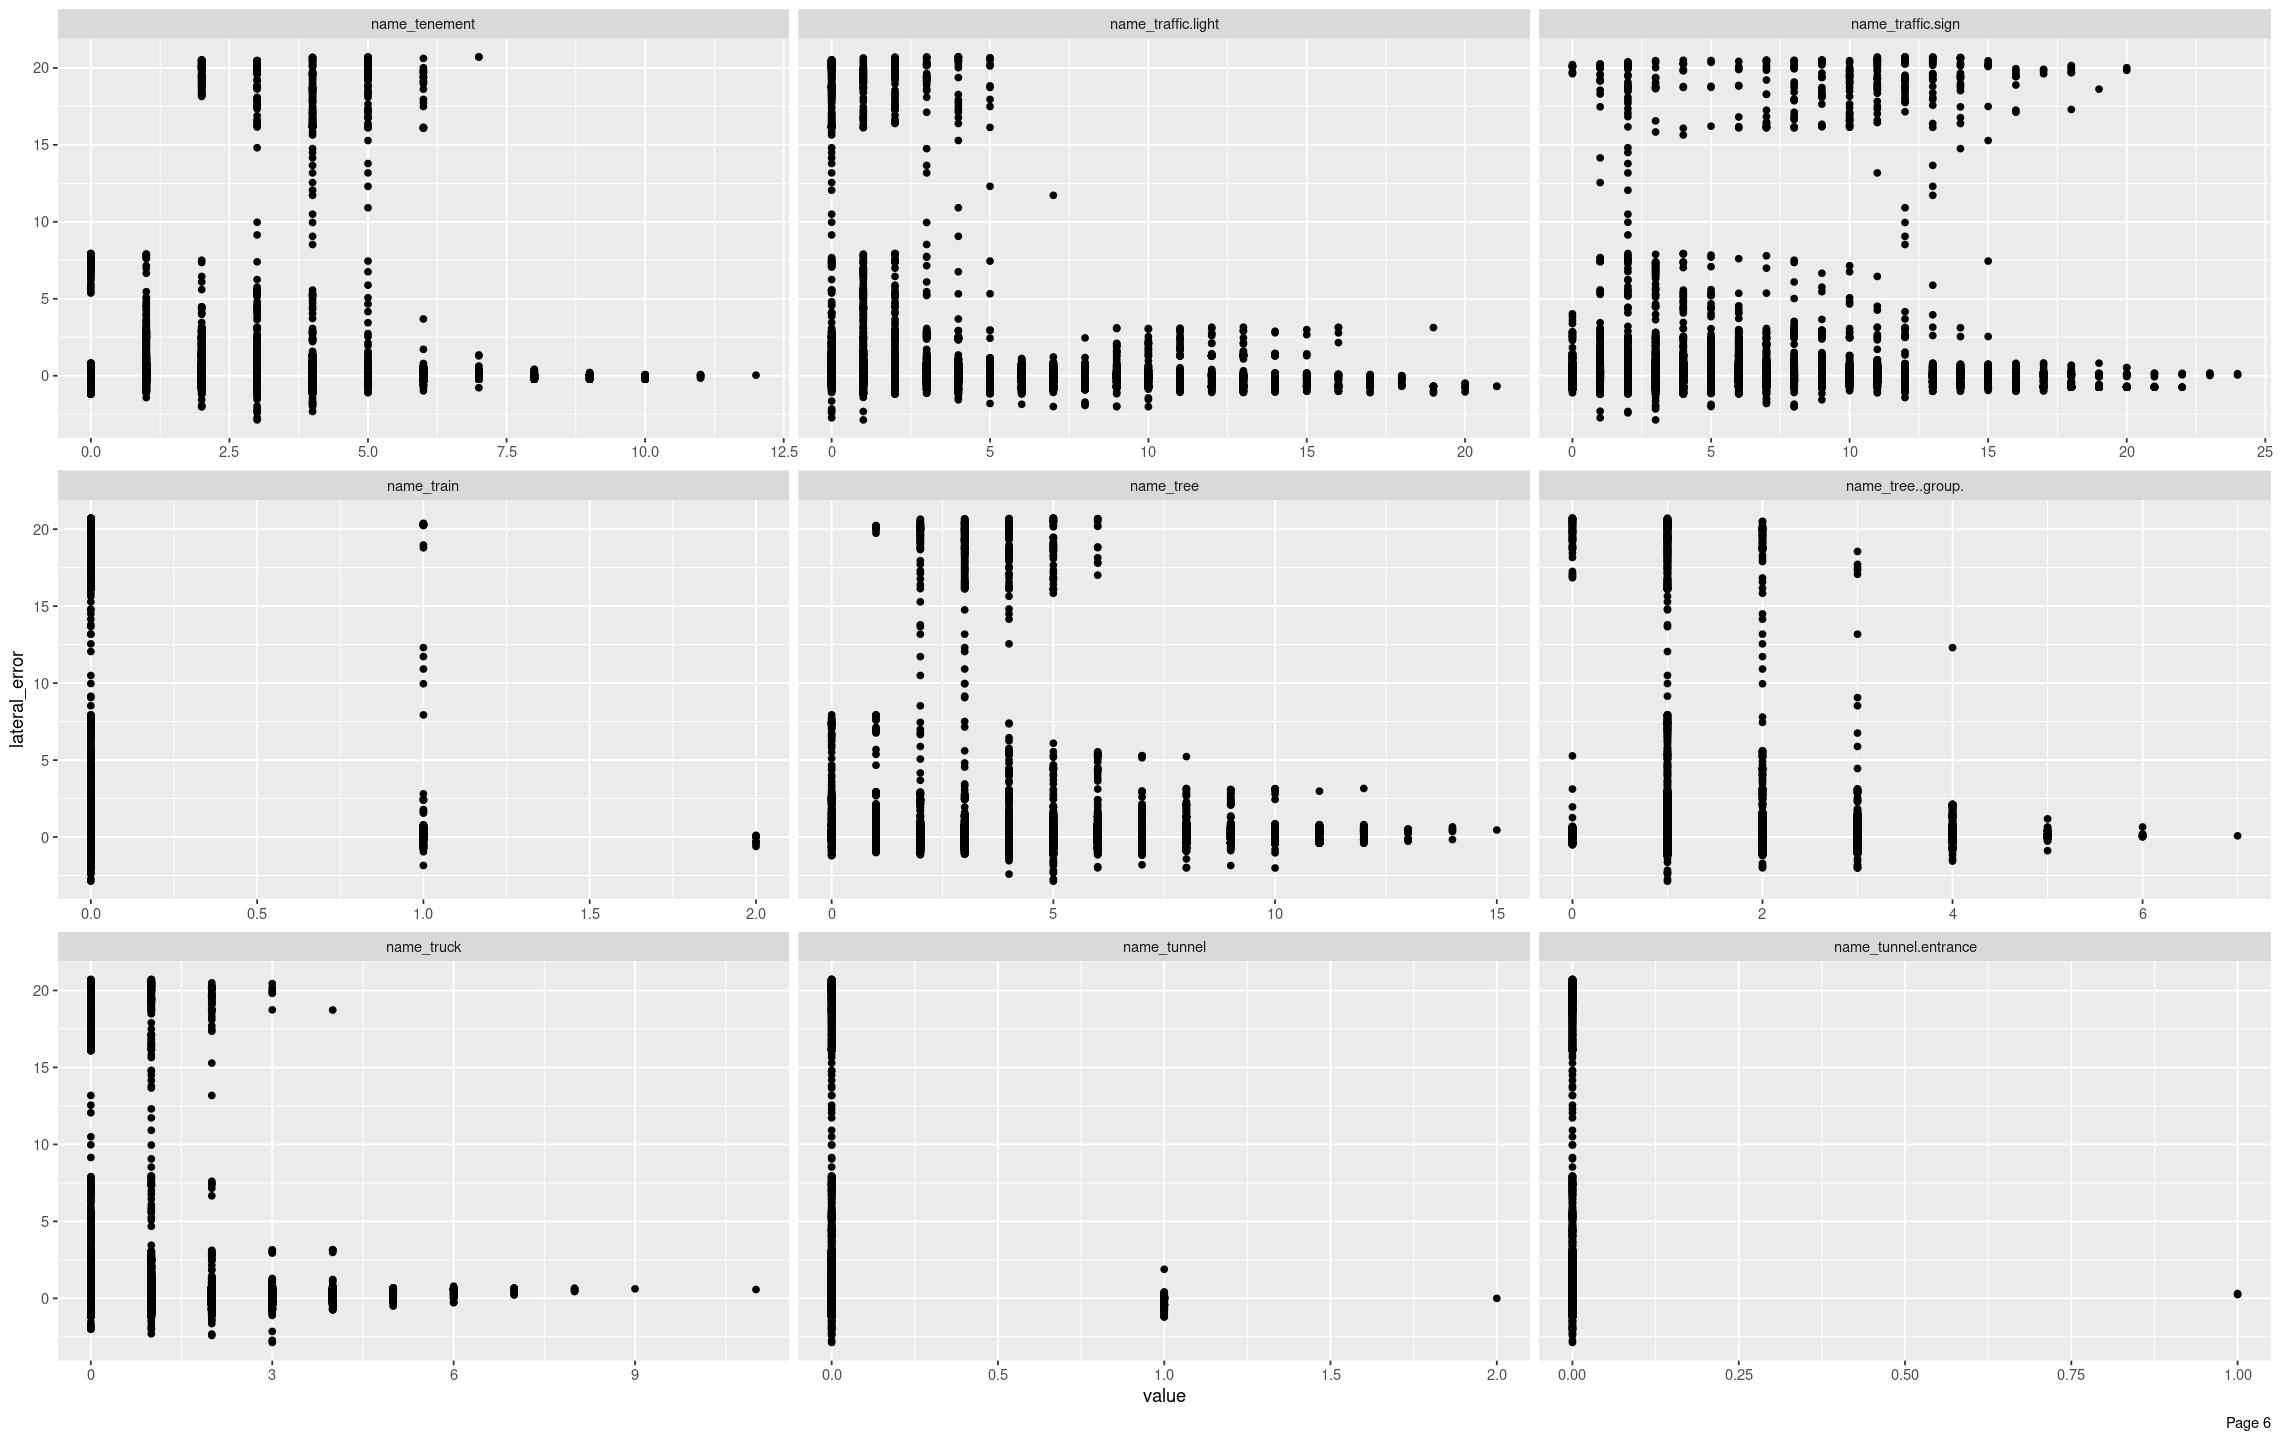

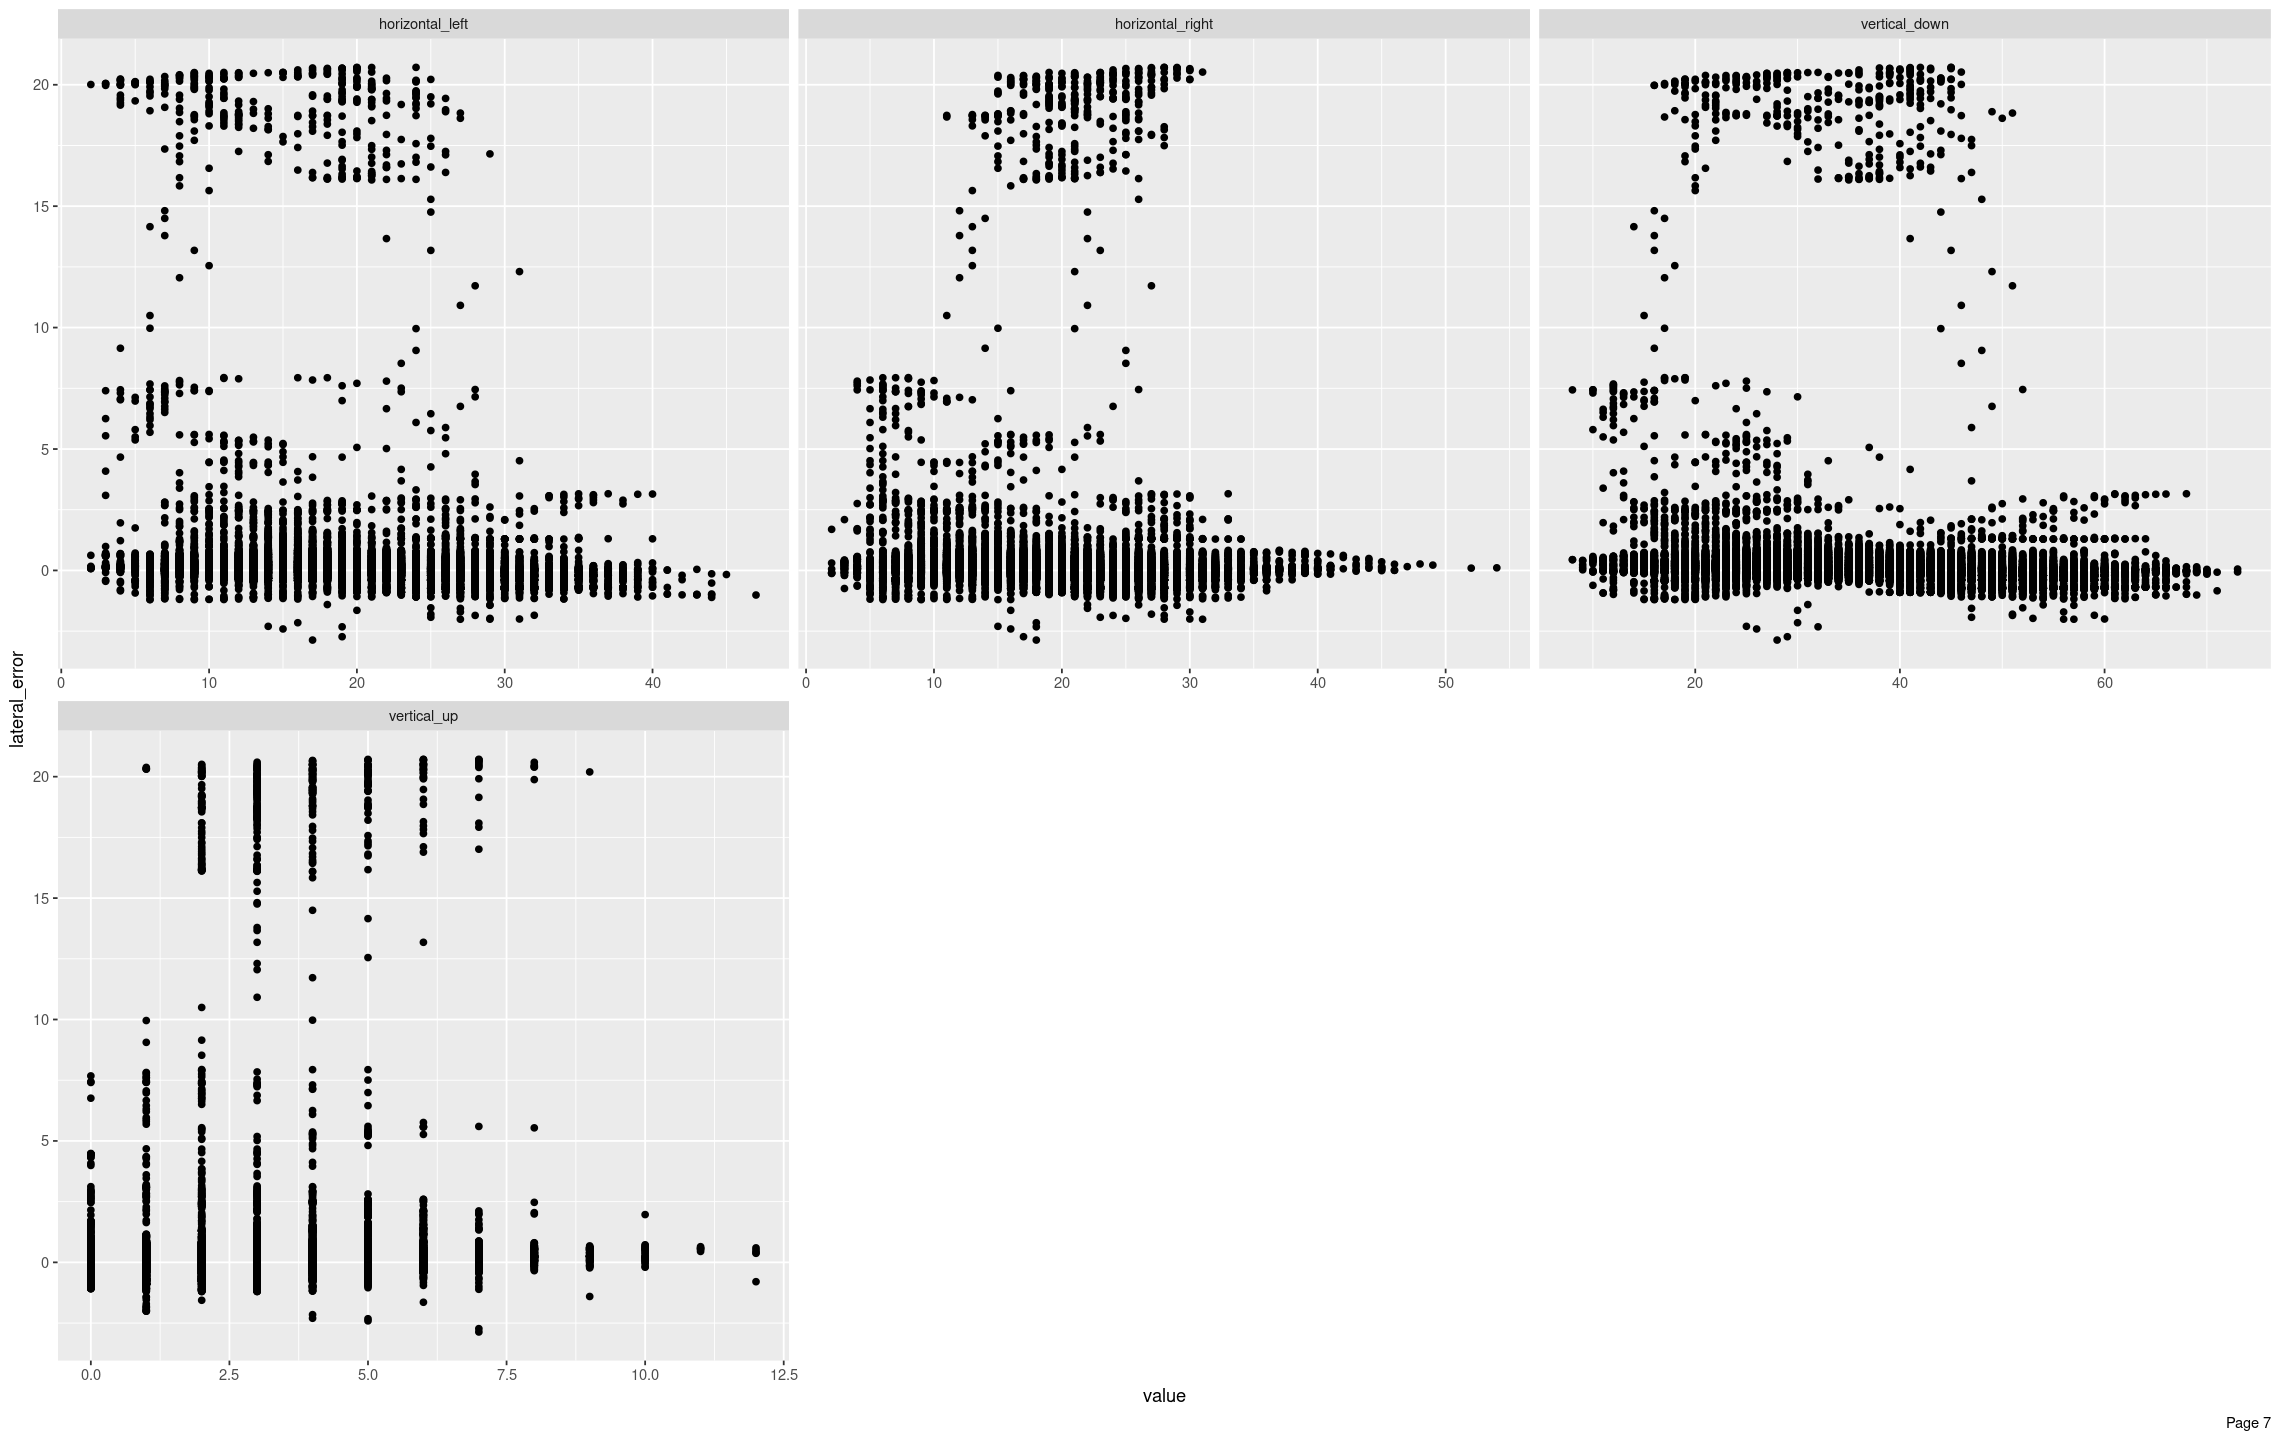

In [14]:
plot_scatterplot(na.omit(data), by="lateral_error")

## longitudinal_error

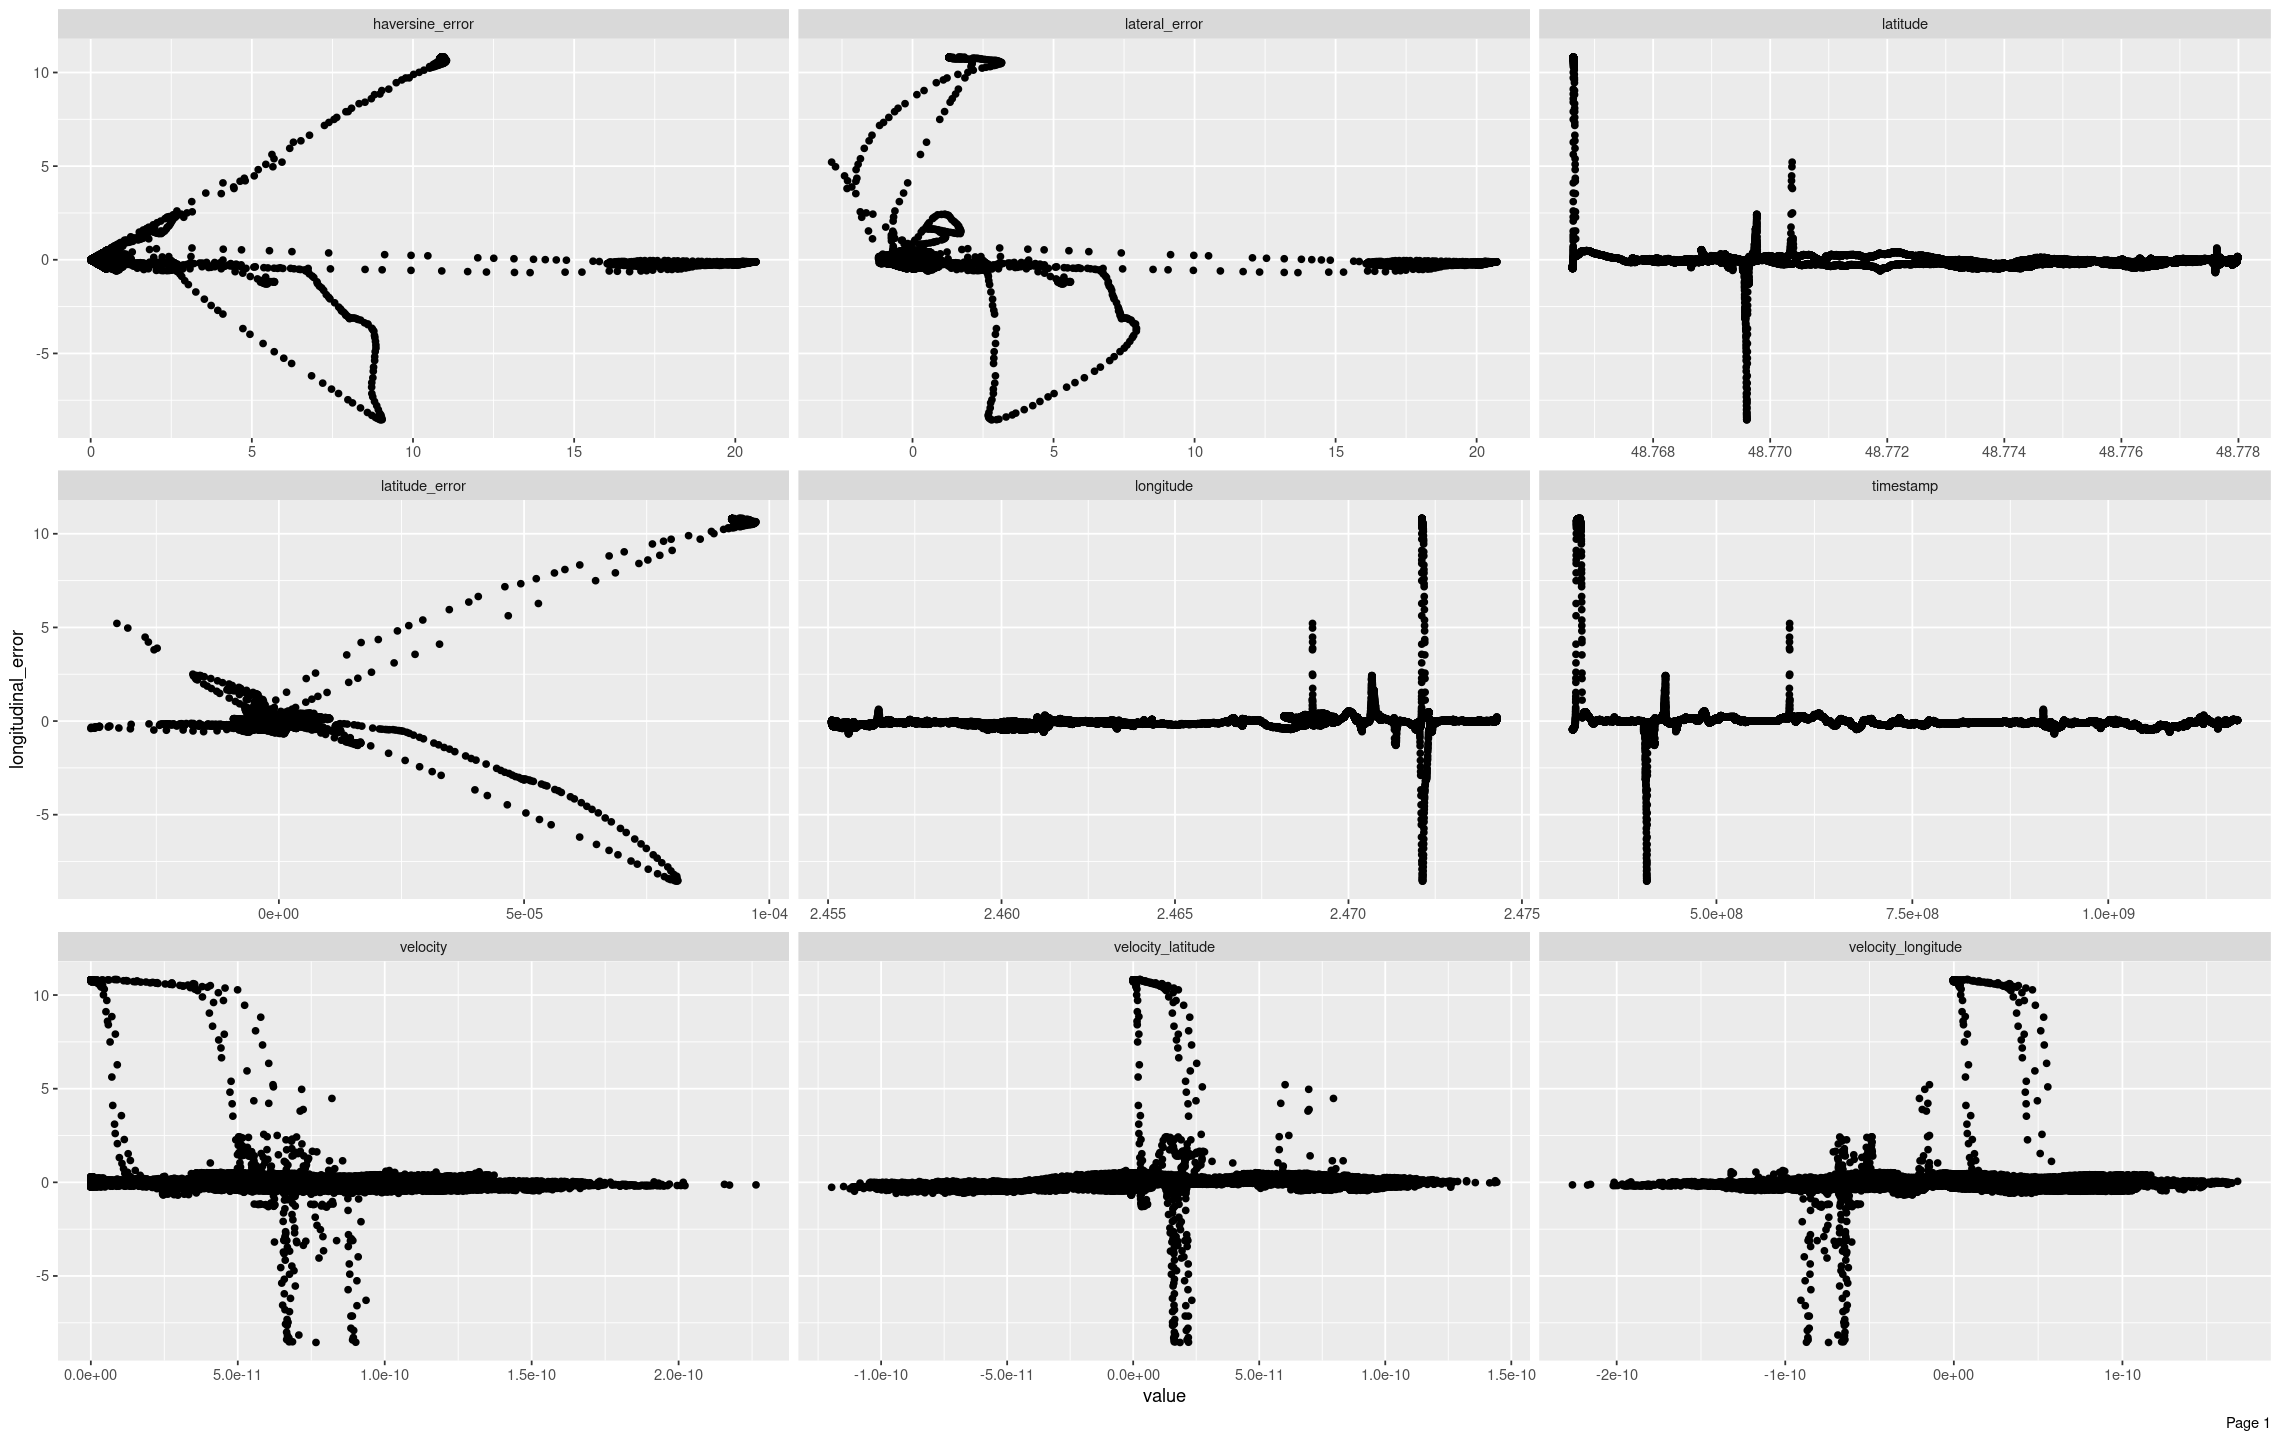

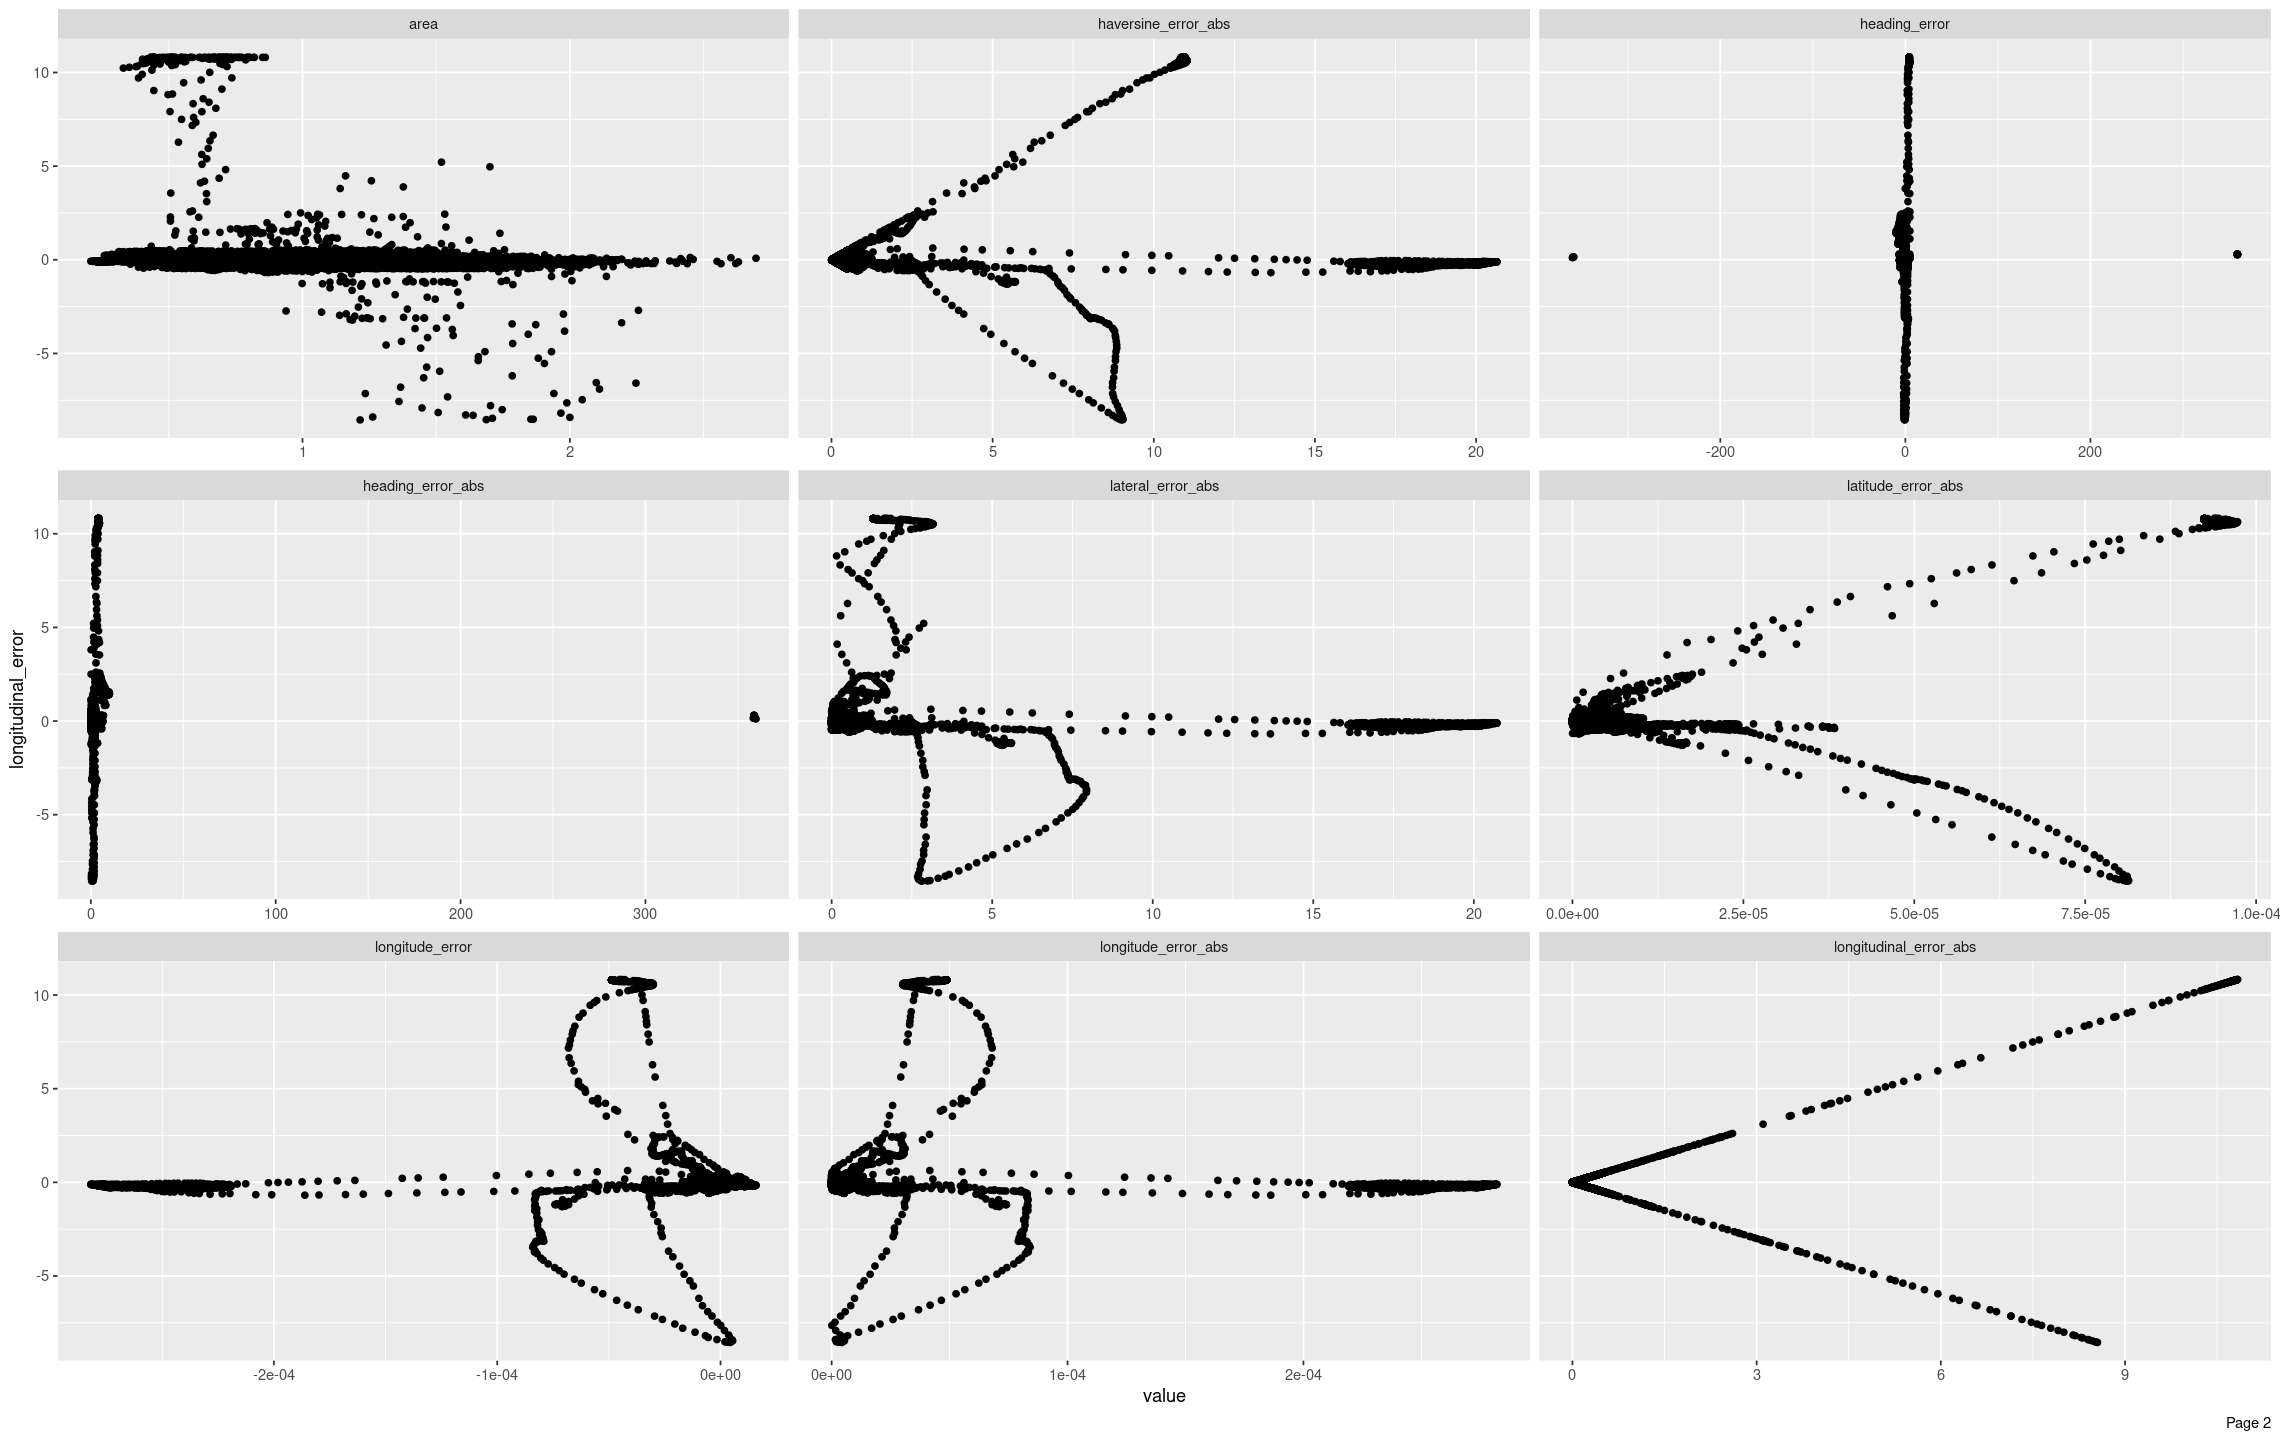

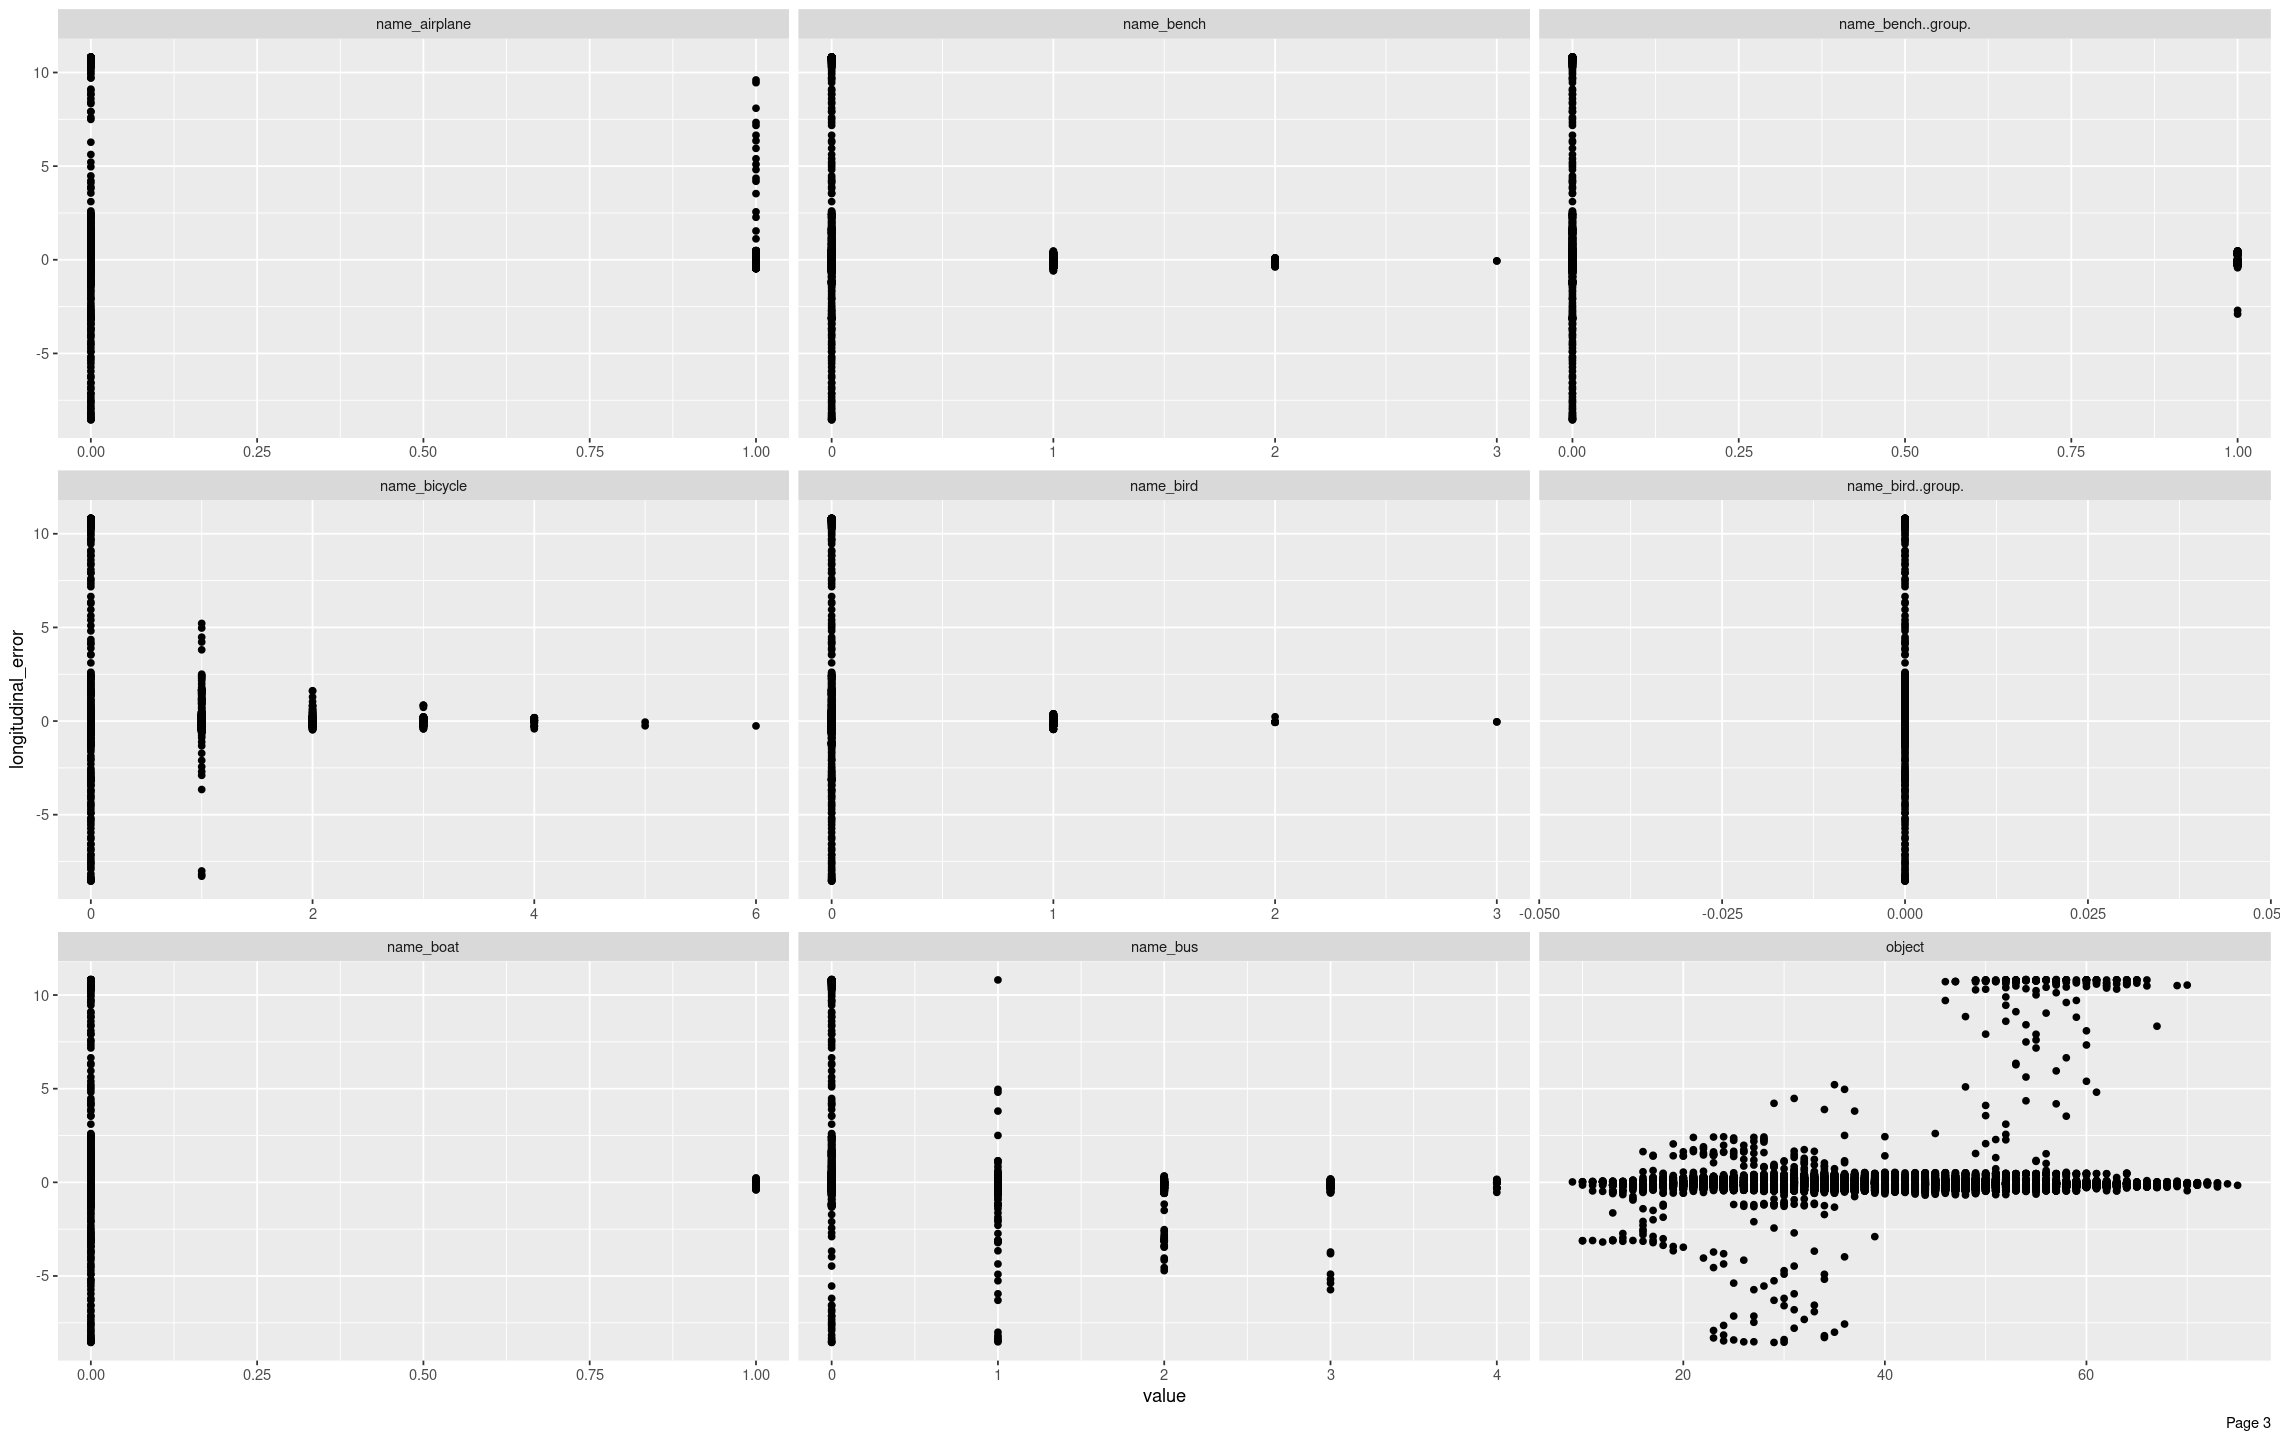

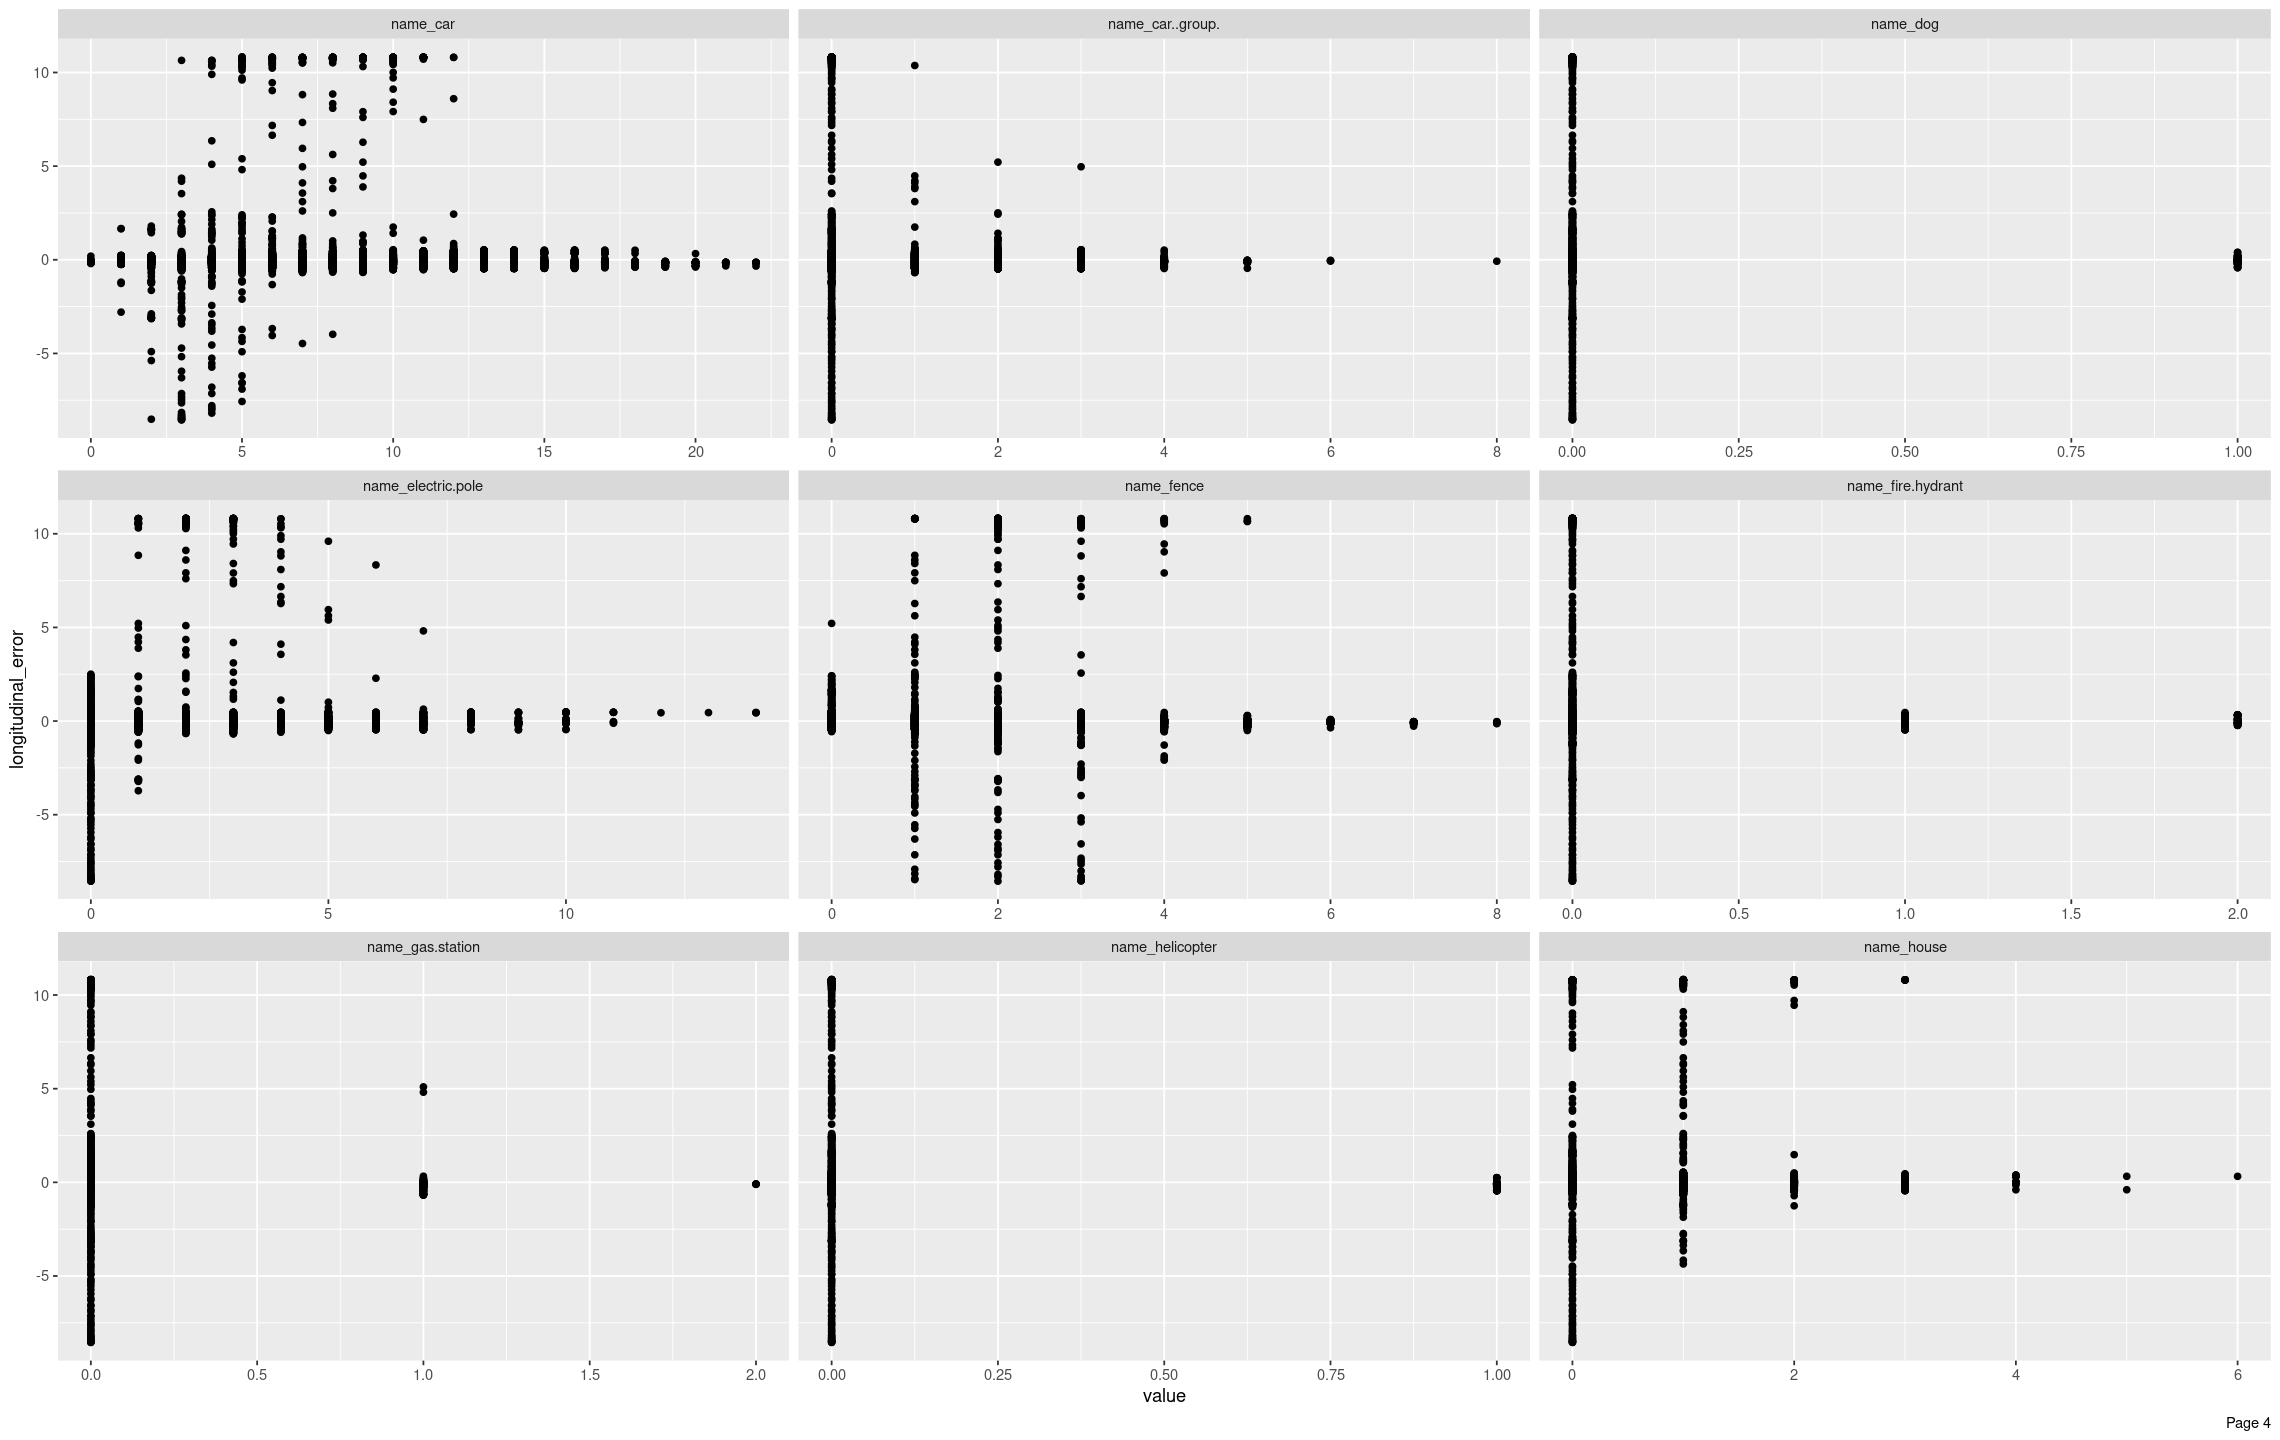

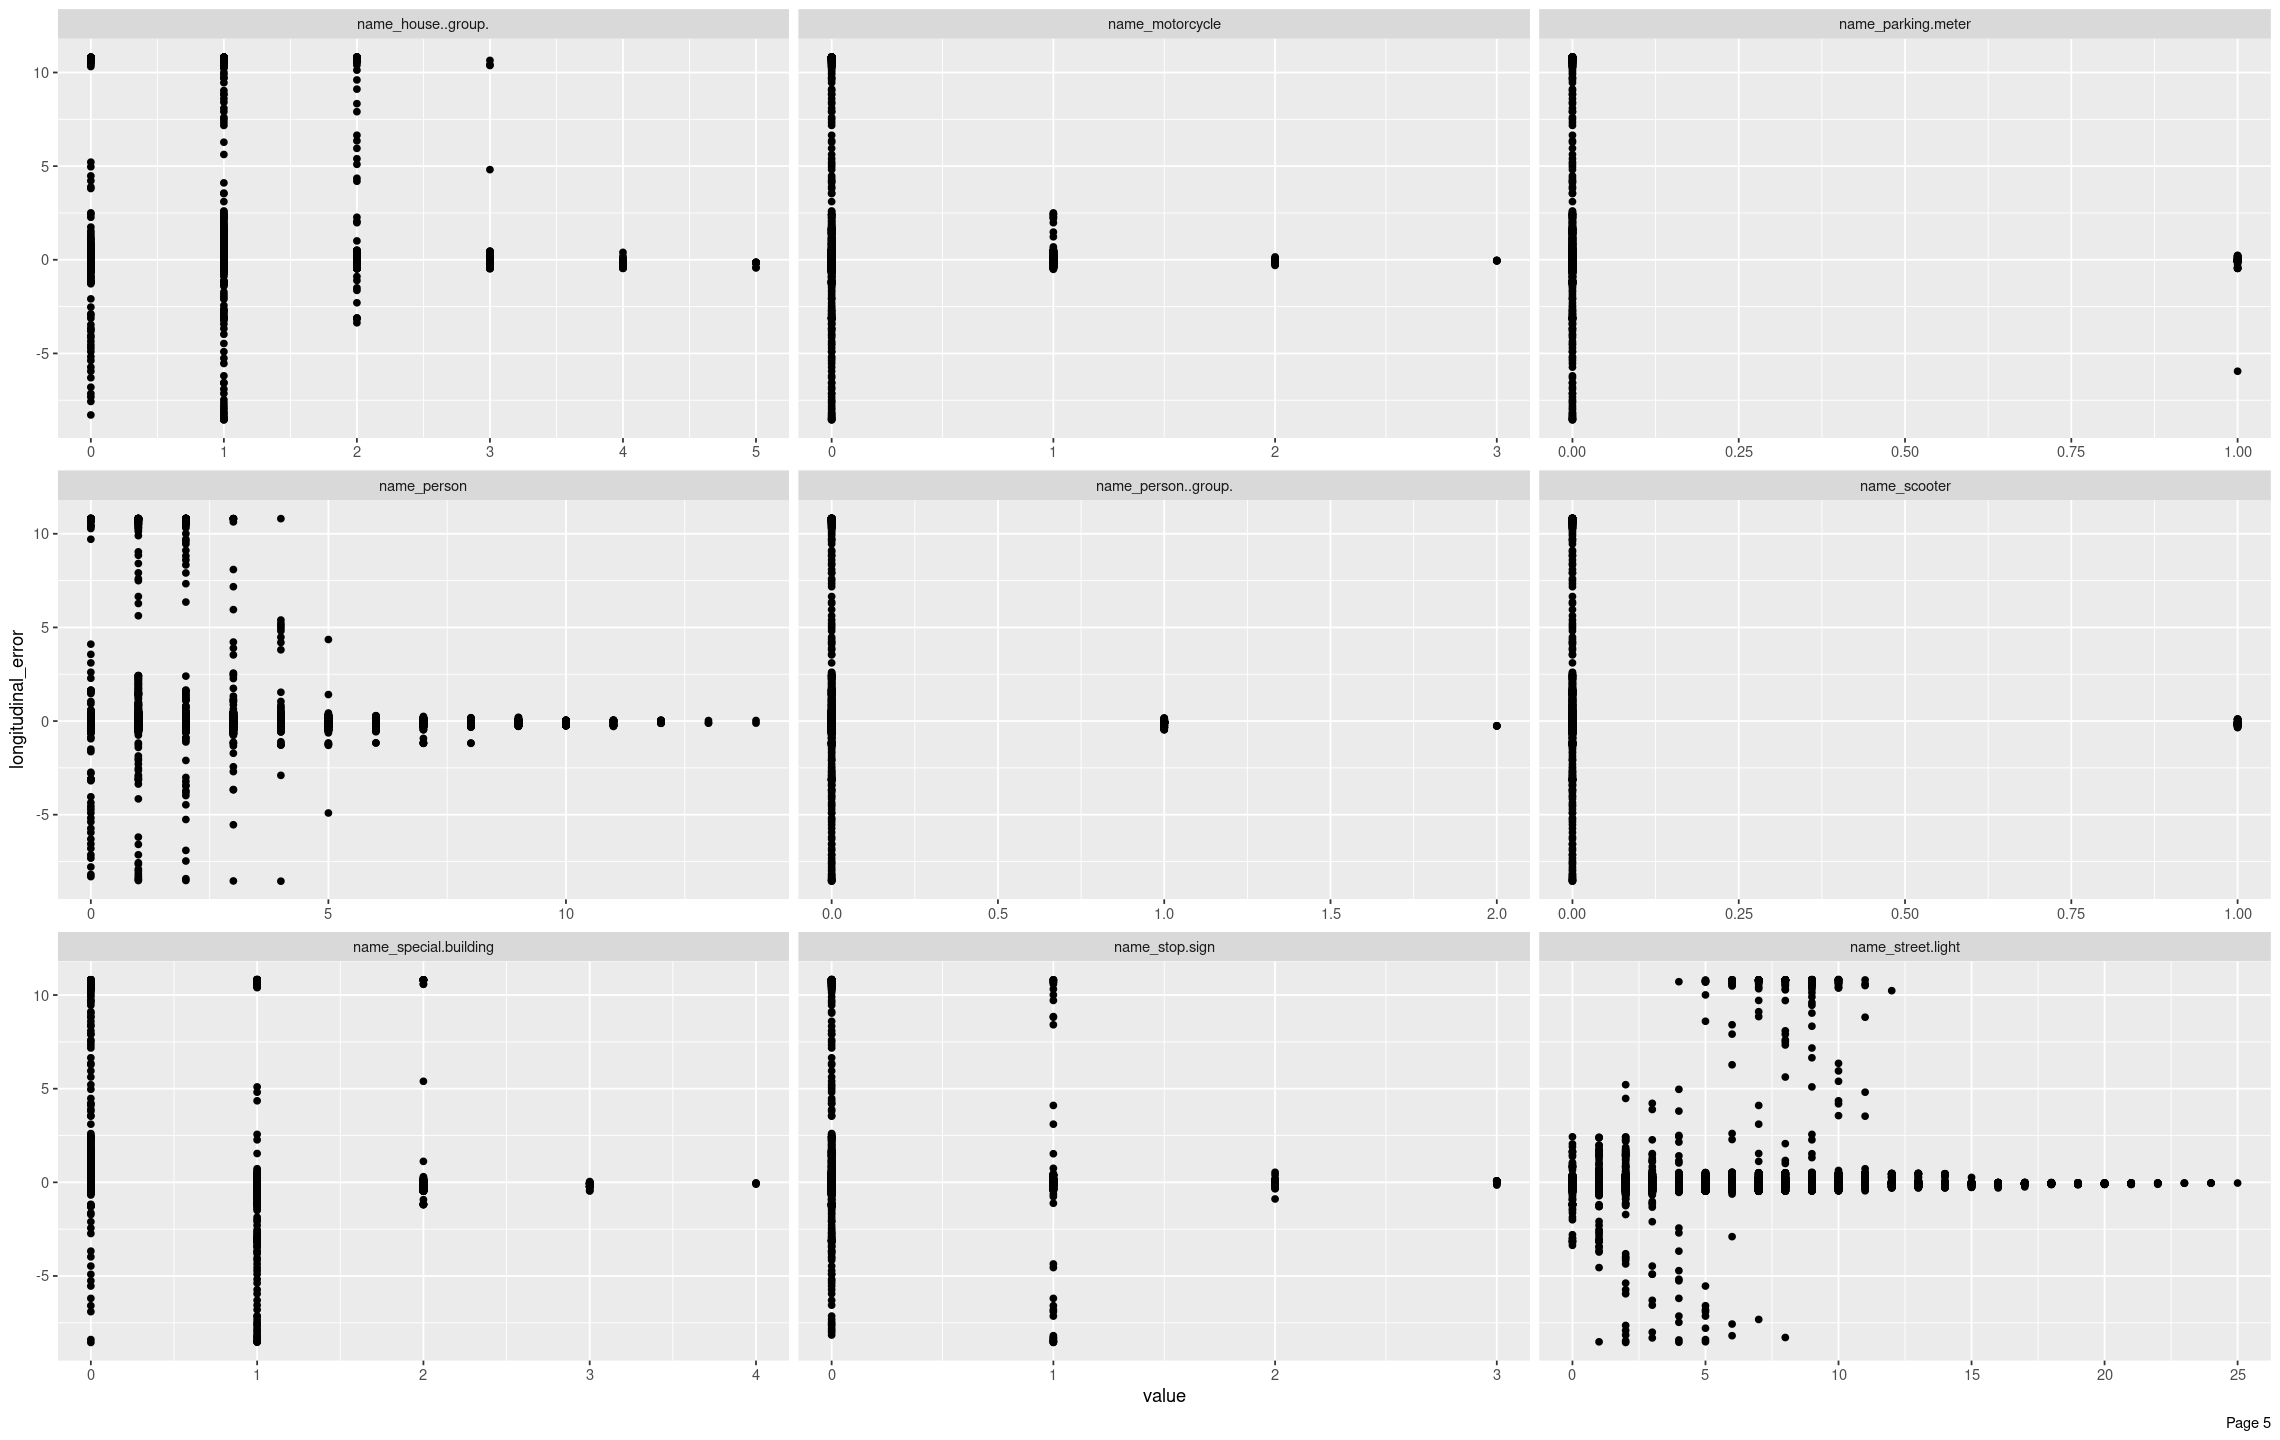

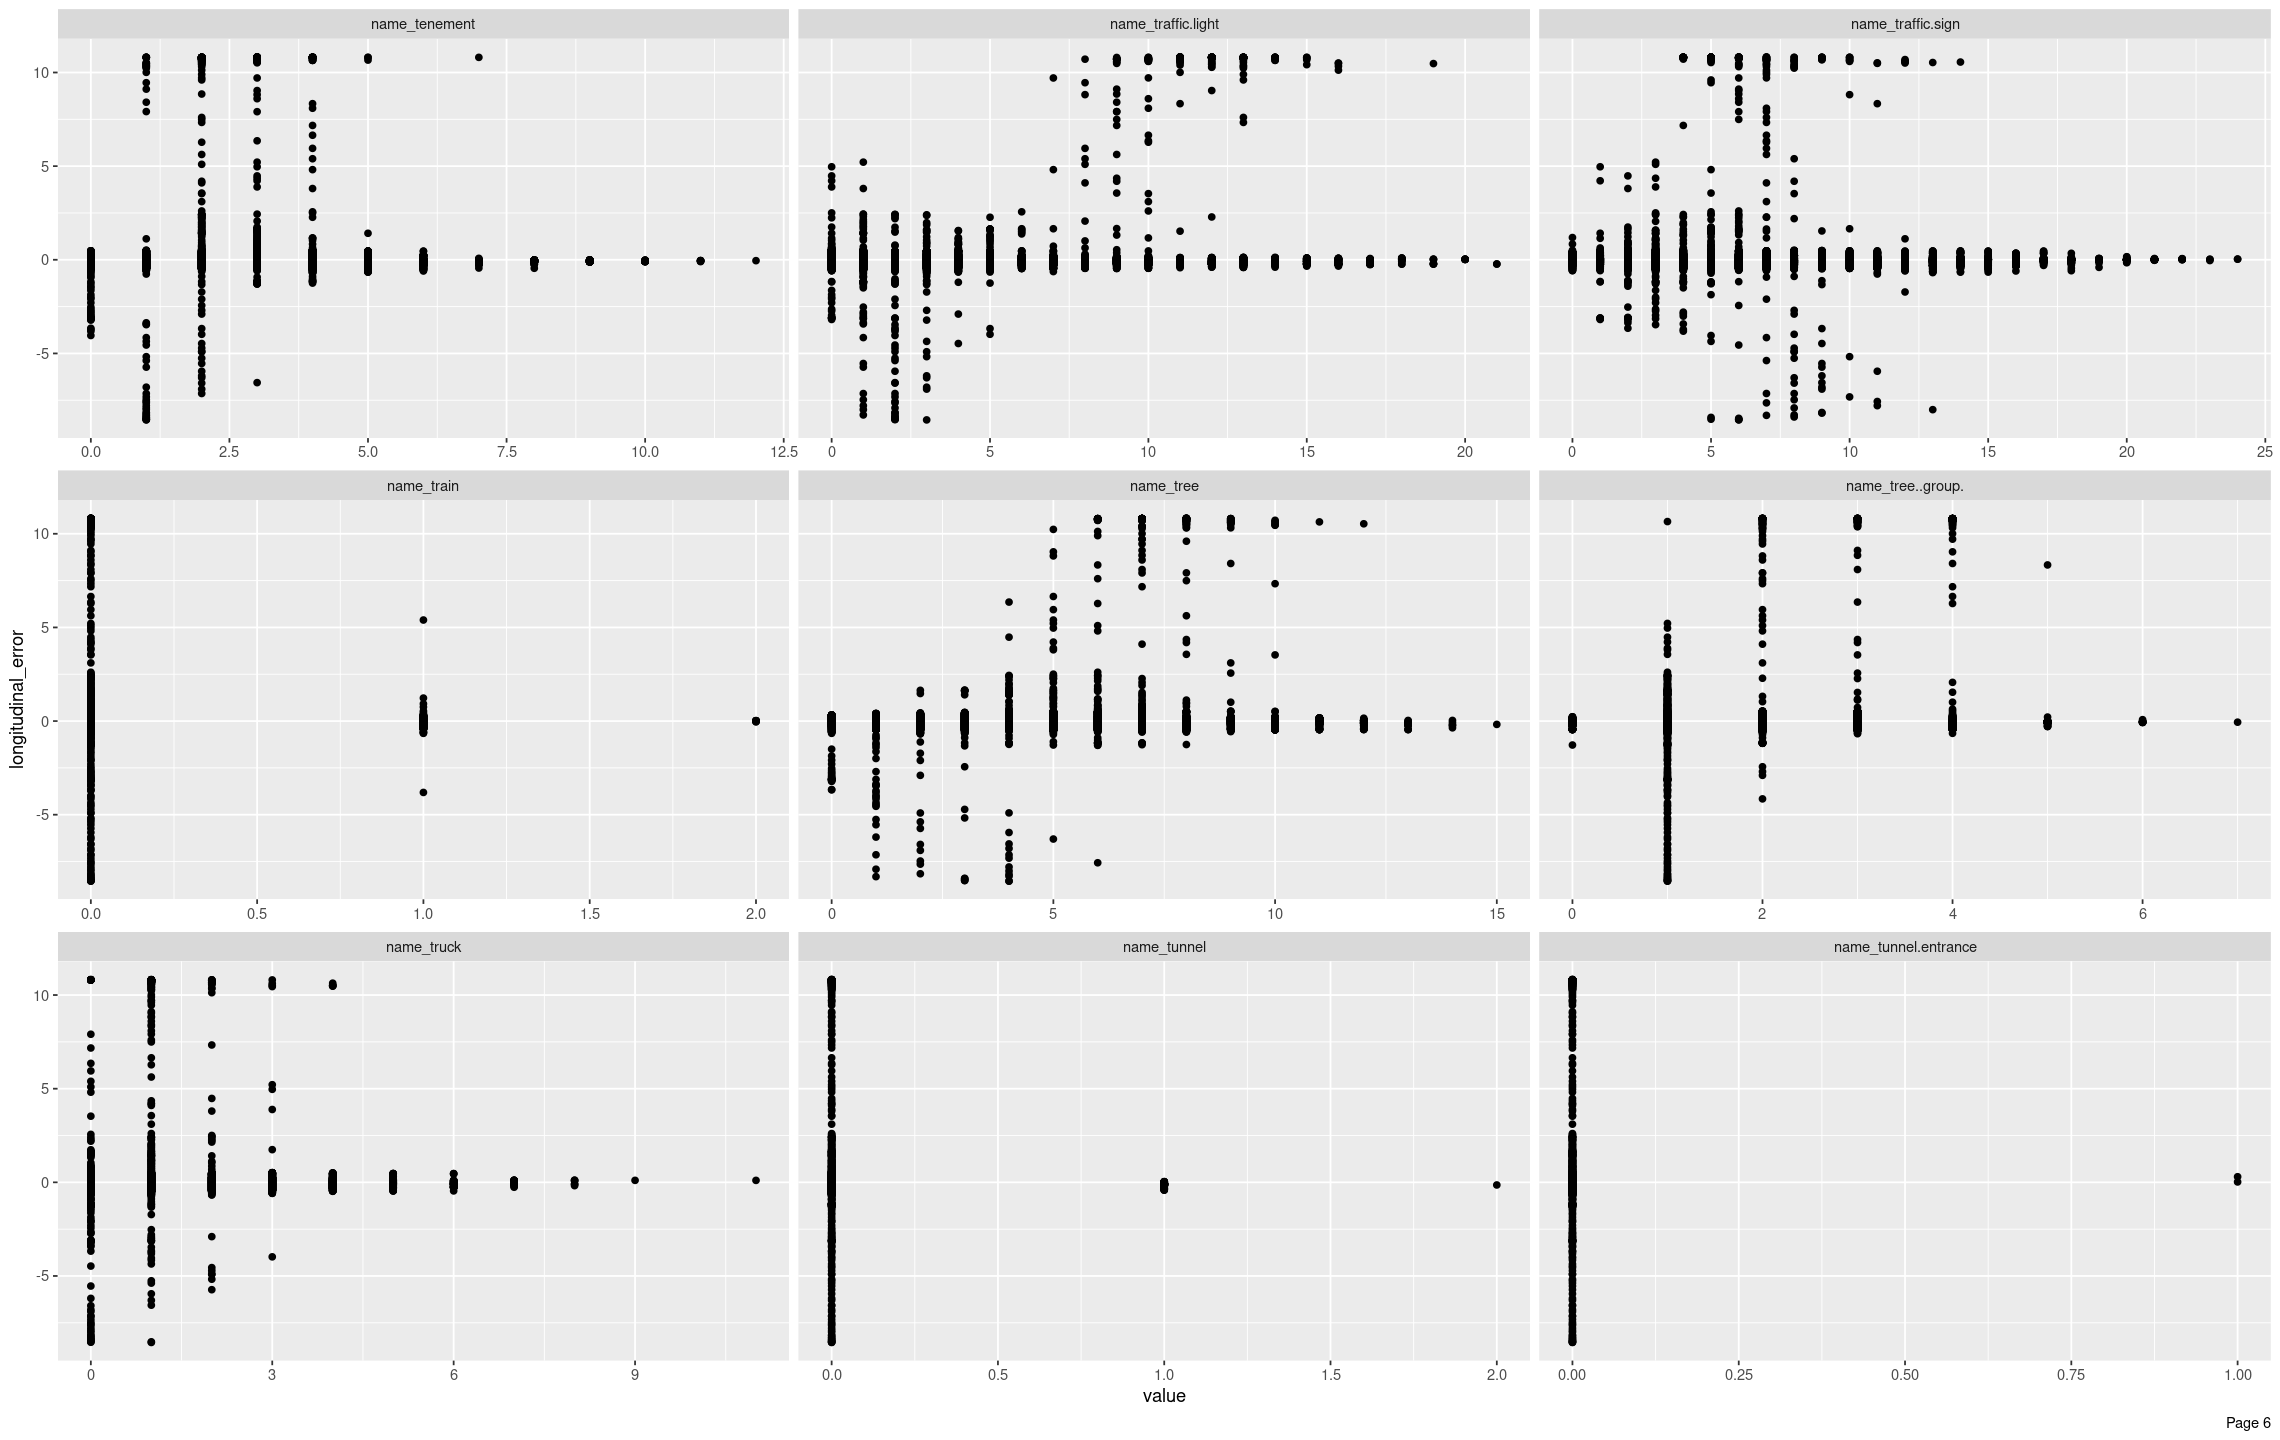

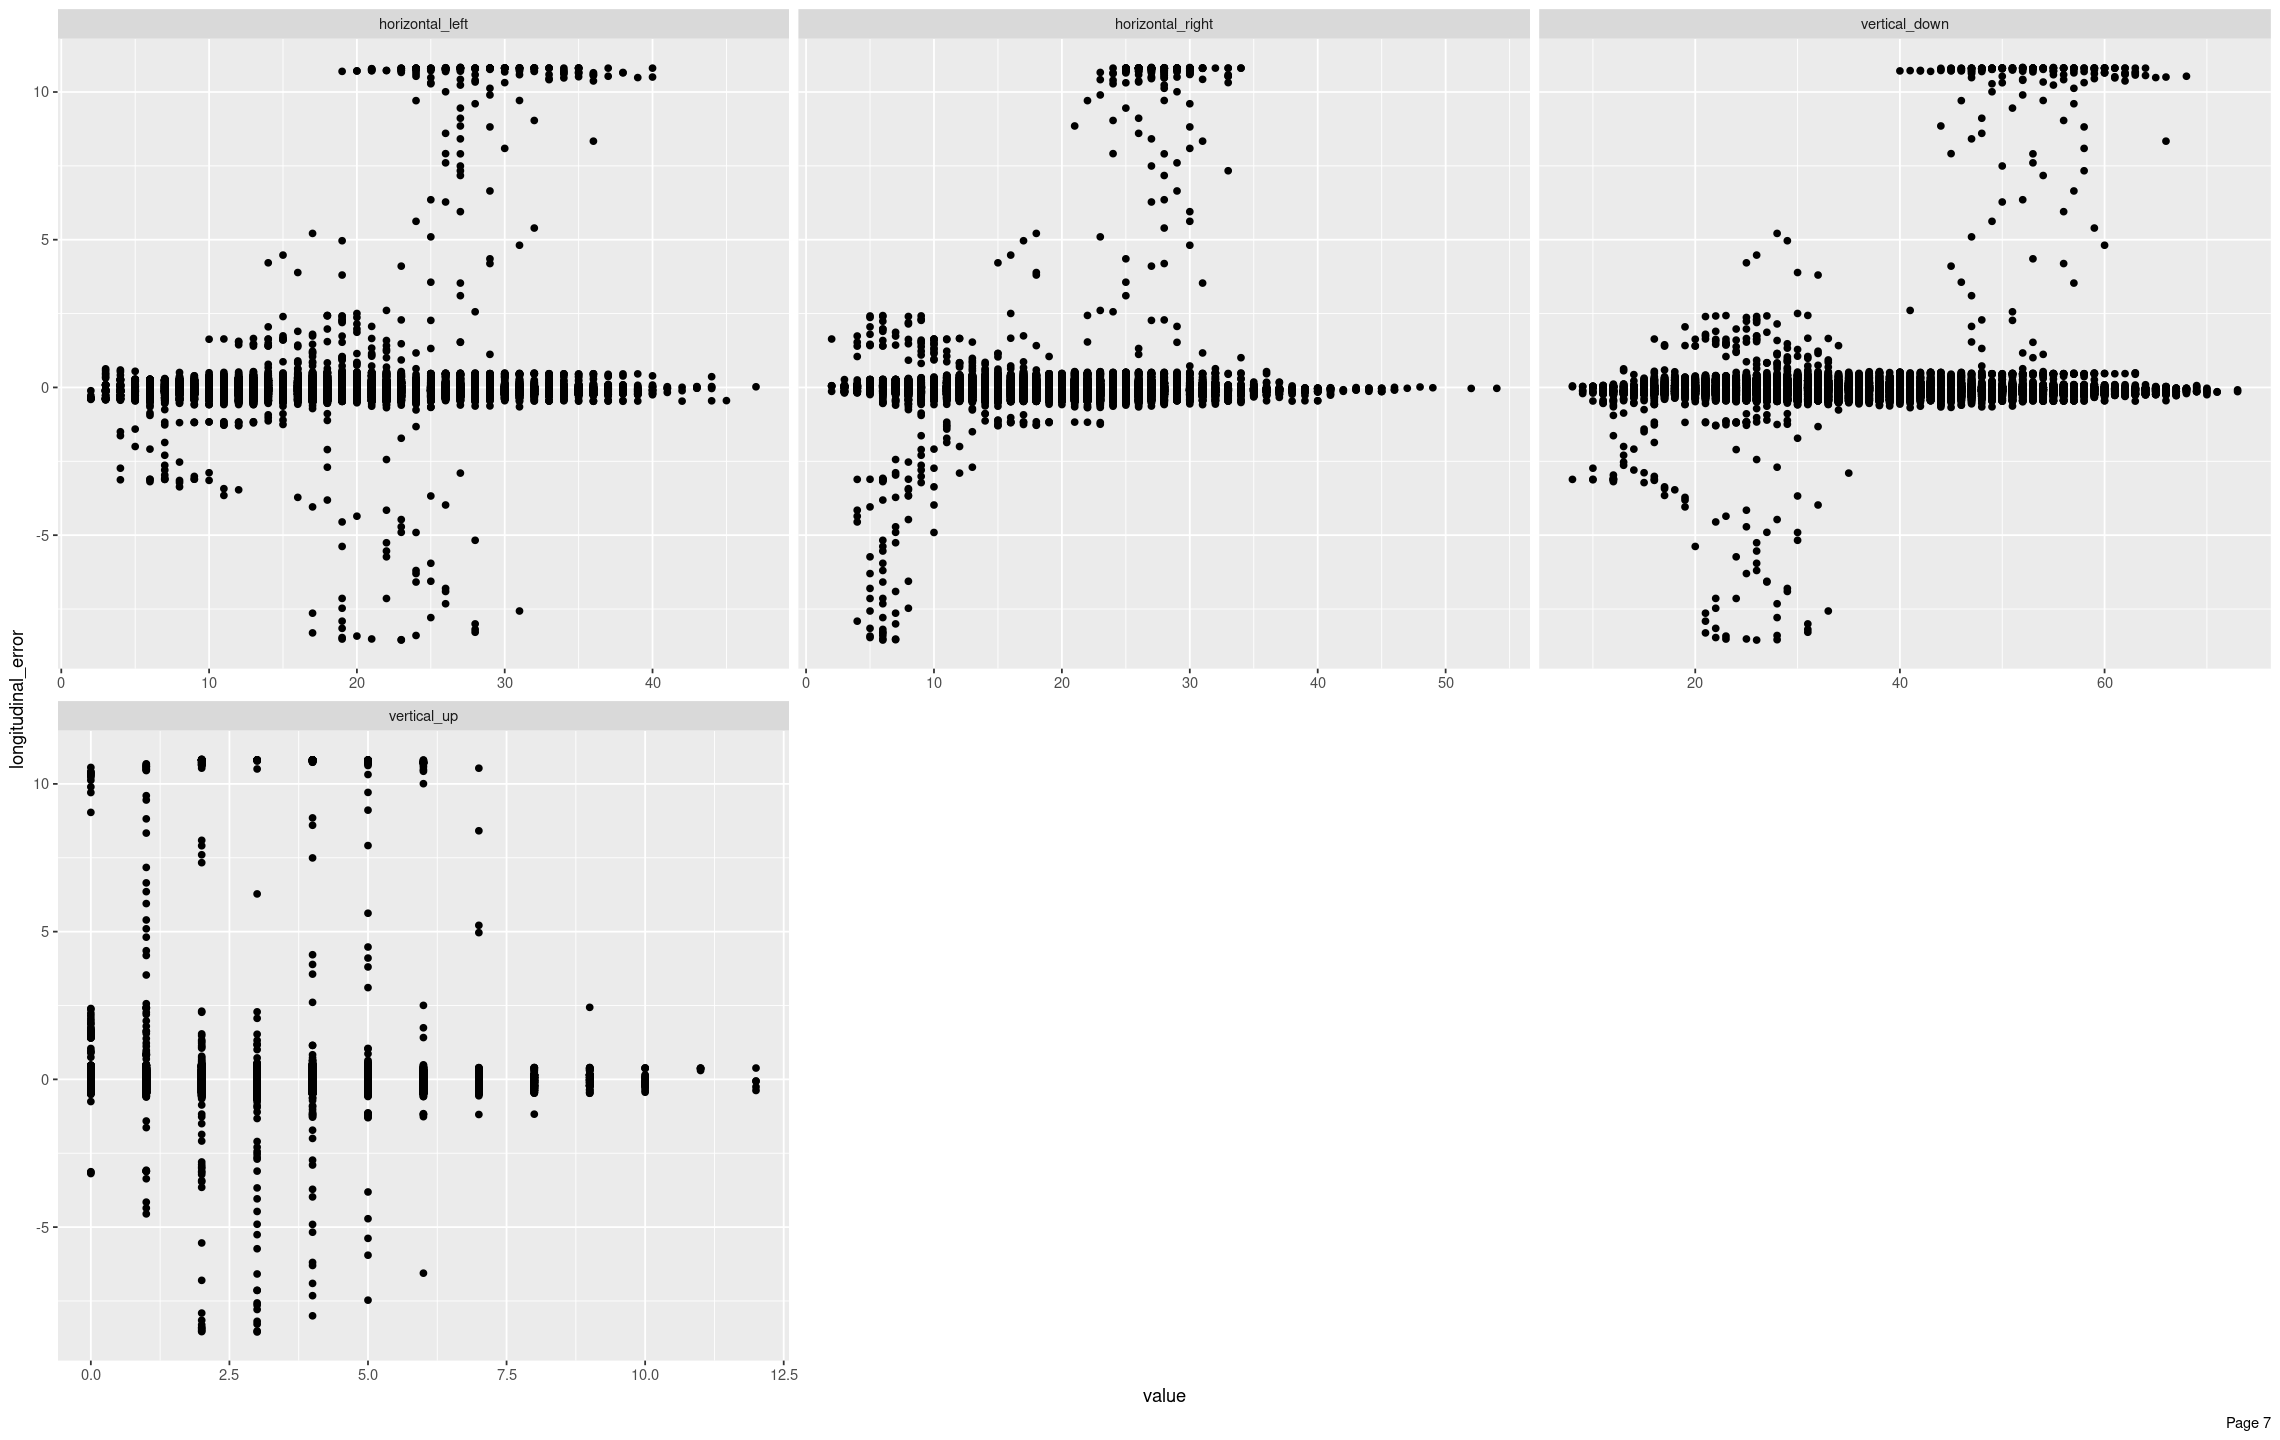

In [15]:
plot_scatterplot(na.omit(data), by="longitudinal_error")

# Scatter plot 3D

## lateral_error

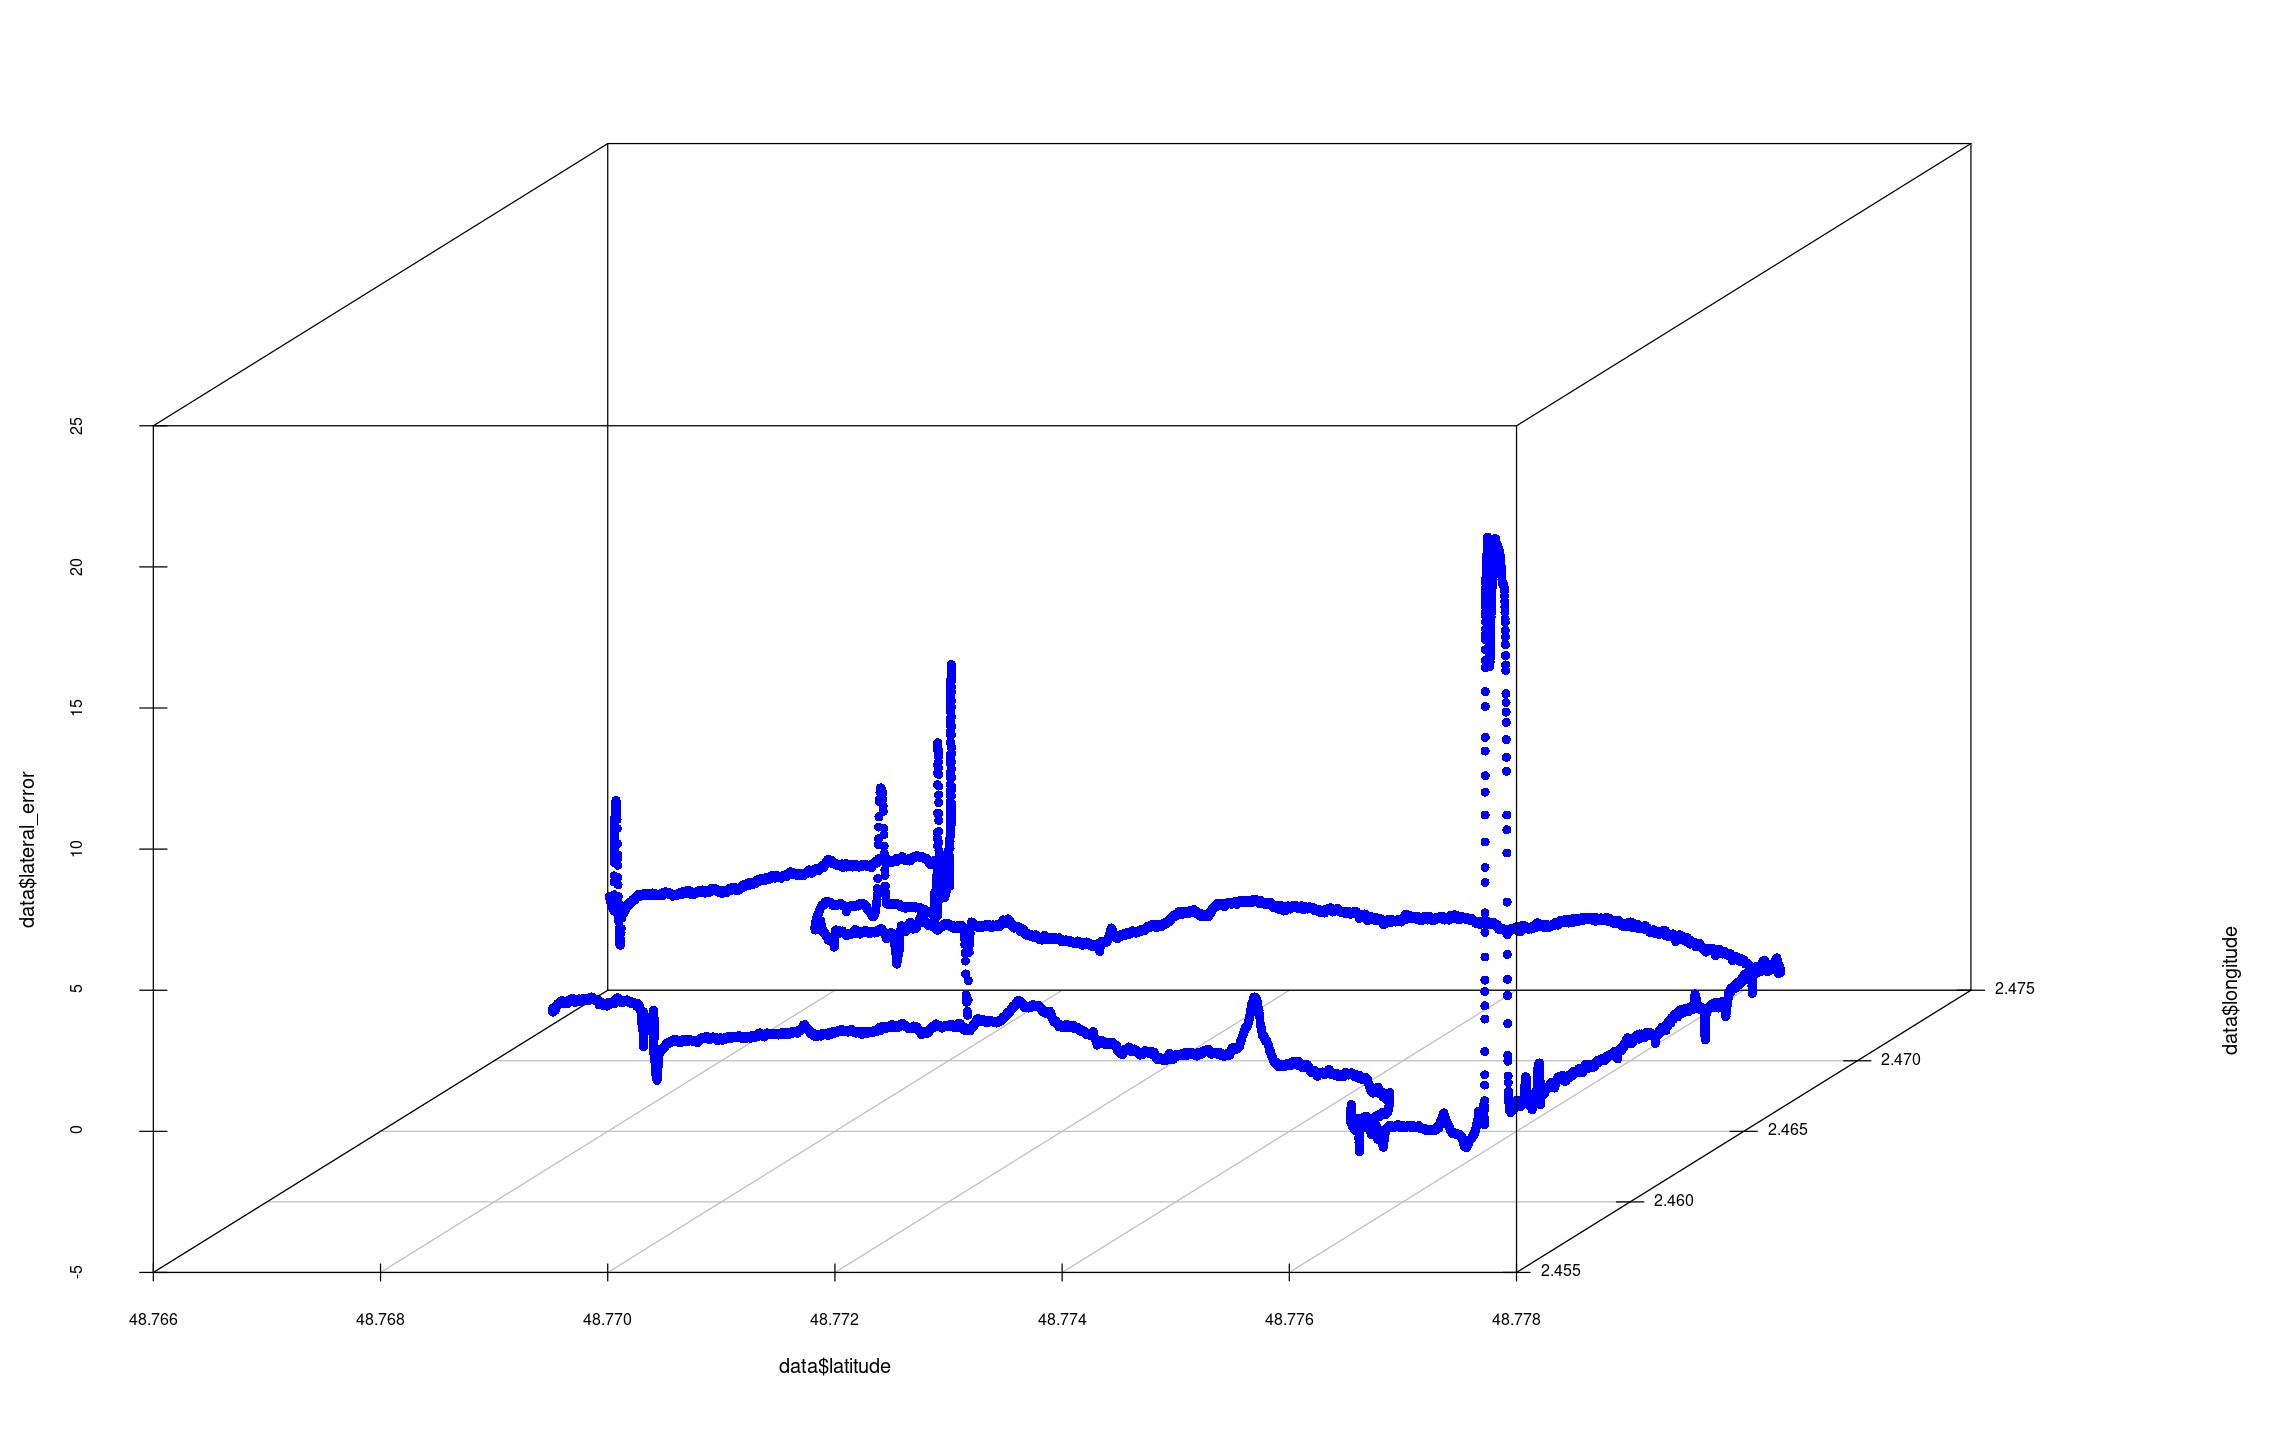

In [16]:
scatterplot3d(x = data$latitude, 
              y = data$longitude, 
              z = data$lateral_error, 
              angle = 45, 
              type = "p",
              pch = 16, 
              color="blue")

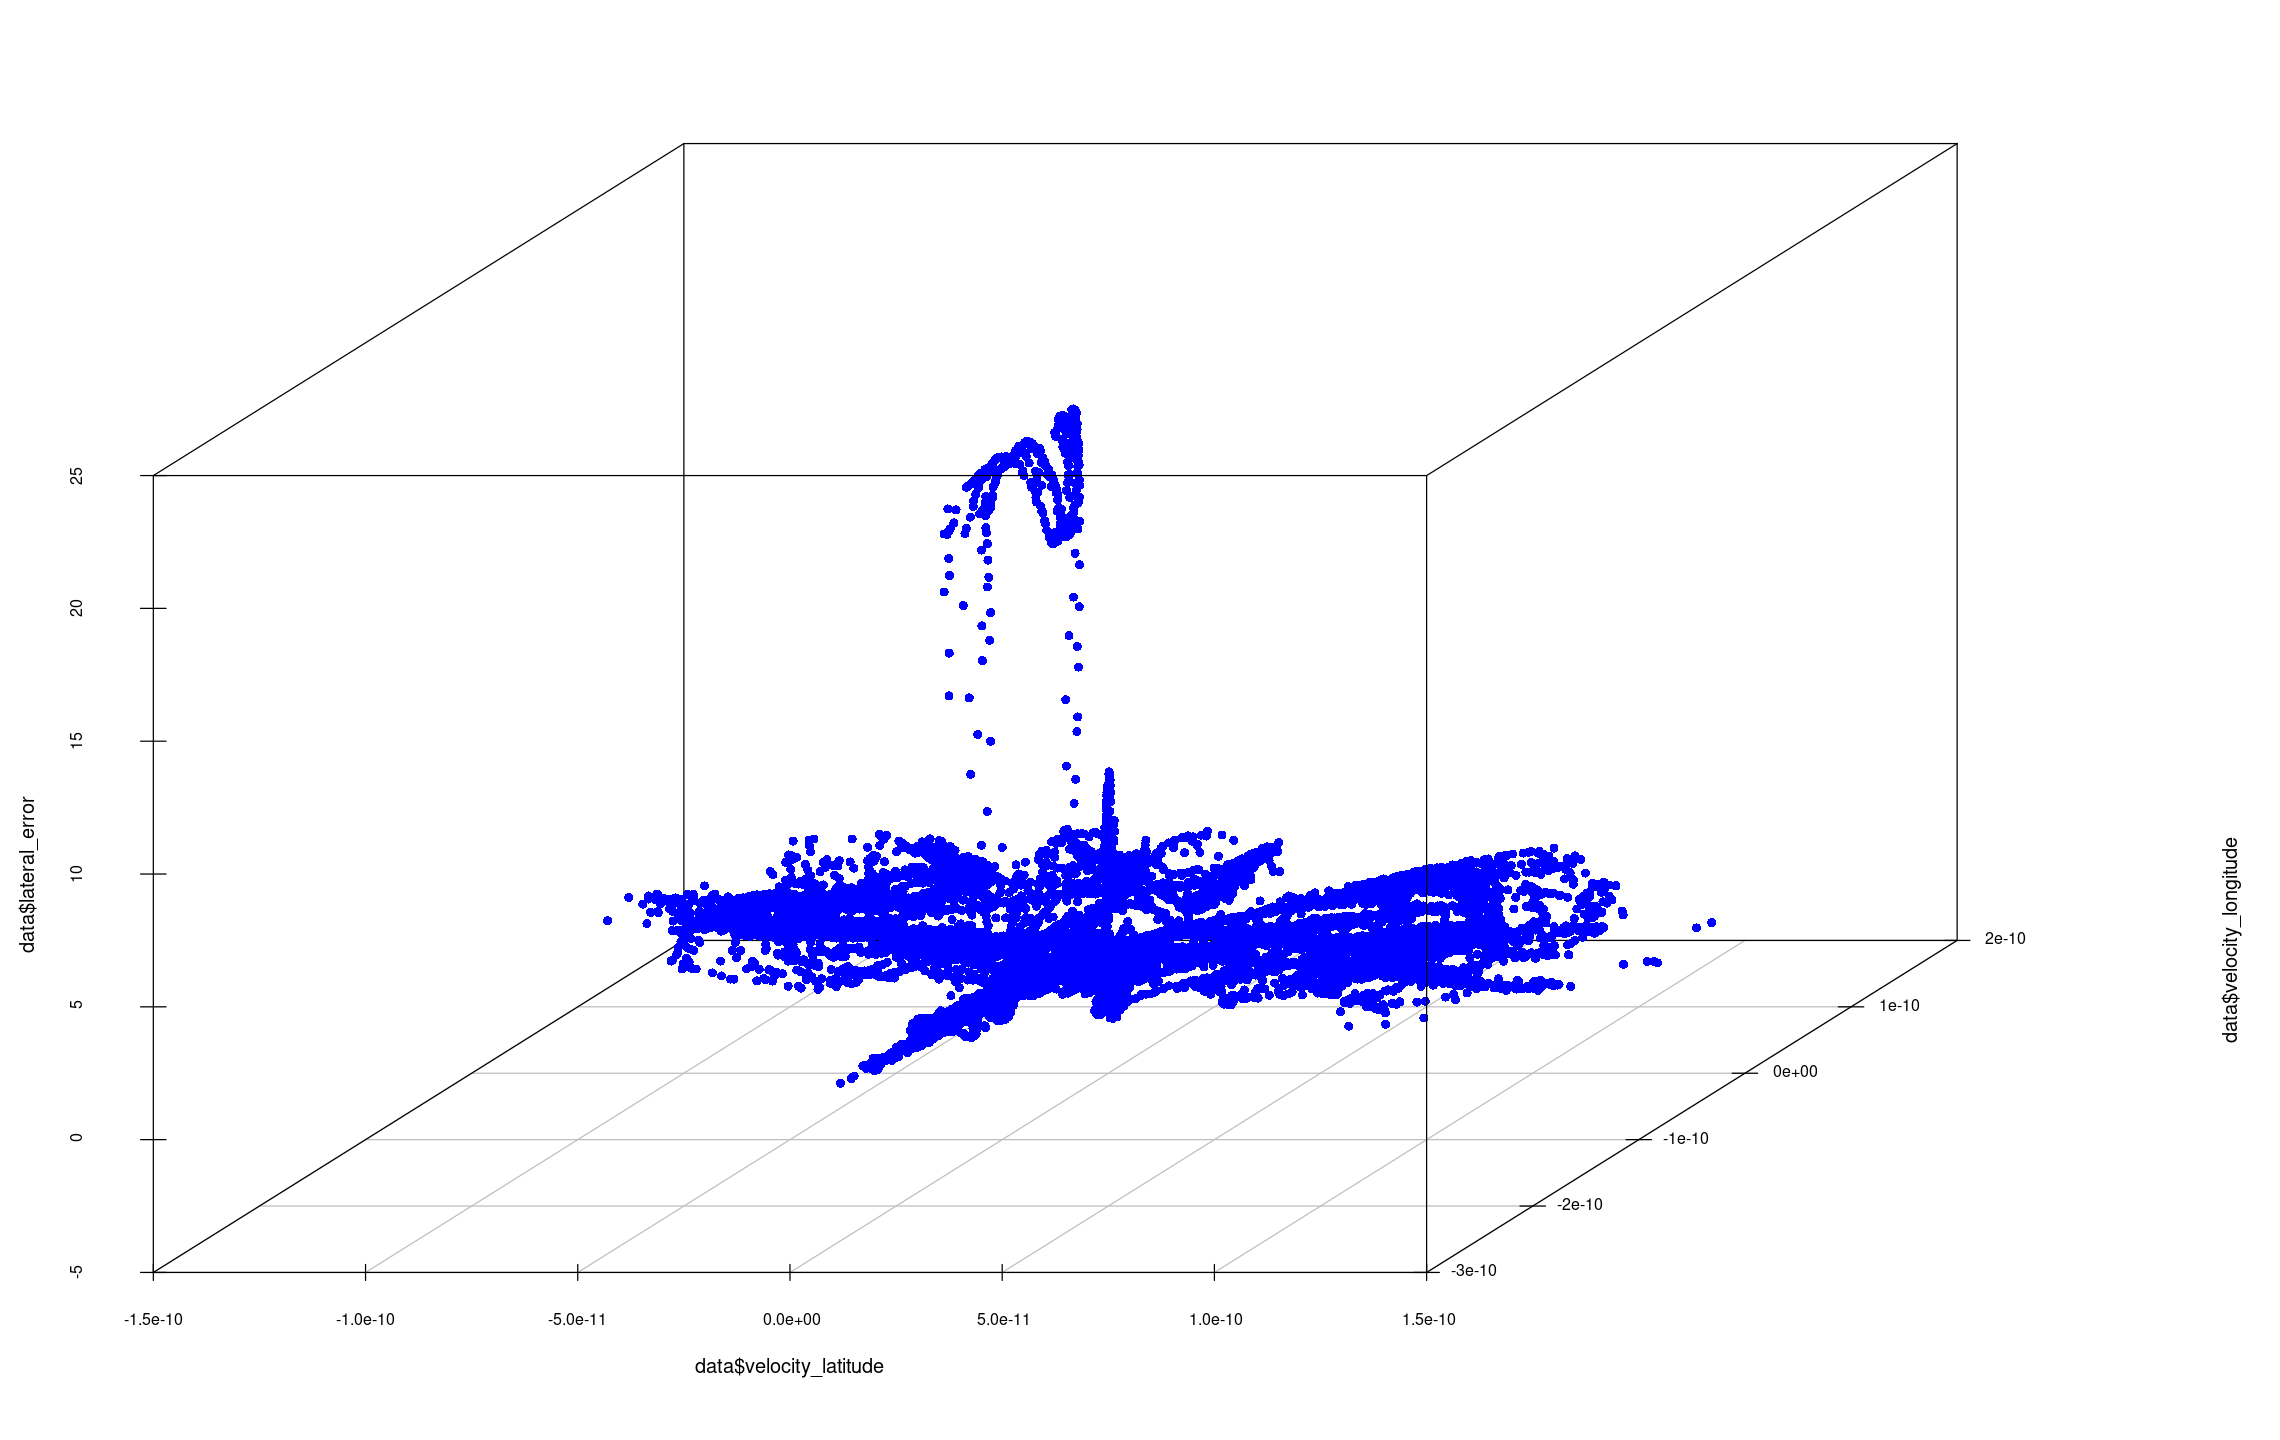

In [17]:
scatterplot3d(x = data$velocity_latitude, 
              y = data$velocity_longitude, 
              z = data$lateral_error, 
              angle = 45, 
              type = "p",
              pch = 16, 
              color="blue")

## longitudinal_error

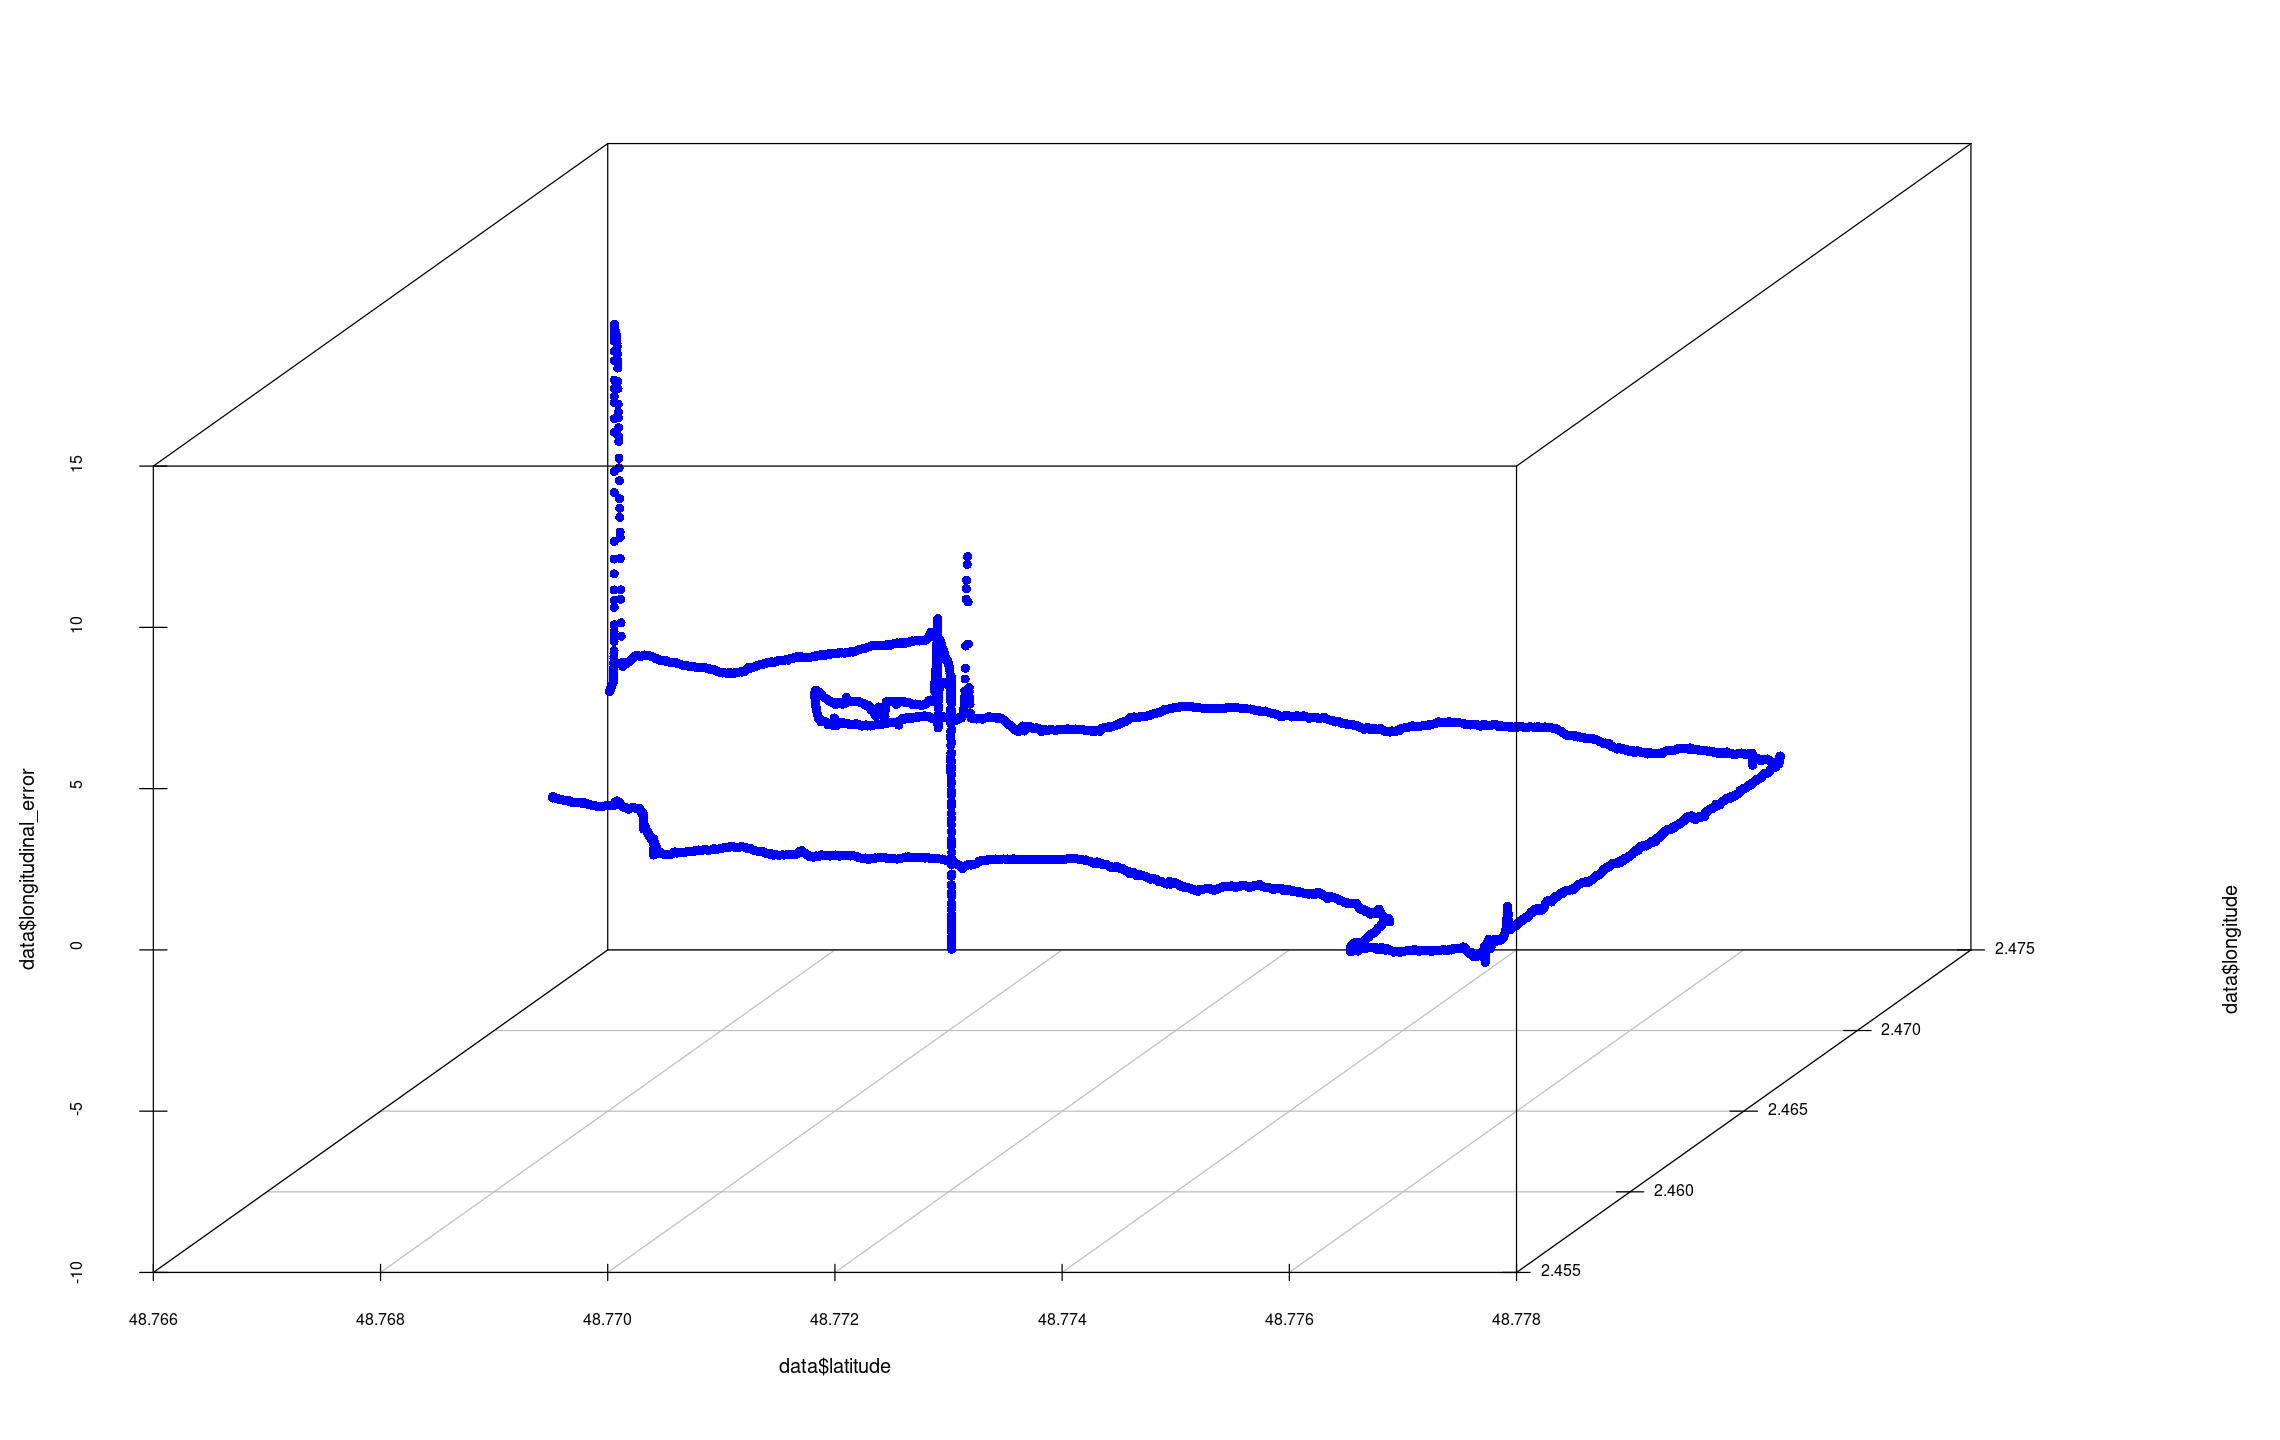

In [18]:
scatterplot3d(x = data$latitude, 
              y = data$longitude, 
              z = data$longitudinal_error, 
              angle = 45, 
              type = "p",
              pch = 16, 
              color="blue")

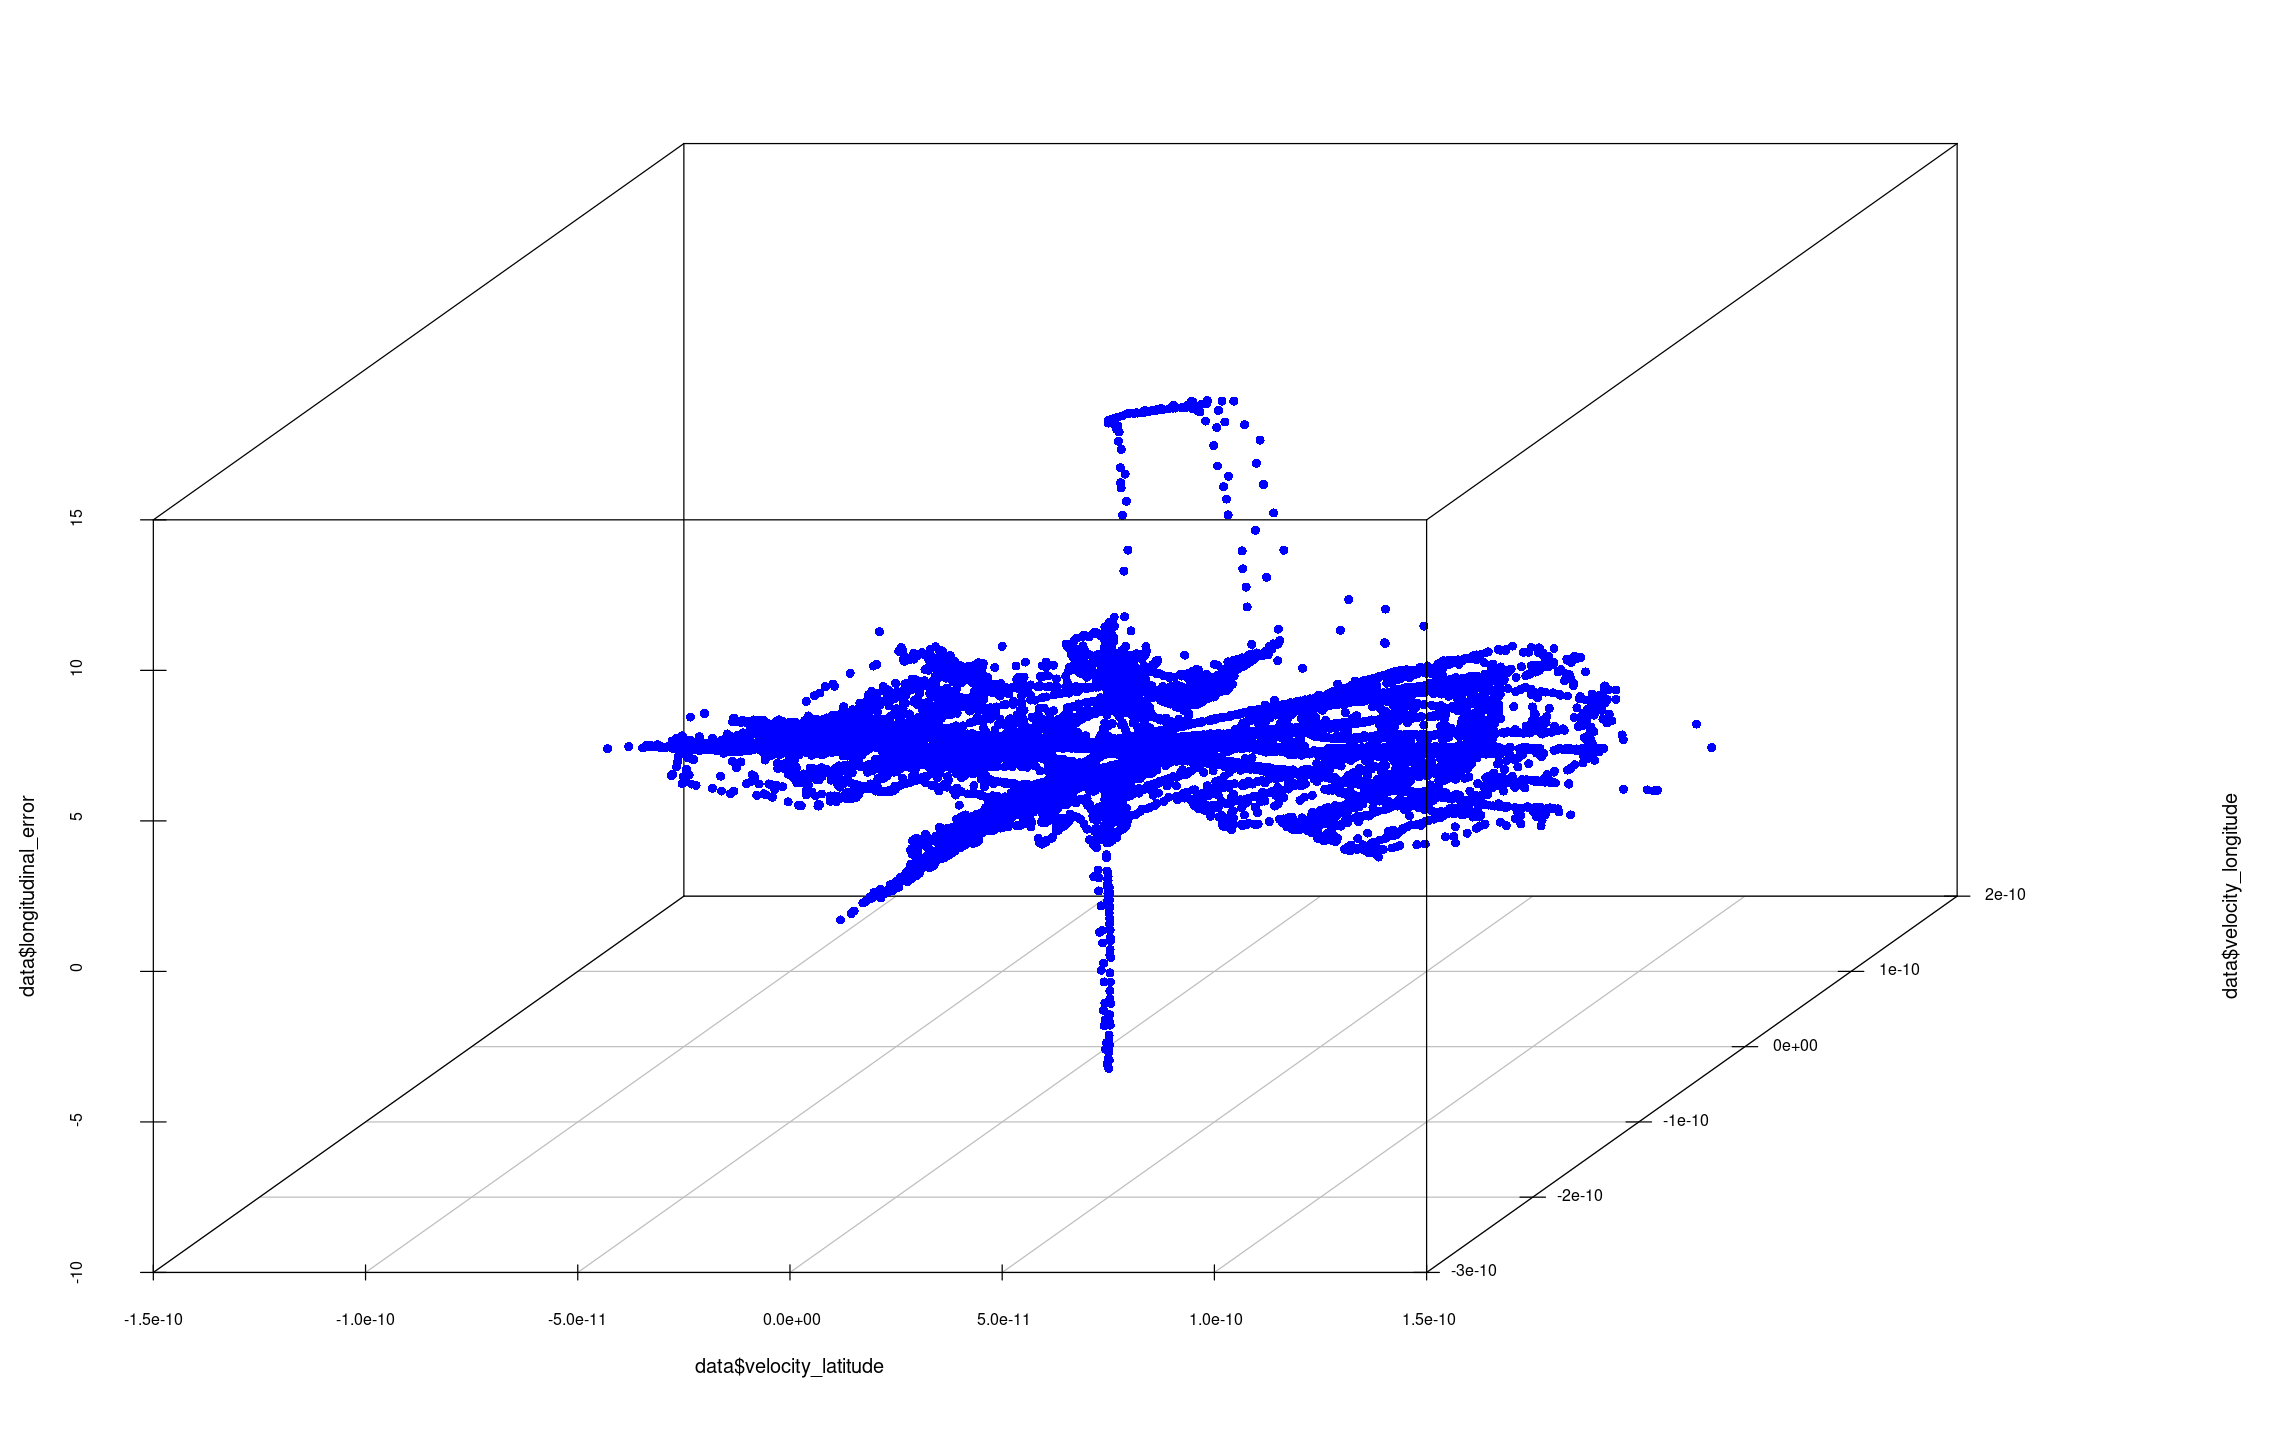

In [19]:
scatterplot3d(x = data$velocity_latitude, 
              y = data$velocity_longitude, 
              z = data$longitudinal_error, 
              angle = 45, 
              type = "p",
              pch = 16, 
              color="blue")